In [1]:
import pandas as pd
import wandb
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
api = wandb.Api()

In [3]:
def get_data(link):
    file_name = link.split("/")[-1]
    if os.path.exists("./csv/" + file_name + ".csv"):
        return pd.read_csv("./csv/" + file_name + ".csv")
    else:
        df = pd.DataFrame(api.run(link).scan_history())
        df.to_csv("./csv/" + file_name + ".csv", index=False)
        return df


def remove_nan(df, column_name):
    return list(df[column_name].dropna())


def compute_difference(dictionary, experiment_1, experiment_2):
    return {
        key: list(
            np.array(dictionary[experiment_1][key])
            - np.array(dictionary[experiment_2][key])
        )
        for key in dictionary[experiment_1]
    }

In [4]:
def plot_accuracy(data, baselines, size, dataset_name):
    epsilon_list = list(data[list(data.keys())[0]].keys())
    for epsilon in epsilon_list:
        plt.figure(figsize=(15, 10))
        plt.plot(
            baselines[size],
            label=f"Baseline",
            linewidth=3,
        )
        for experiment_type, _ in data.items():
            plt.plot(
                data[experiment_type][epsilon],
                label=f"{experiment_type} - {epsilon}",
                linewidth=3,
            )
        plt.rcParams.update({"font.size": 30})

        plt.xlabel("FL Rounds", fontsize=30)
        plt.ylabel("Accuracy", fontsize=30)
        plt.legend()
        plt.grid(True)

        plt.title(
            f"Accuracy - " + r"$\mathrm{\varepsilon}= $" + f"{epsilon}", fontsize=30
        )
        plt.tight_layout()
        plt.savefig(f"./plots/accuracy/{dataset_name}/accuracy_{size}_{epsilon}.png")

        plt.show()

In [5]:
def plot_differences(differences, dataset_name, size):
    plt.figure(figsize=(15, 10))

    for key in differences:
        plt.plot(
            differences[key], linewidth=3, label=r"($\mathrm{\varepsilon}=$" + key + ")"
        )  # + r', $\mathrm{\delta}=$')

    plt.title("Difference in Accuracy between FL and FL with Pre-Training", fontsize=30)
    plt.xlabel("FL Round", fontsize=30)
    plt.ylabel(r"$\mathrm{\Delta}$", fontsize=30)
    plt.rcParams.update({"font.size": 30})
    plt.grid(True)

    plt.legend()
    plt.tight_layout()

    plt.savefig(f"./plots/differences/{dataset_name}/{size}.png")

    plt.show()

# Mnist

In [6]:
baselines = {
    "0.2": get_data("/lucacorbucci/mnist_Sweeps/runs/aklzeh7m"),
    "0.3": get_data("/lucacorbucci/mnist_Sweeps/runs/uedh6xeh"),
    "0.4": get_data("/lucacorbucci/mnist_Sweeps/runs/3mjg4c97"),
    "0.5": get_data("/lucacorbucci/mnist_Sweeps/runs/1n62b6wt"),
    "0.6": get_data("/lucacorbucci/mnist_Sweeps/runs/p79qfsyr"),
}
baselines_accuracy = {
    experiment_name: remove_nan(value, "Test Accuracy on the server")
    for experiment_name, value in baselines.items()
}

# 20% Public

In [7]:
wandb_data = {
    "p2p_server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/wvu85lt6"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ksryrprg"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ifsve3oq"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/jvawsyxz"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/0qqu328y"),
    },
    "server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/yv6q1ksj"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/pm1xr3np"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/oy4fnc5e"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/4ac30xgl"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/dbg1jmw8"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

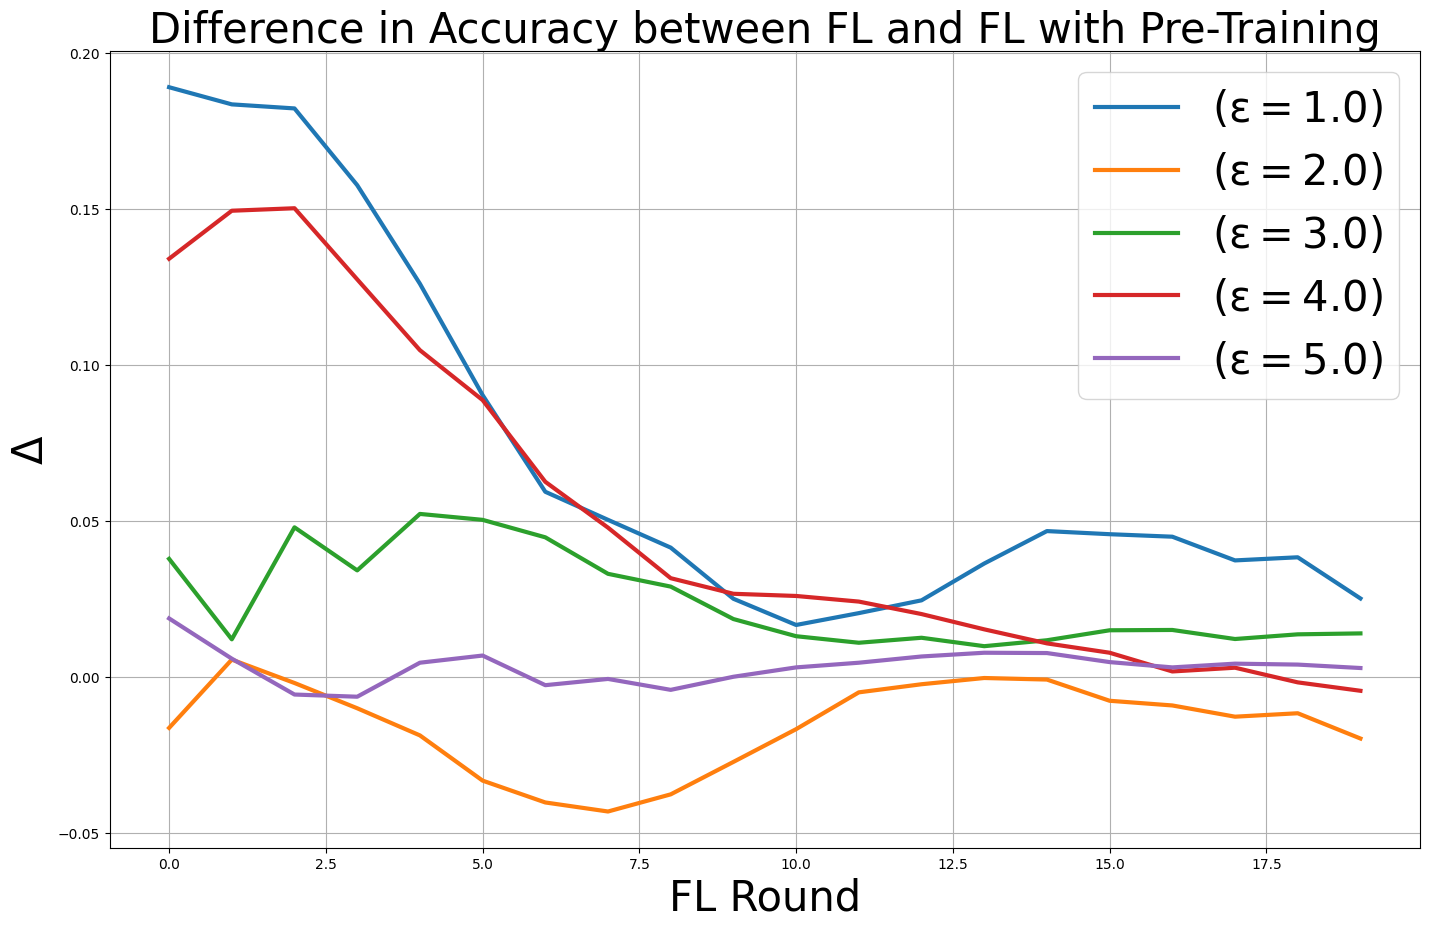

In [8]:
plot_differences(differences, dataset_name="mnist", size=0.2)

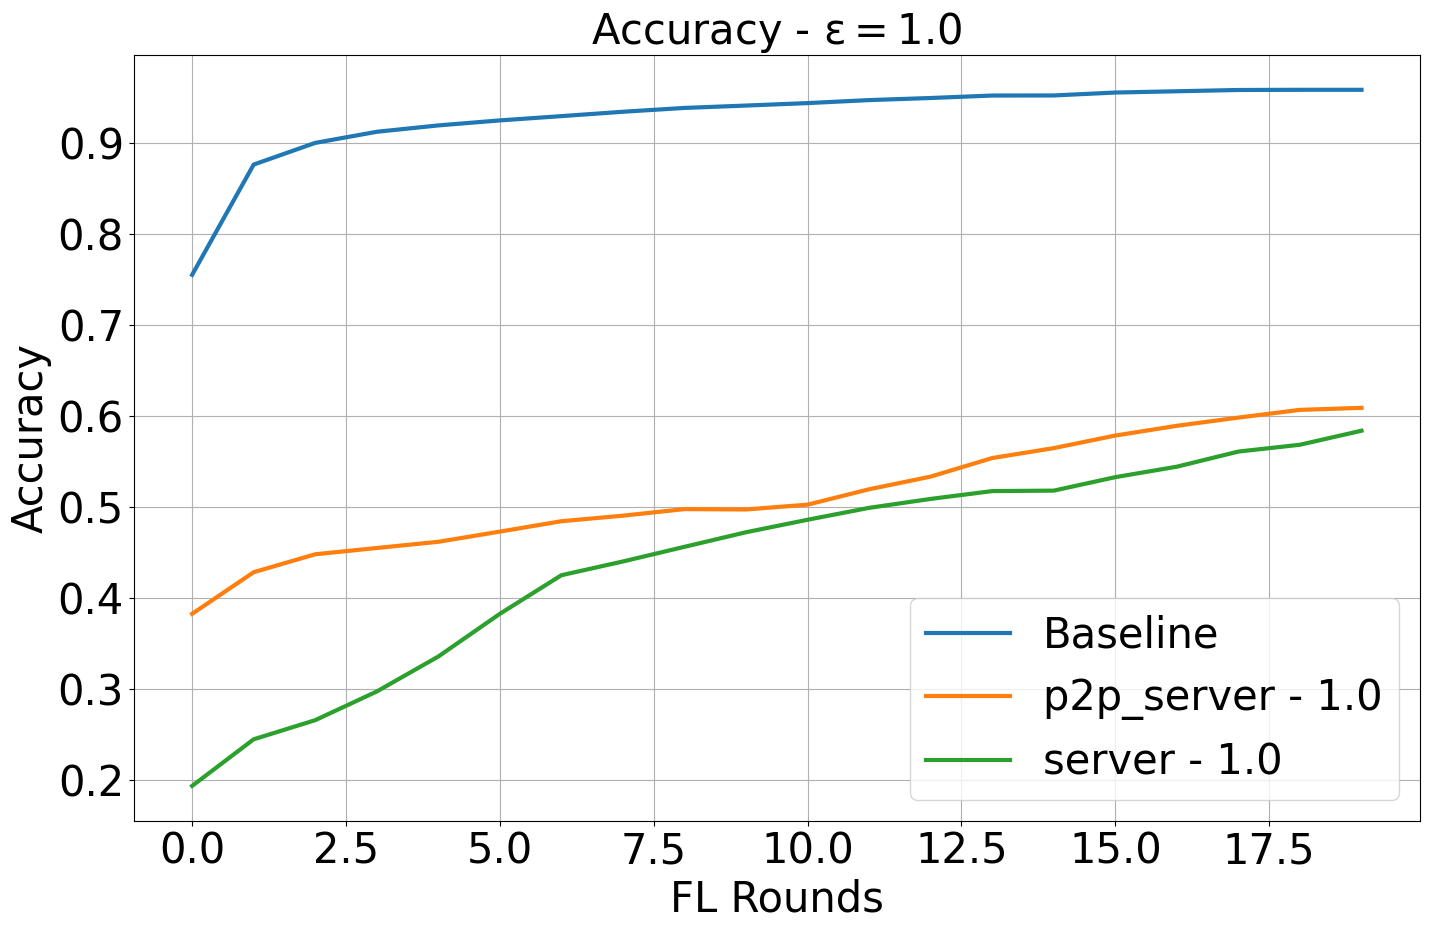

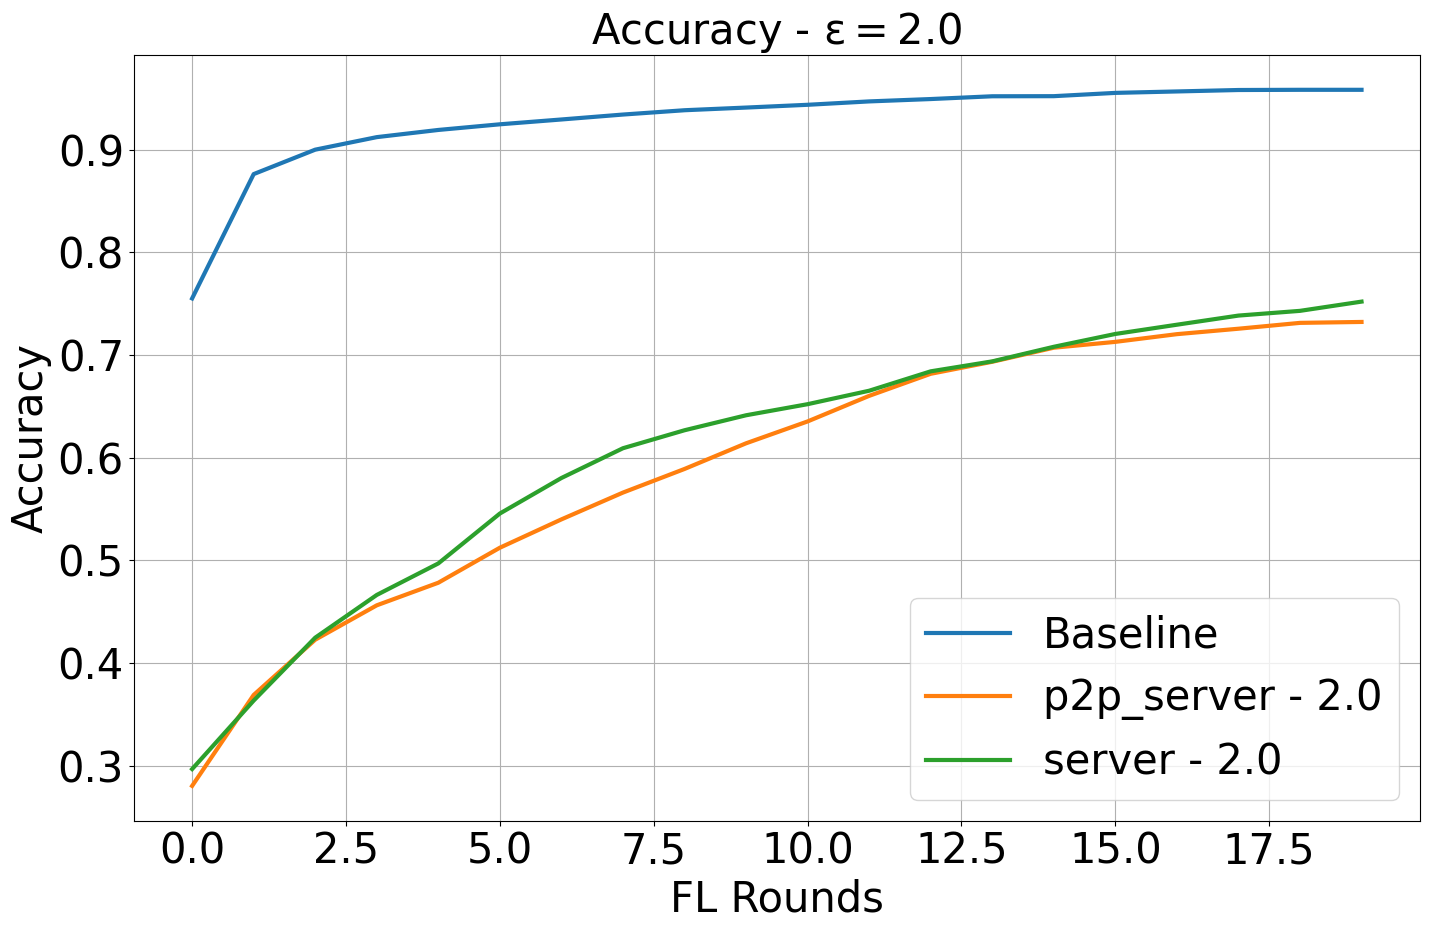

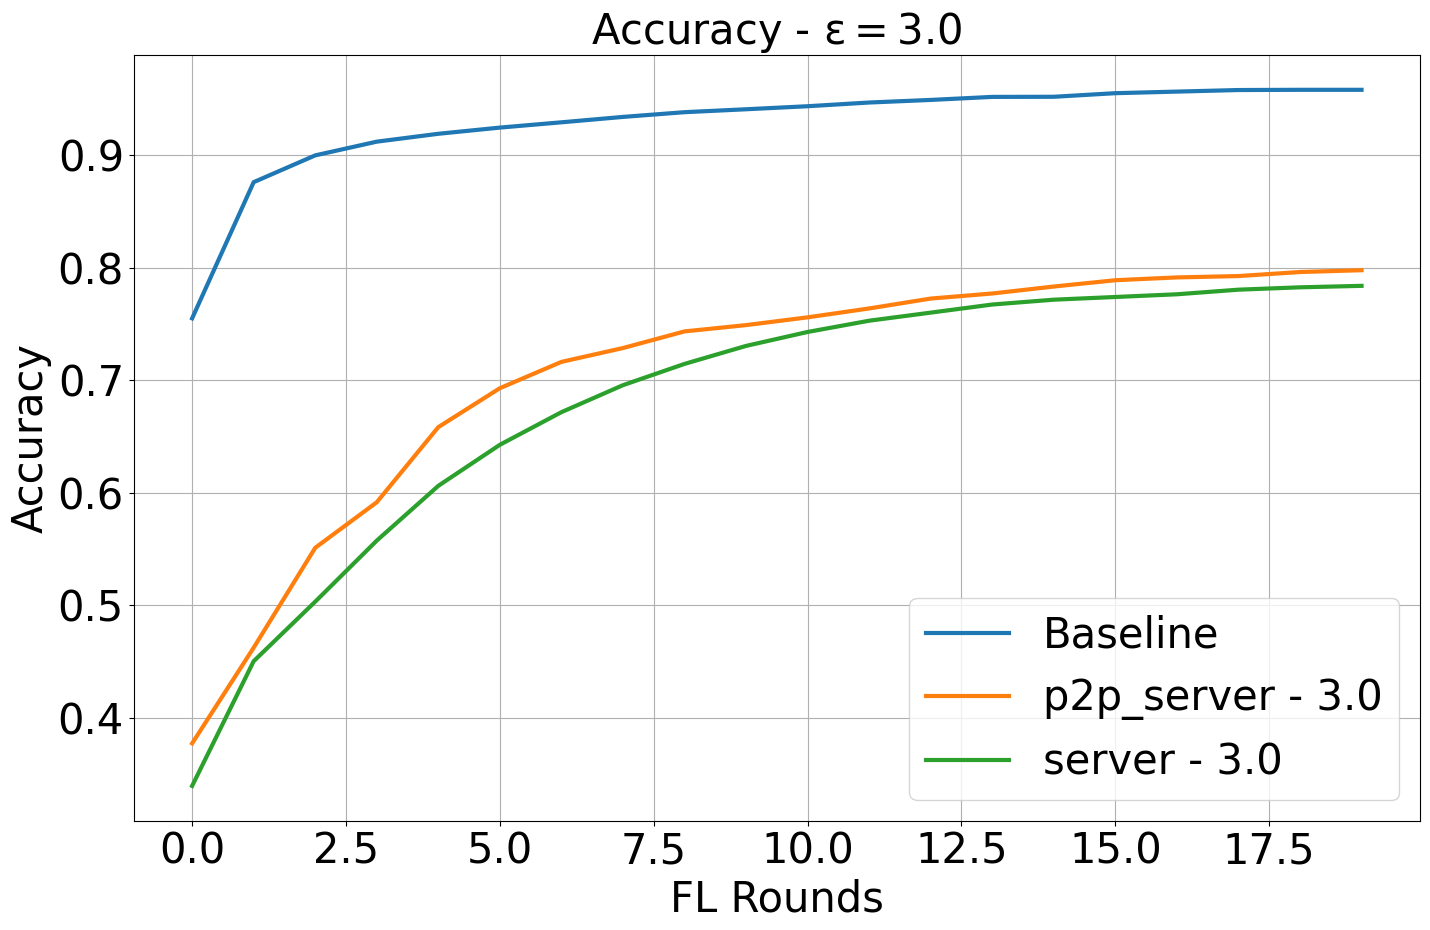

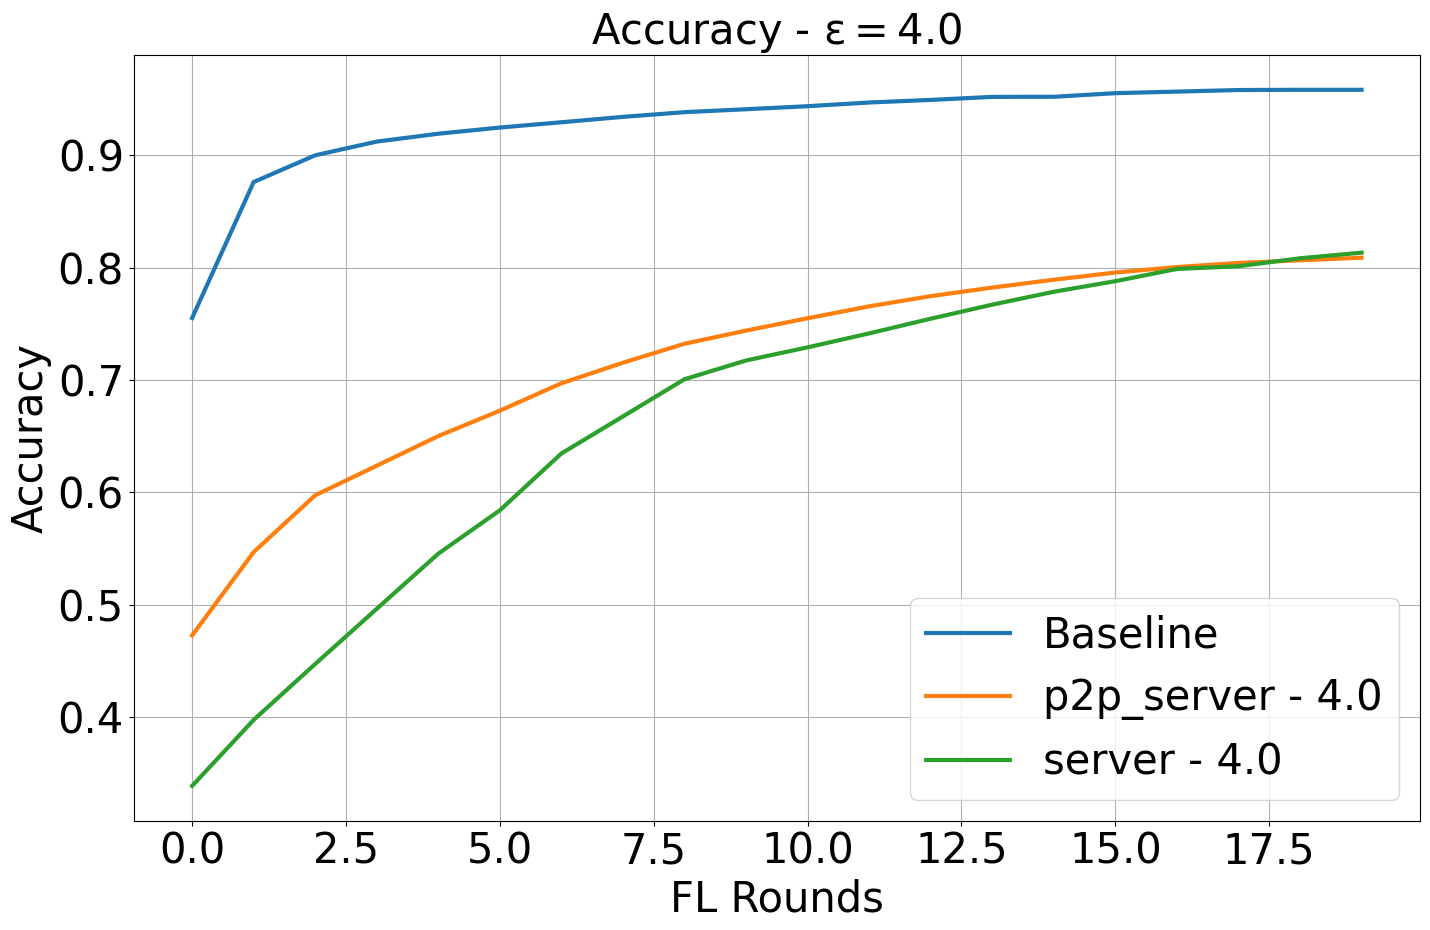

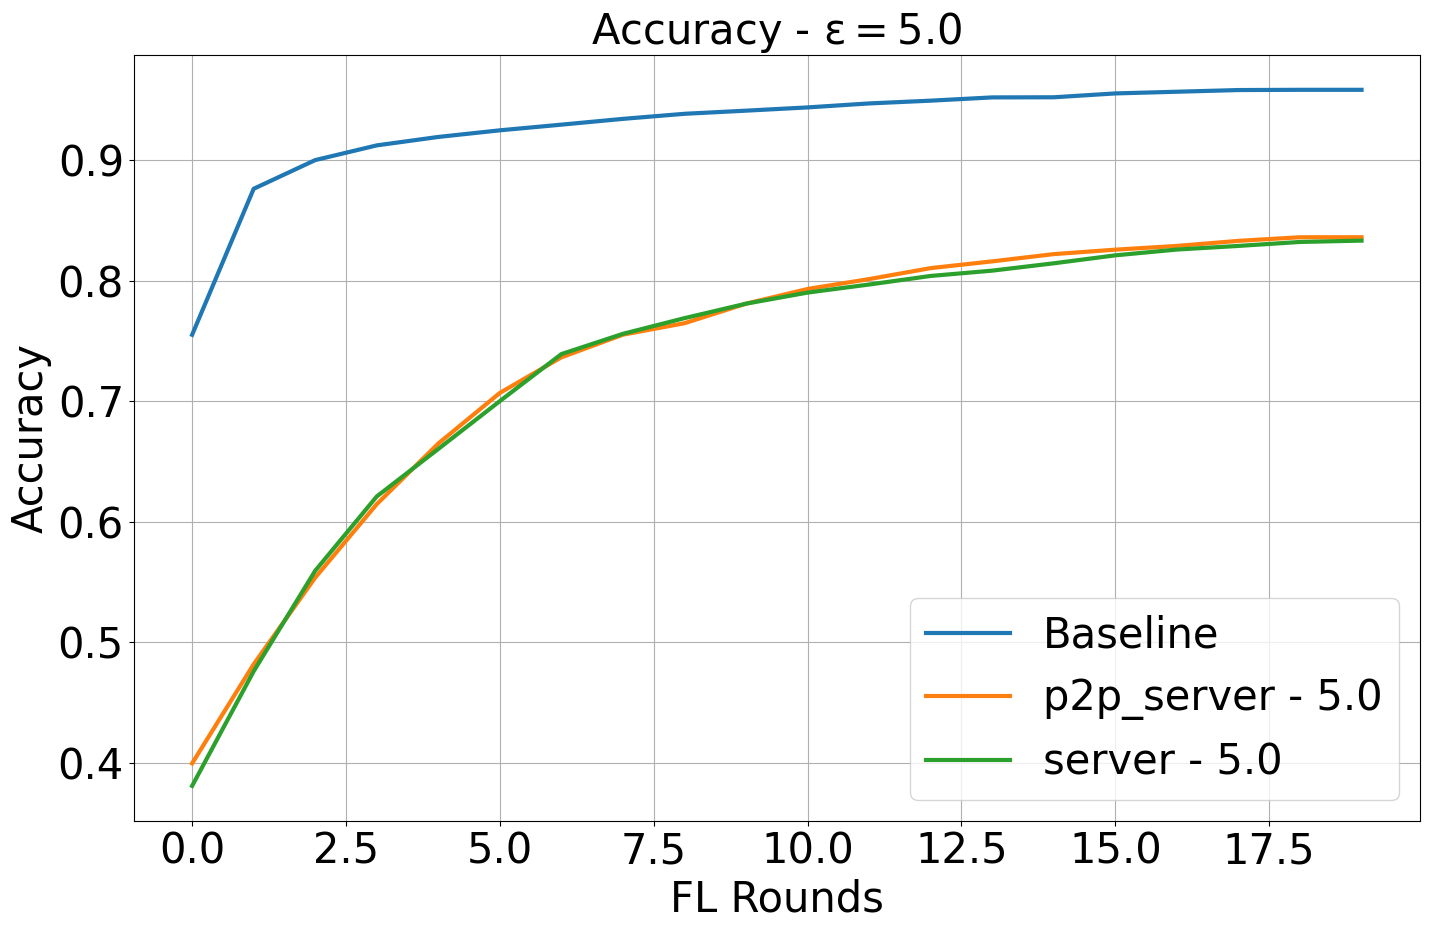

In [9]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.2", dataset_name="mnist")

# 30% Public

In [10]:
wandb_data = {
    "p2p_server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/1qjk56w8"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/kgvy83c2"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/utgesyg7"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ejela6bf"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/y7reiyc4"),
    },
    "server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/bwxii4tk"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/pg0x2k34"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ub9k6cnr"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/smu1uw36"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/hw636t3v"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}
differences = compute_difference(test_accuracy, "p2p_server", "server")

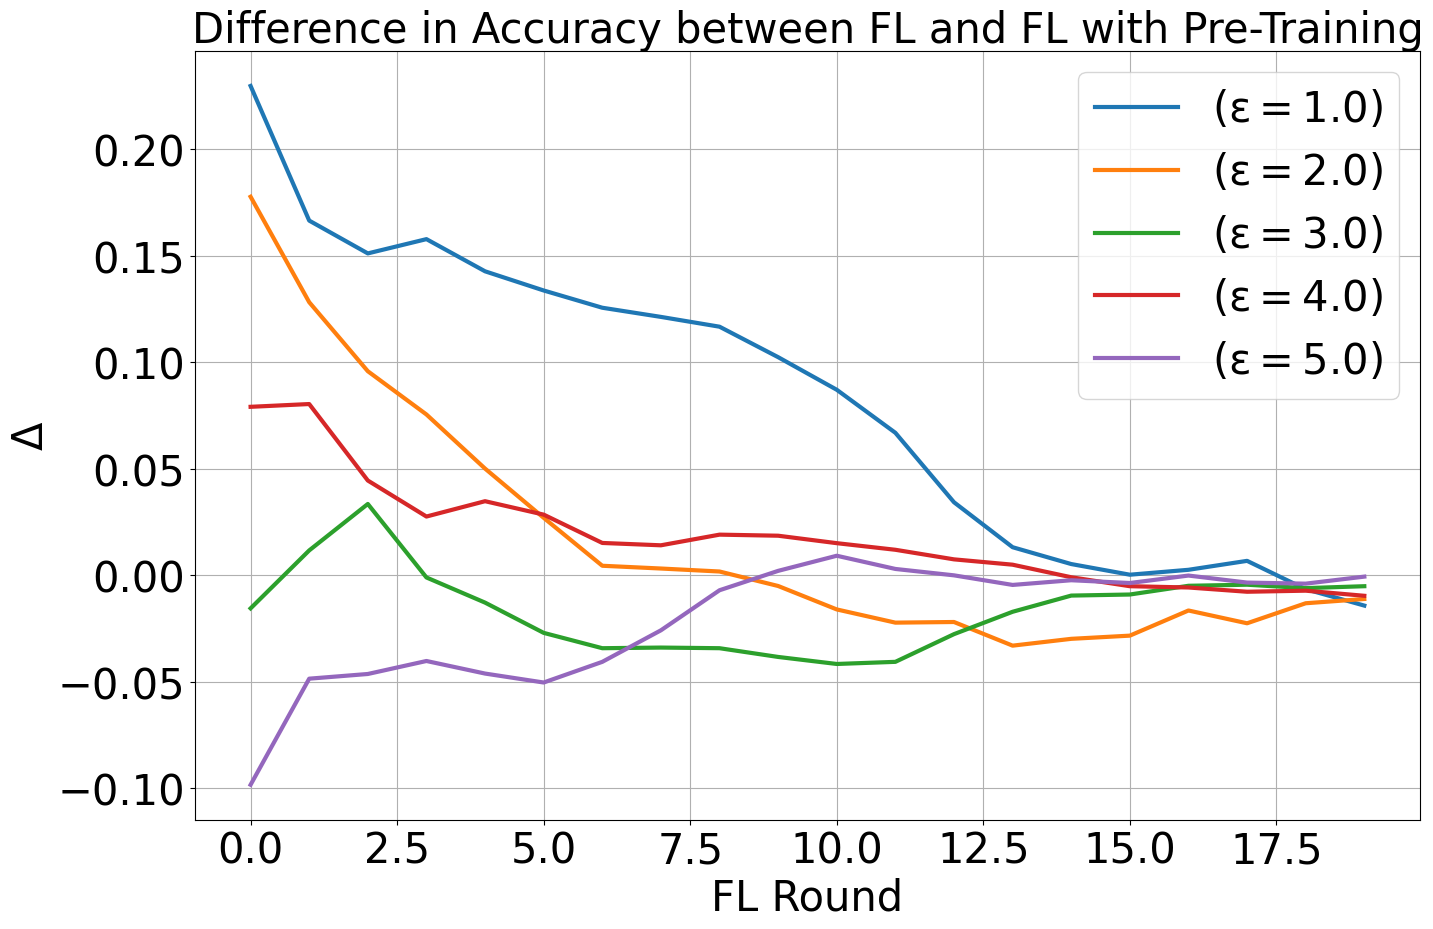

In [11]:
plot_differences(differences, dataset_name="mnist", size=0.3)

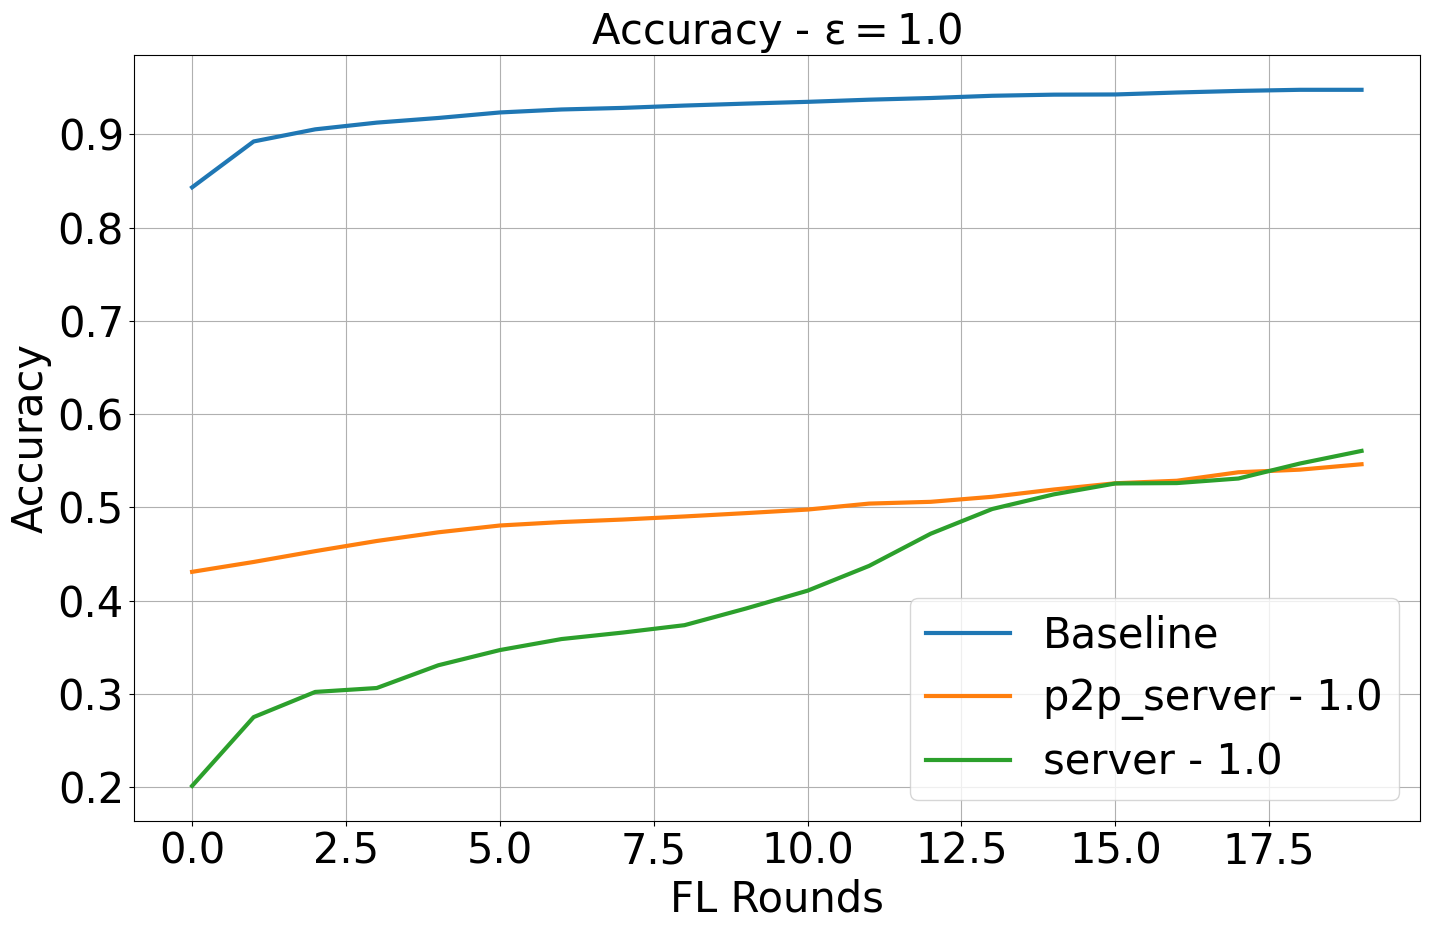

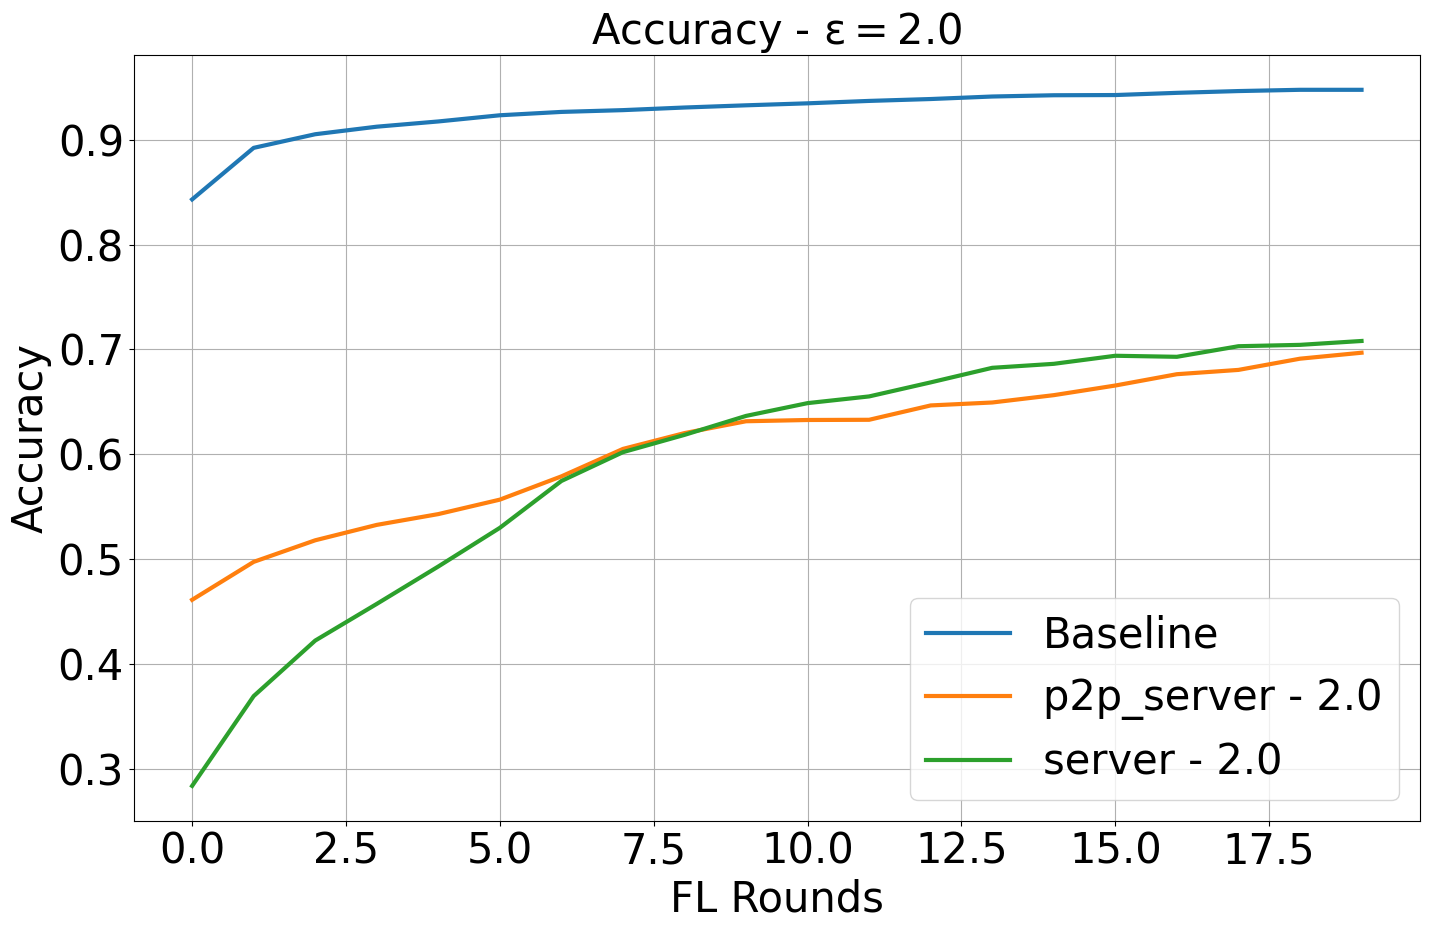

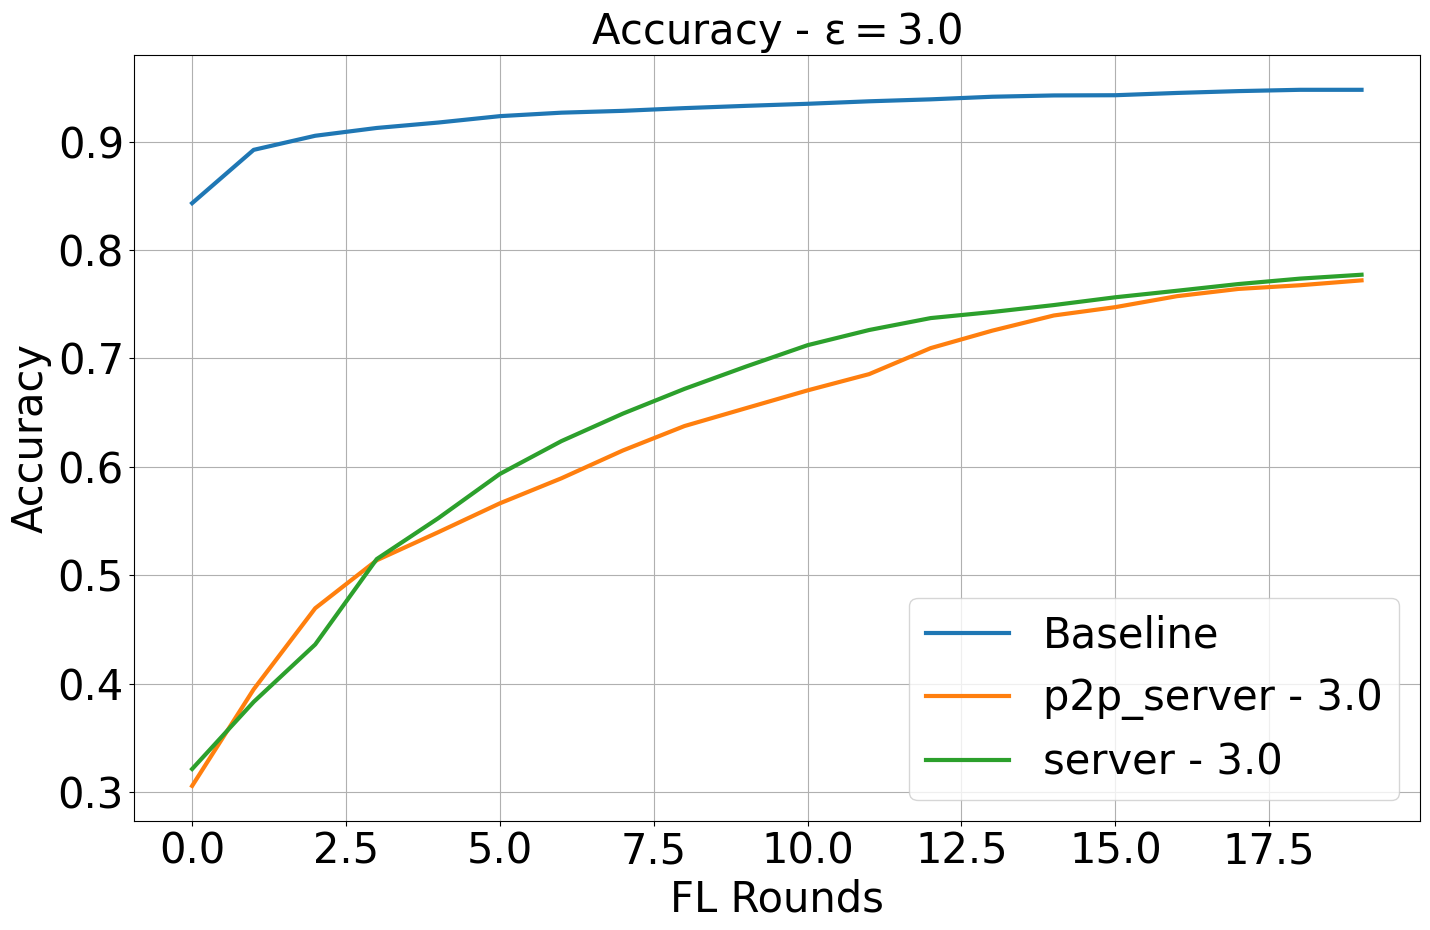

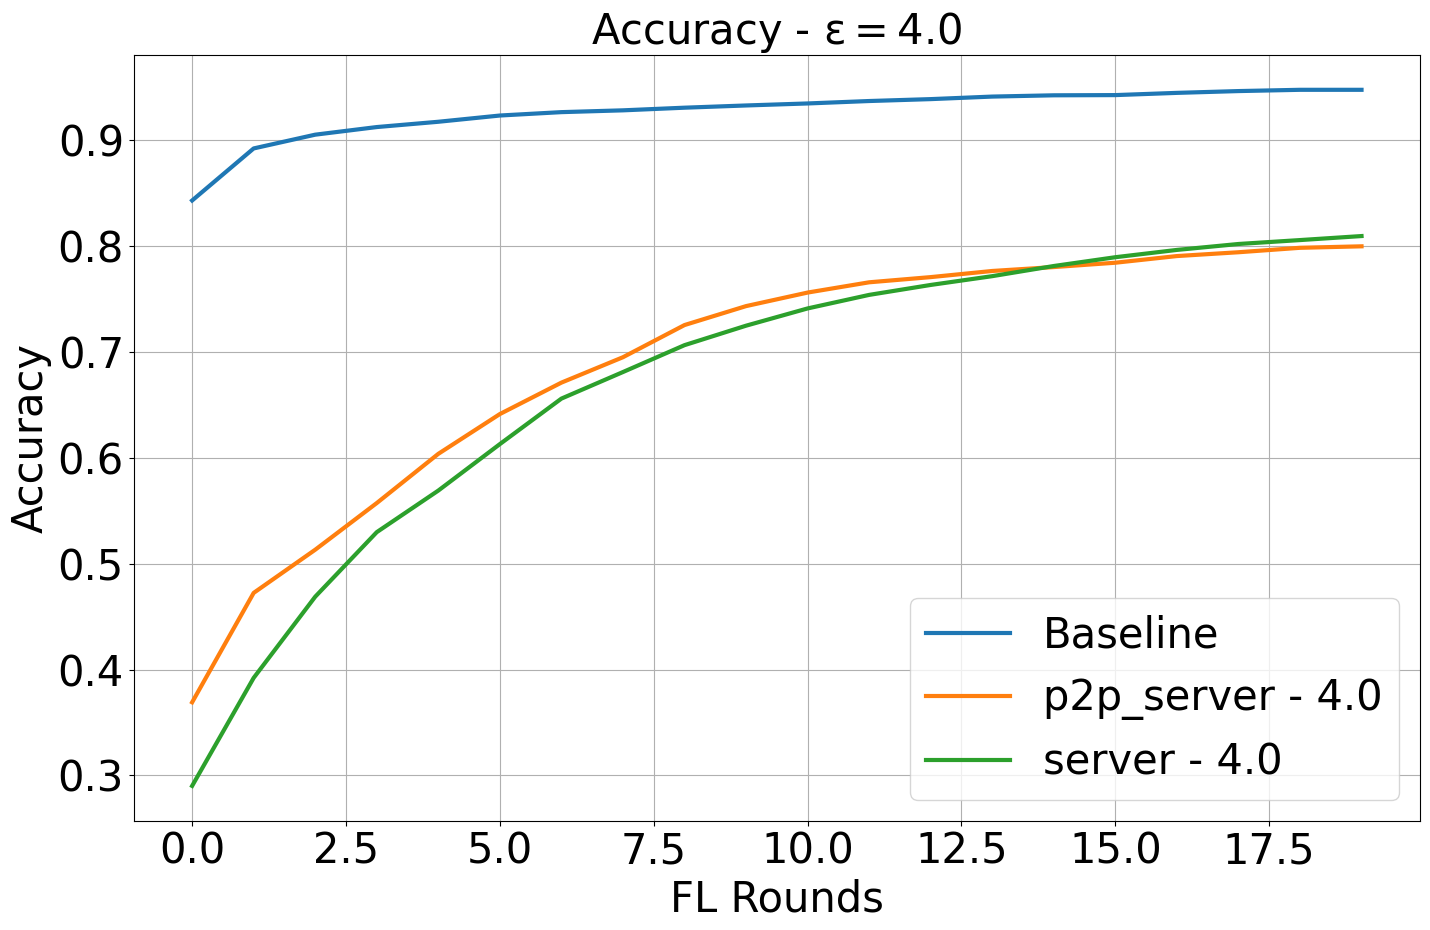

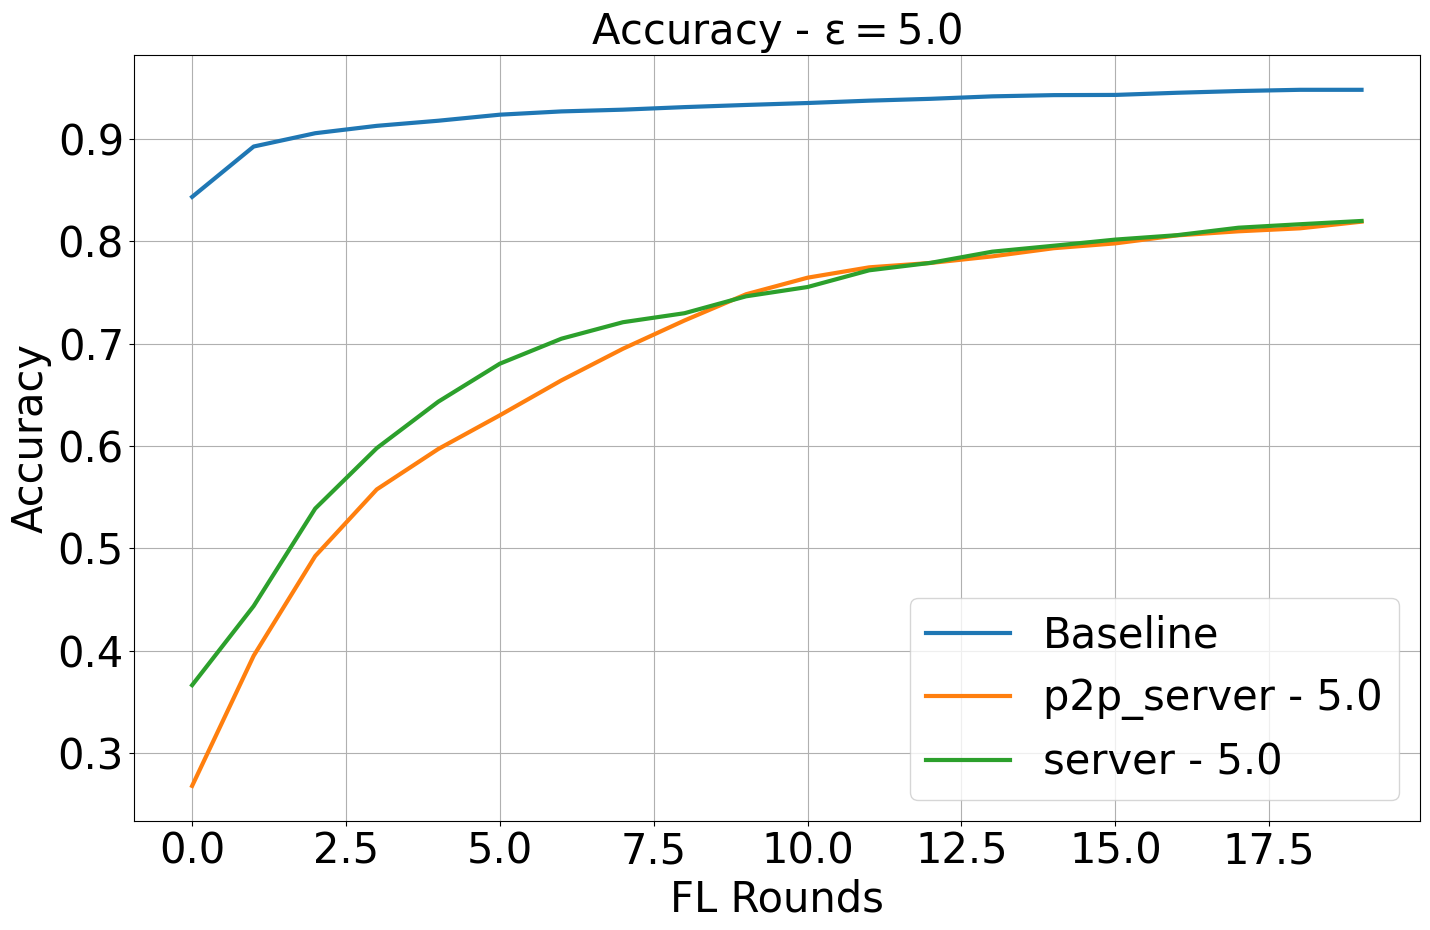

In [12]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.3", dataset_name="mnist")

# 40% Public

In [13]:
wandb_data = {
    "p2p_server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/siaqciw0"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/6po830wq"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/lwhe7rix"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/enmn0by4"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/aclp0edy"),
    },
    "server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/tmgcgasy"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/2njque0b"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/c6y9wy73"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/qdgwsbzp"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/wict35v7"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

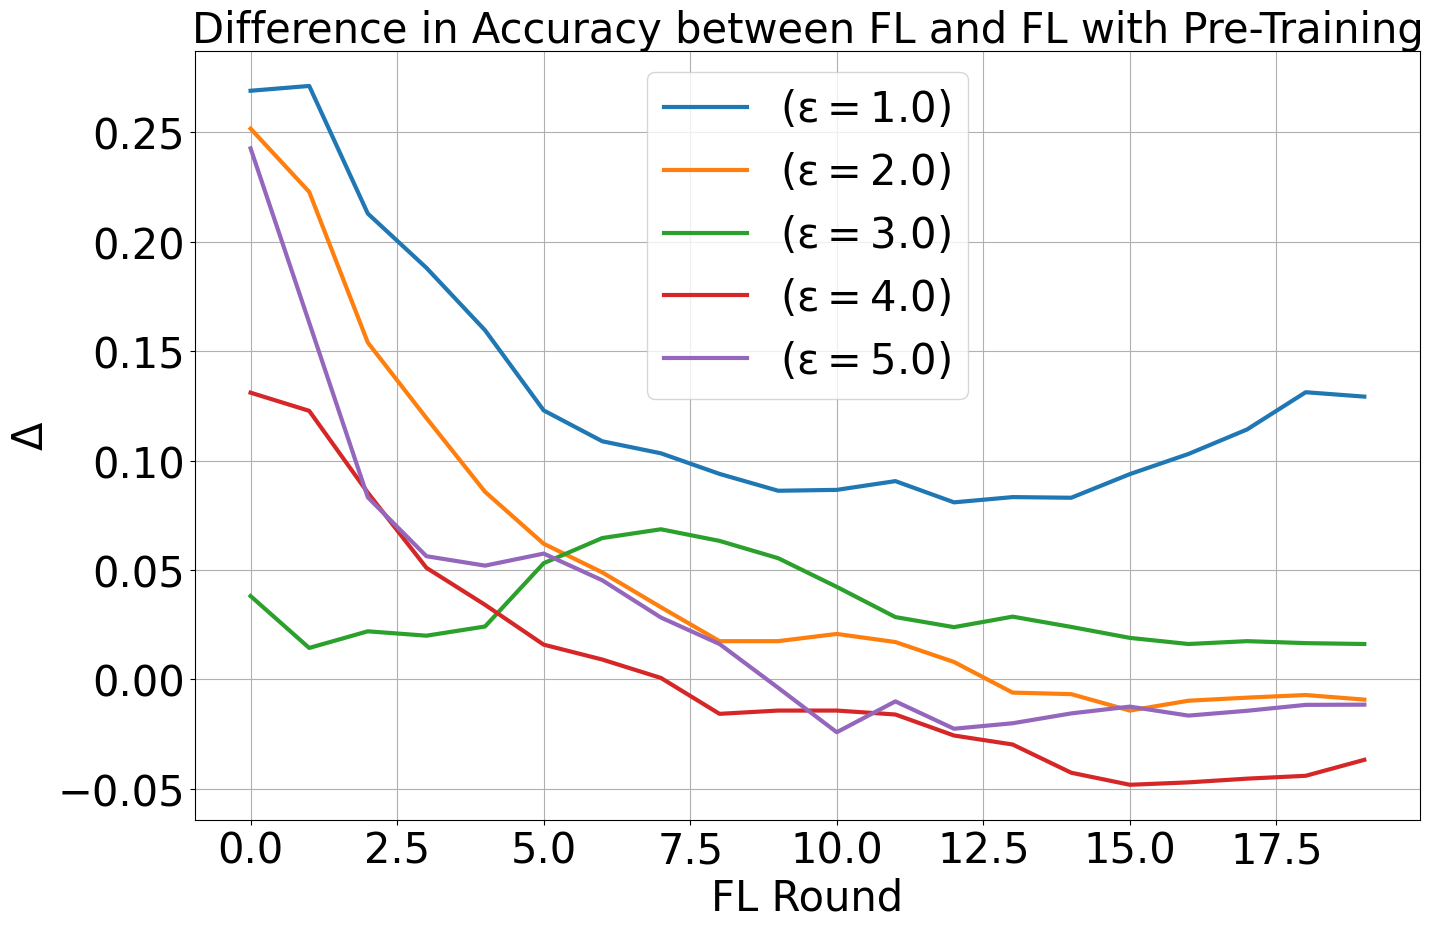

In [14]:
plot_differences(differences, dataset_name="mnist", size=0.4)

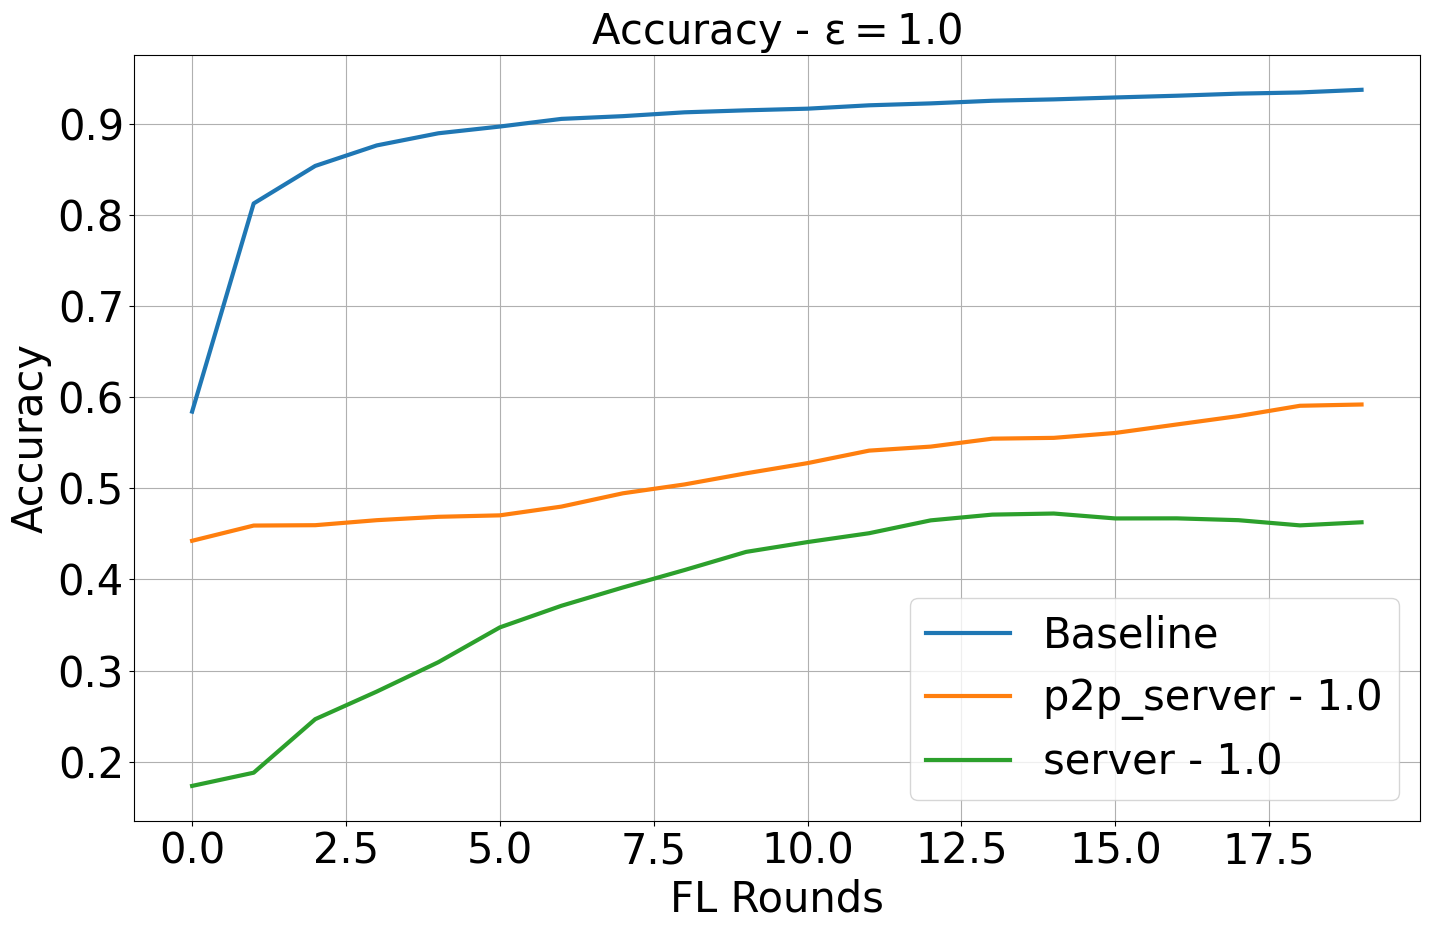

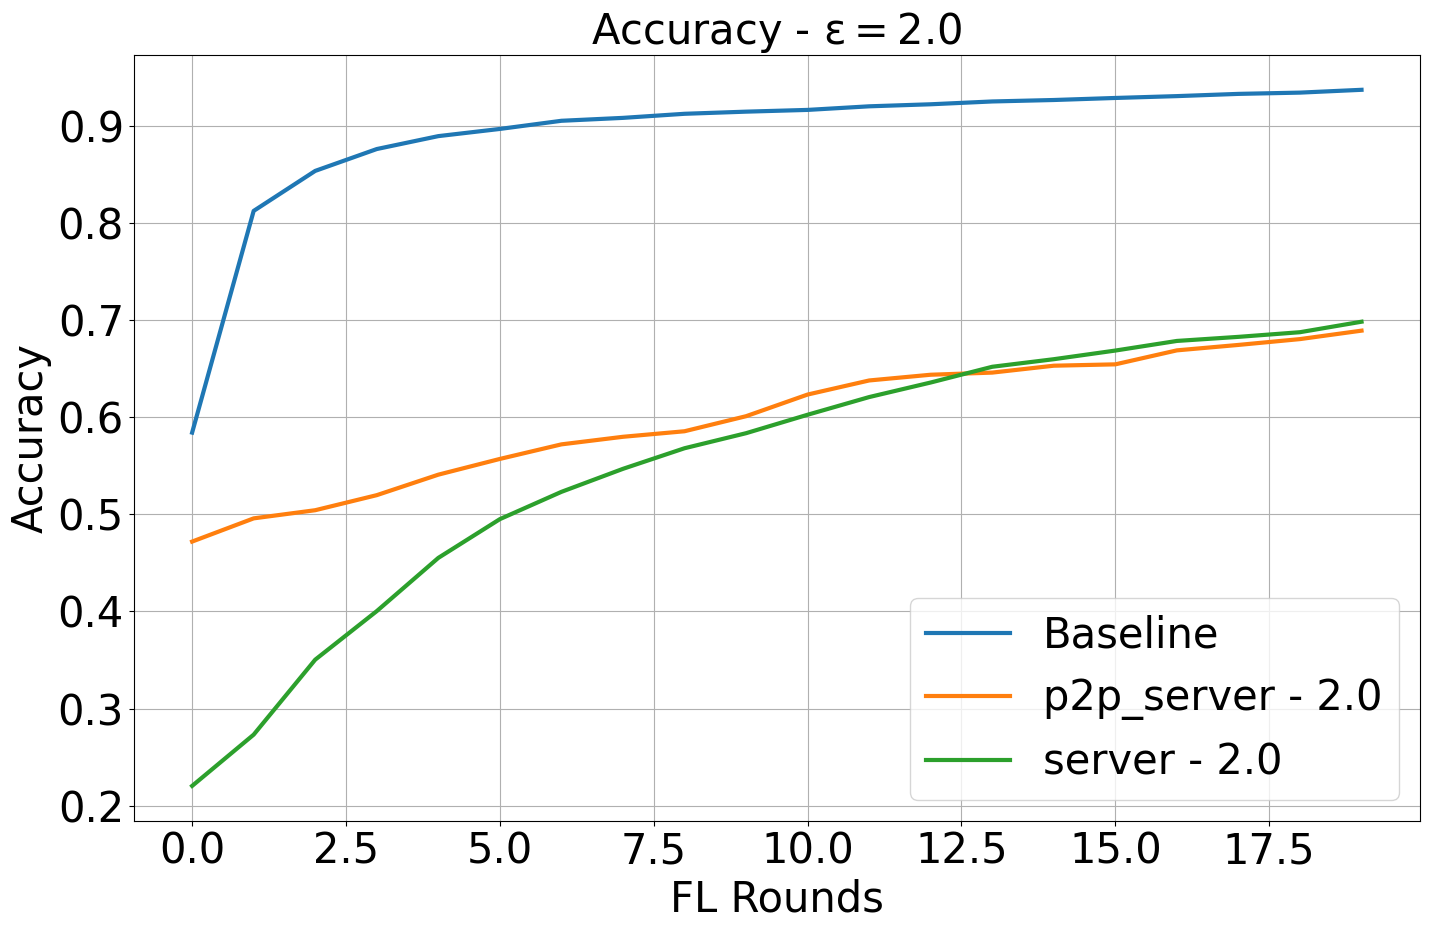

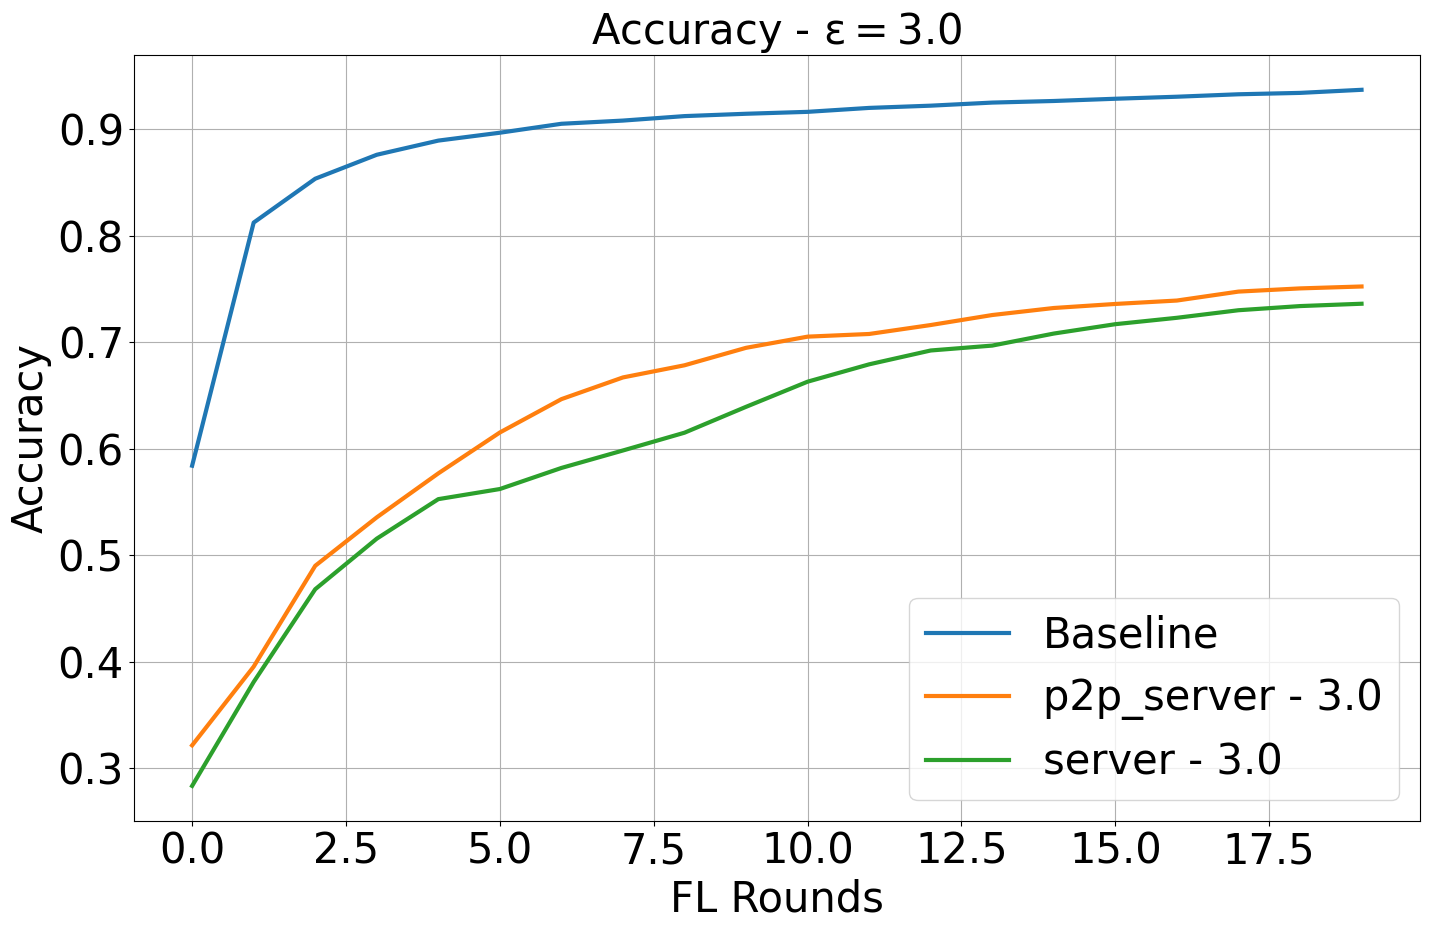

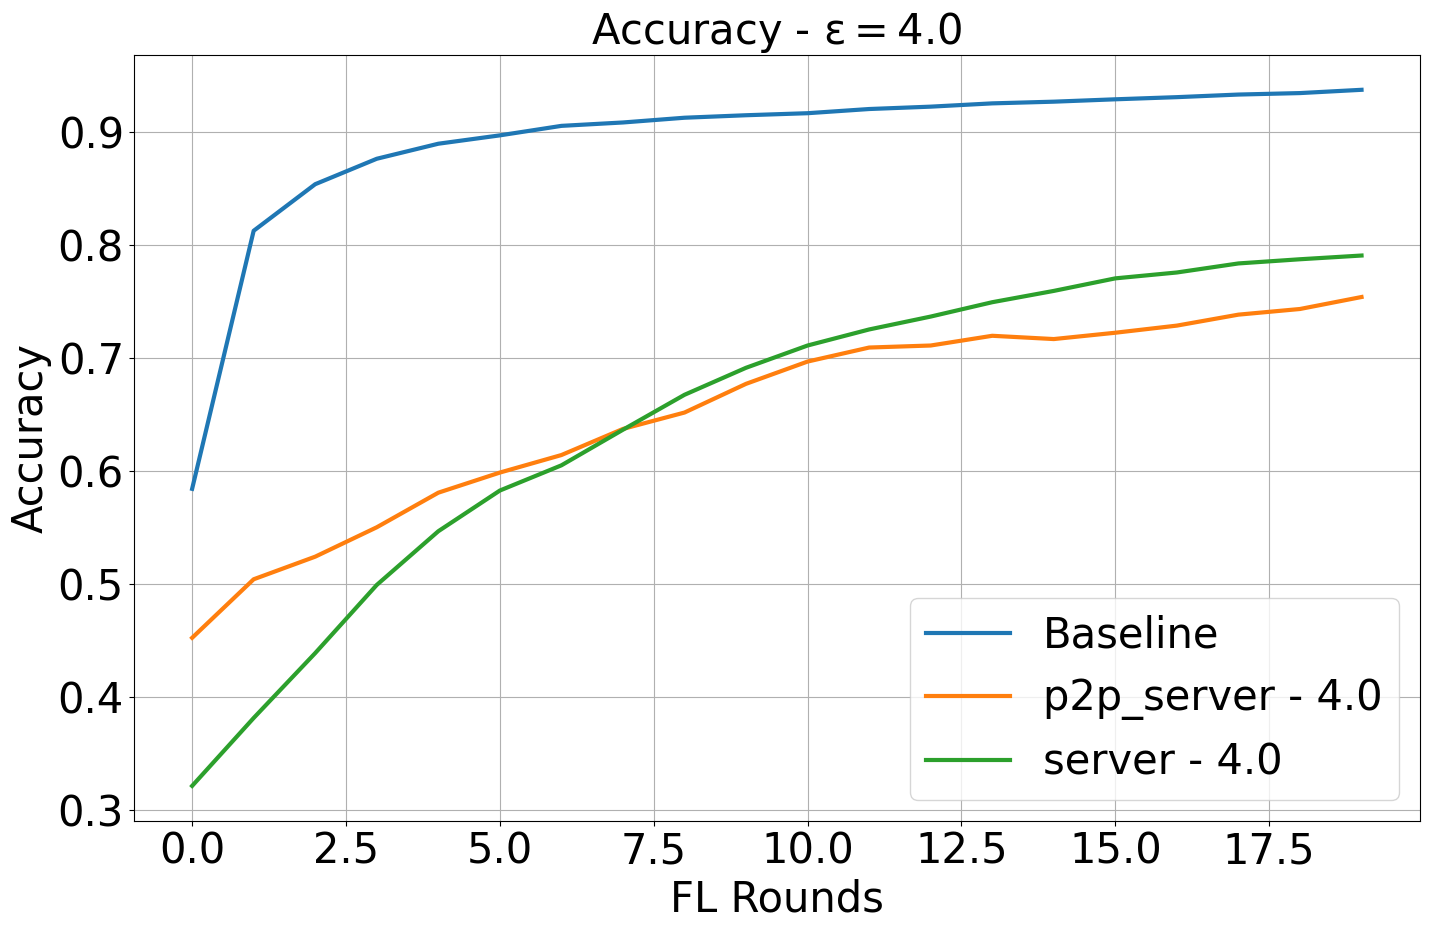

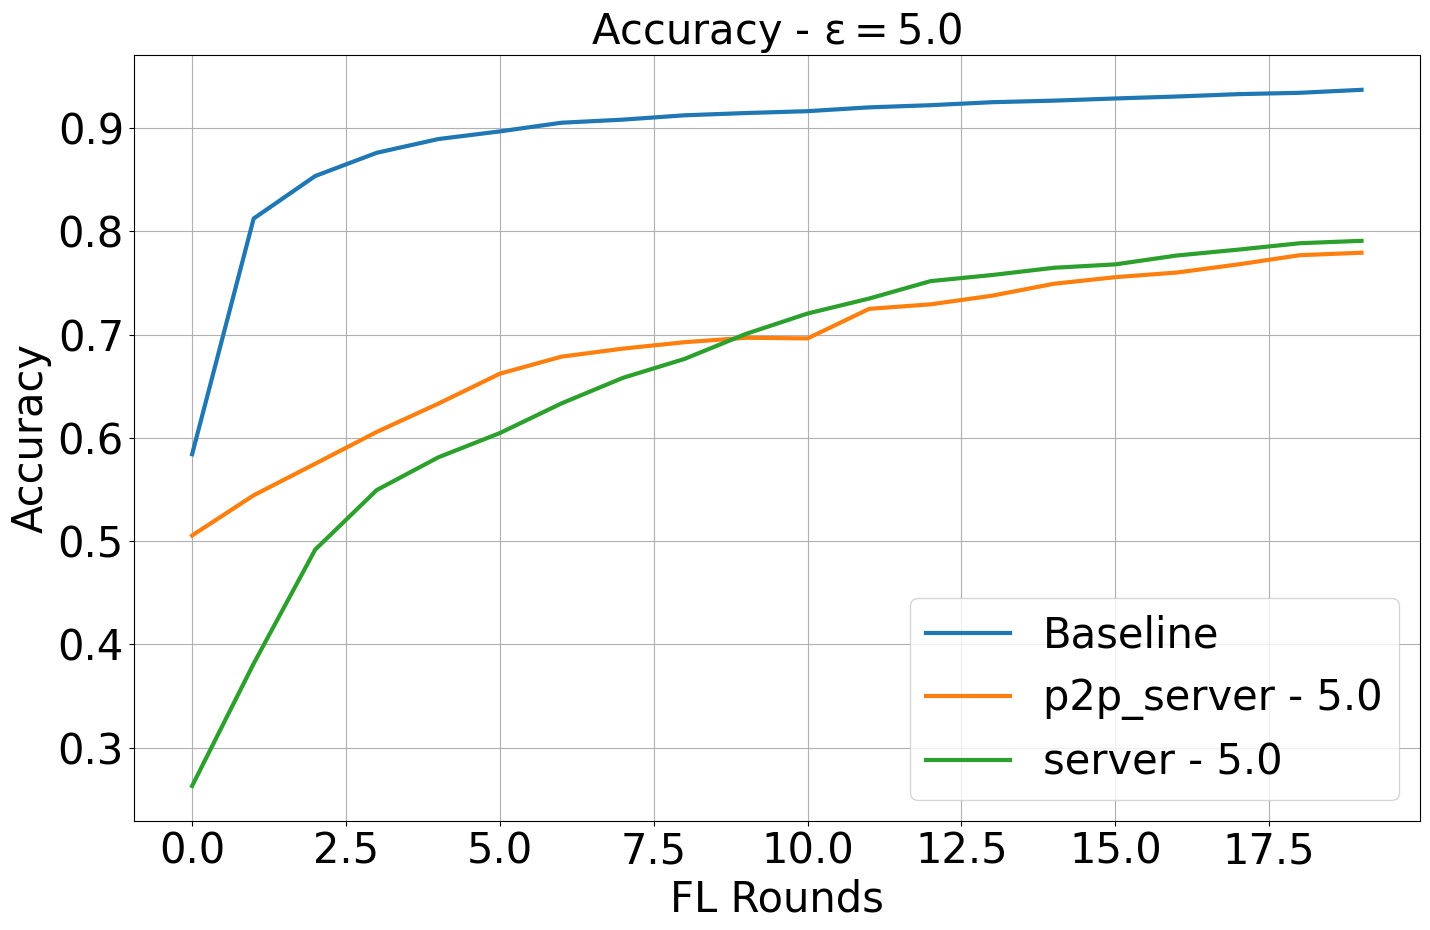

In [15]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.4", dataset_name="mnist")

# 50% Public

In [16]:
wandb_data = {
    "p2p_server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/bnvc3ivh"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/6yfvxet1"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/vt1cg6fq"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/on7ifhec"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/n3h1xpzx"),
    },
    "server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/lp2dbph7"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/6anj4lbz"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/ugimfc5n"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/67v73i1u"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/246asfjy"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

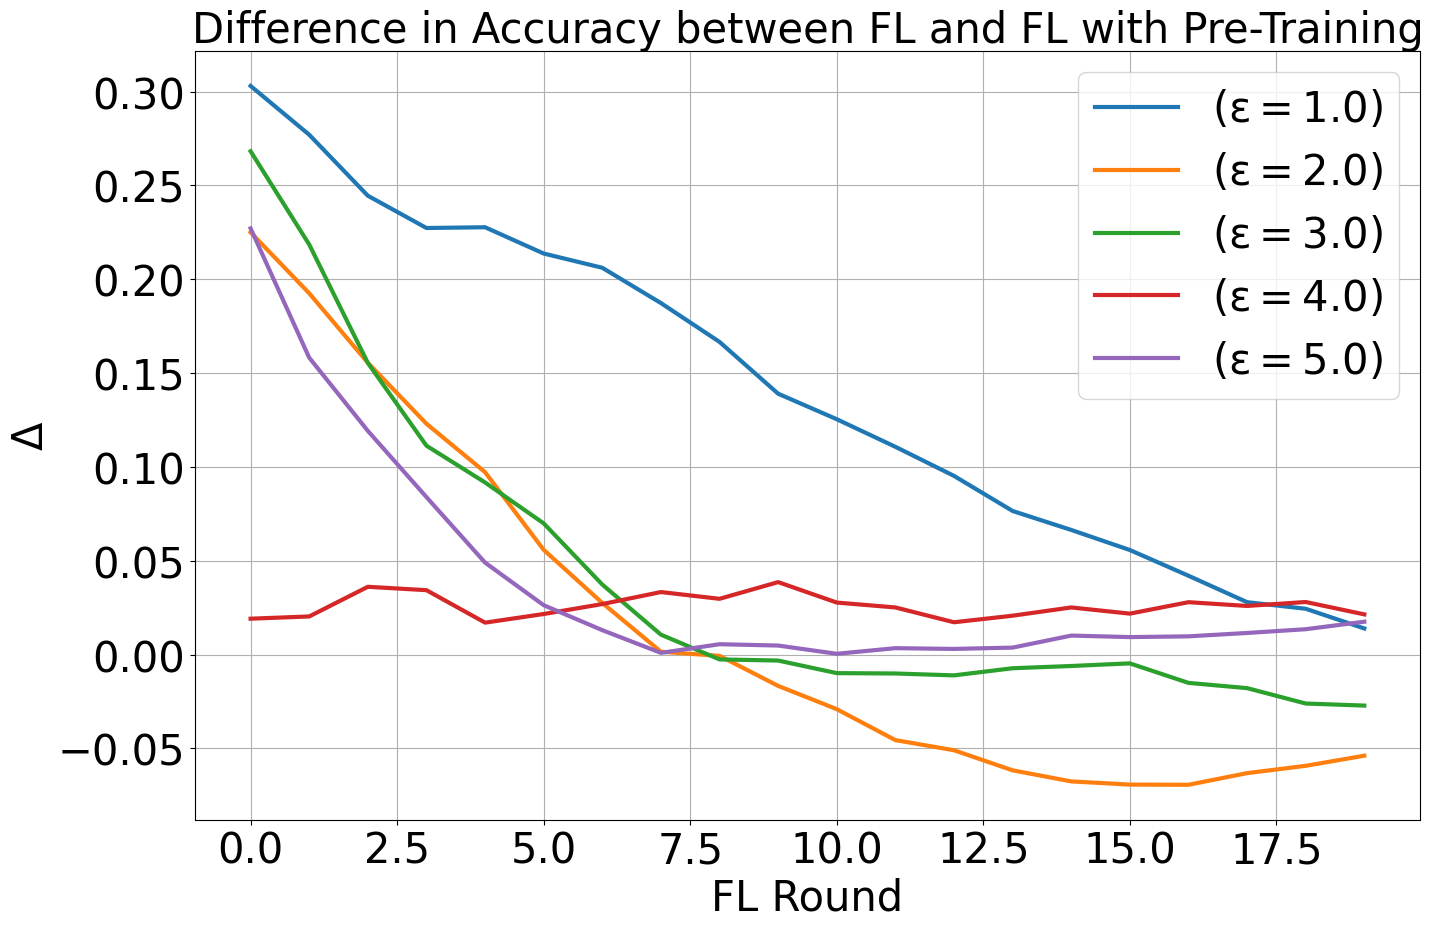

In [17]:
plot_differences(differences, dataset_name="mnist", size=0.5)

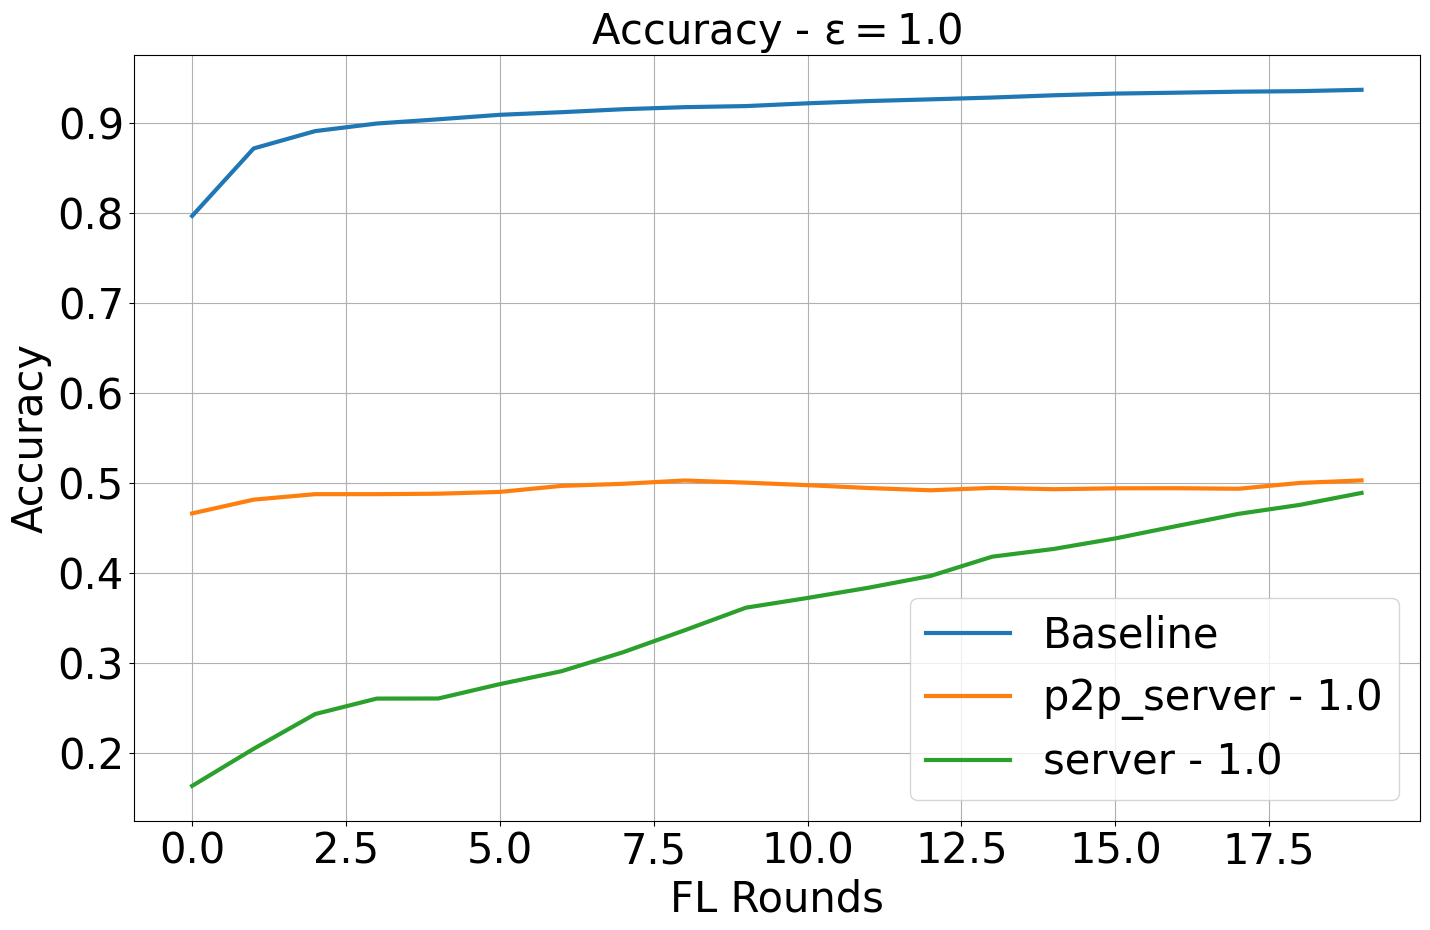

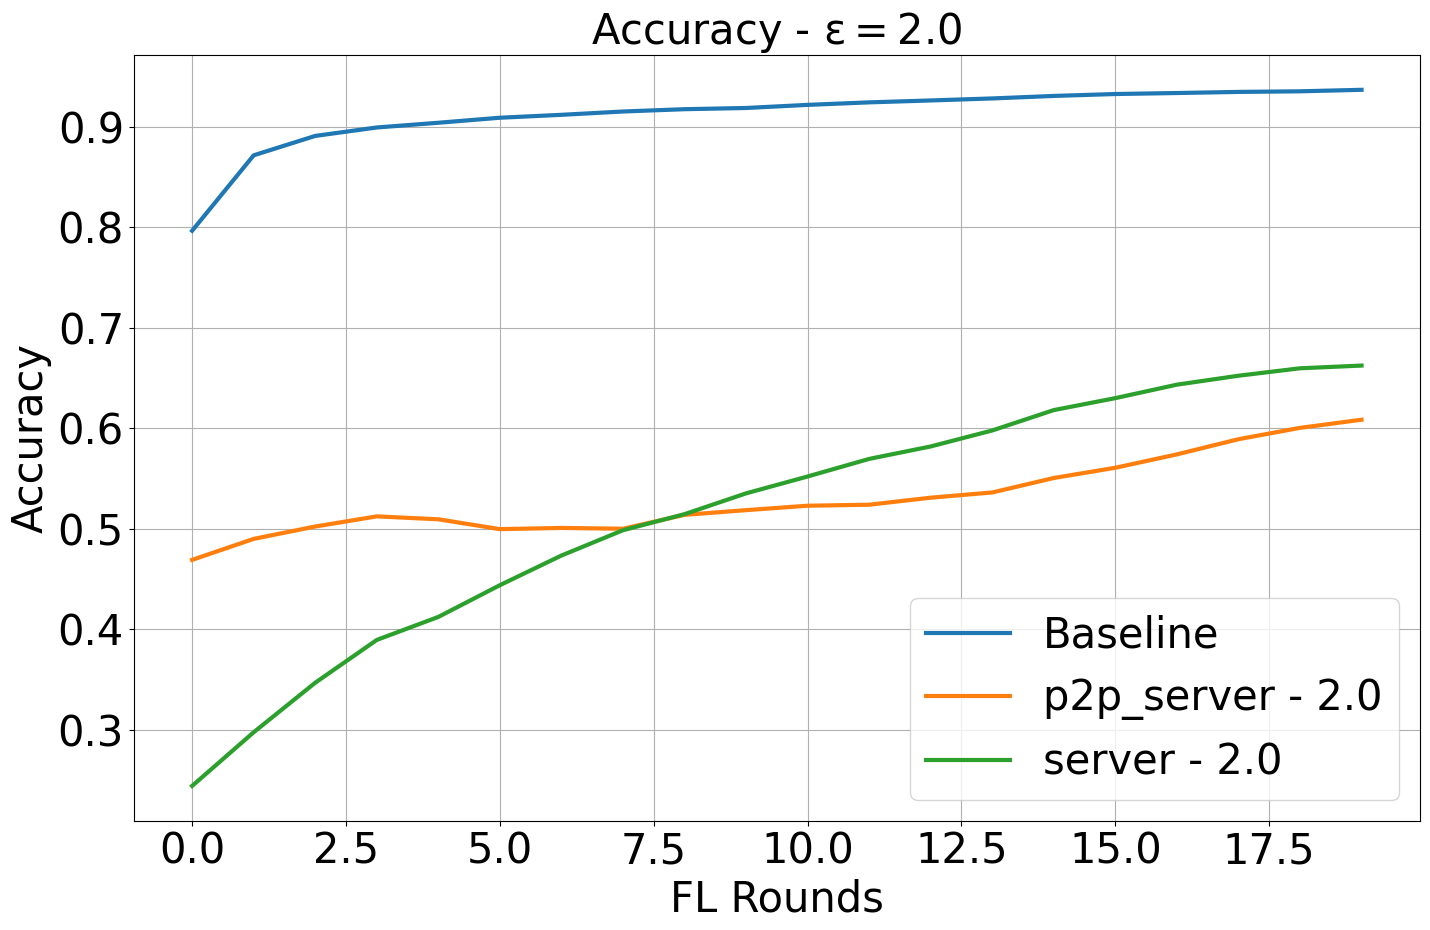

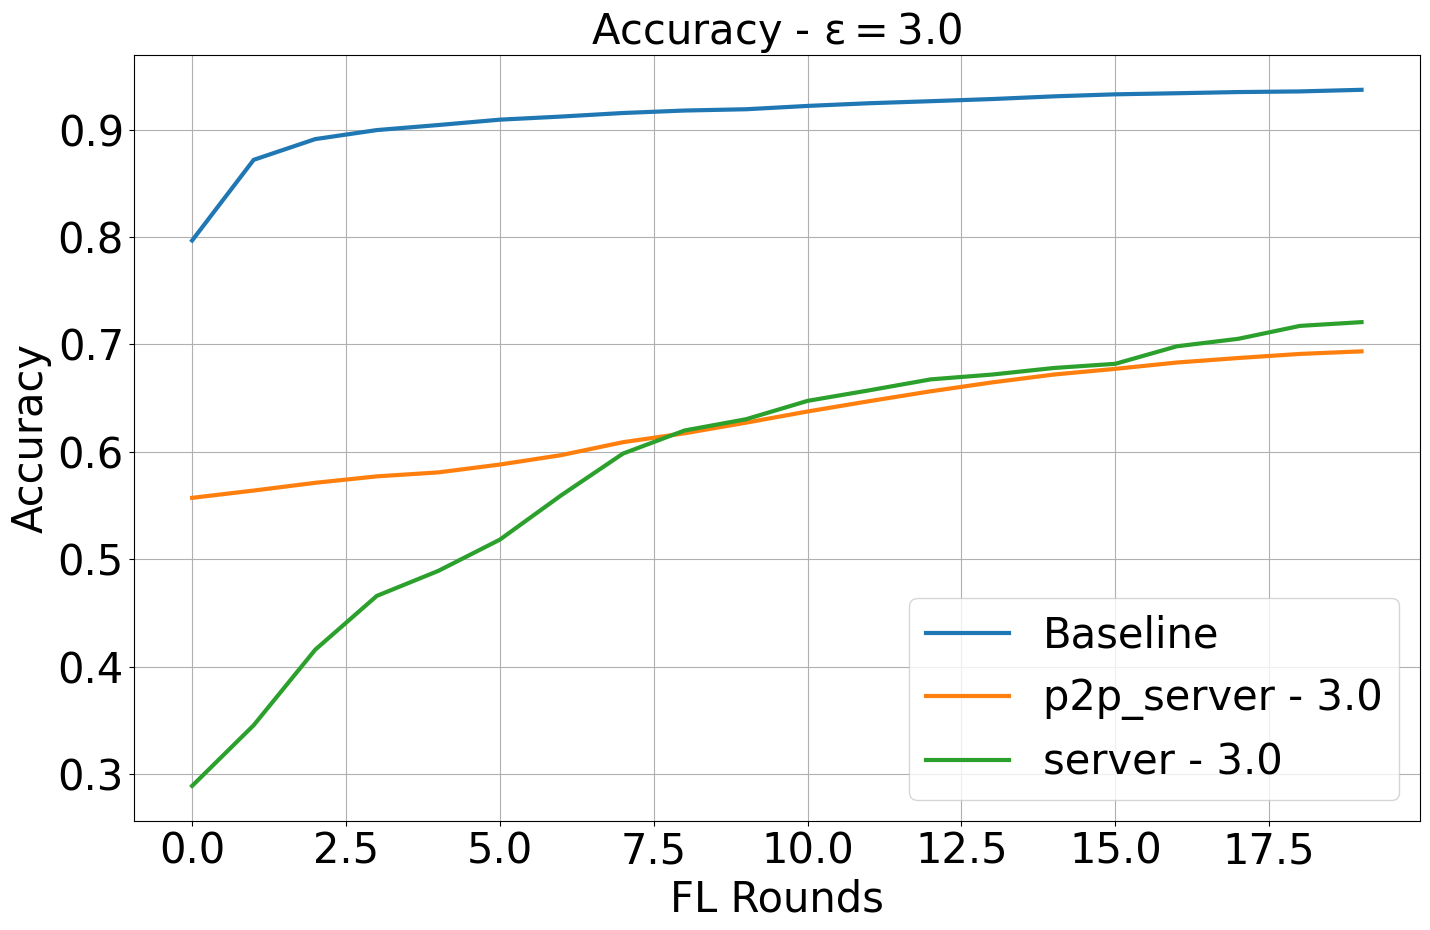

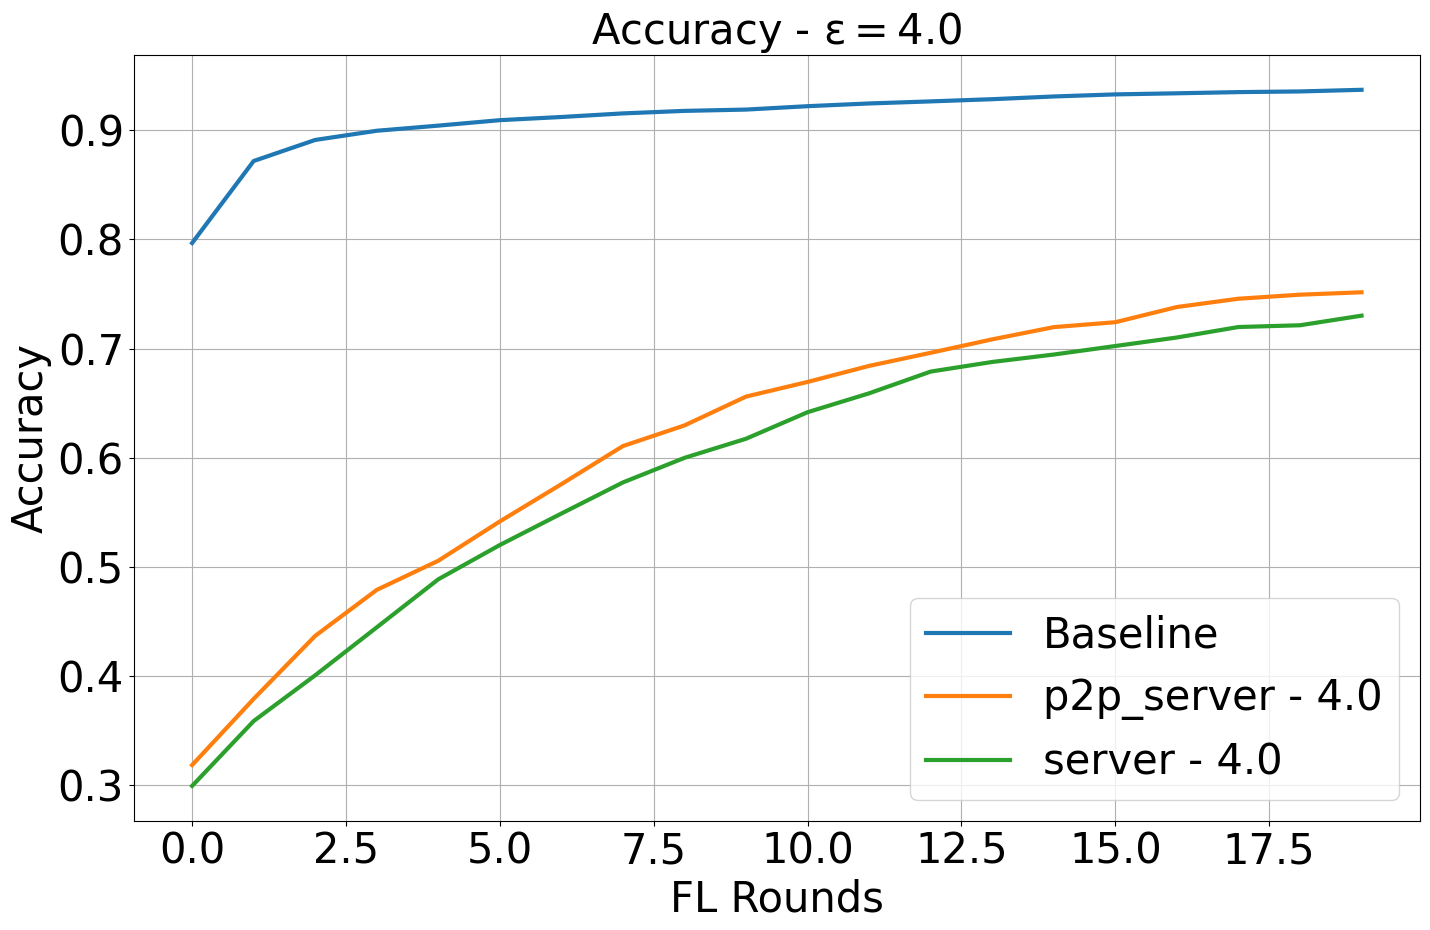

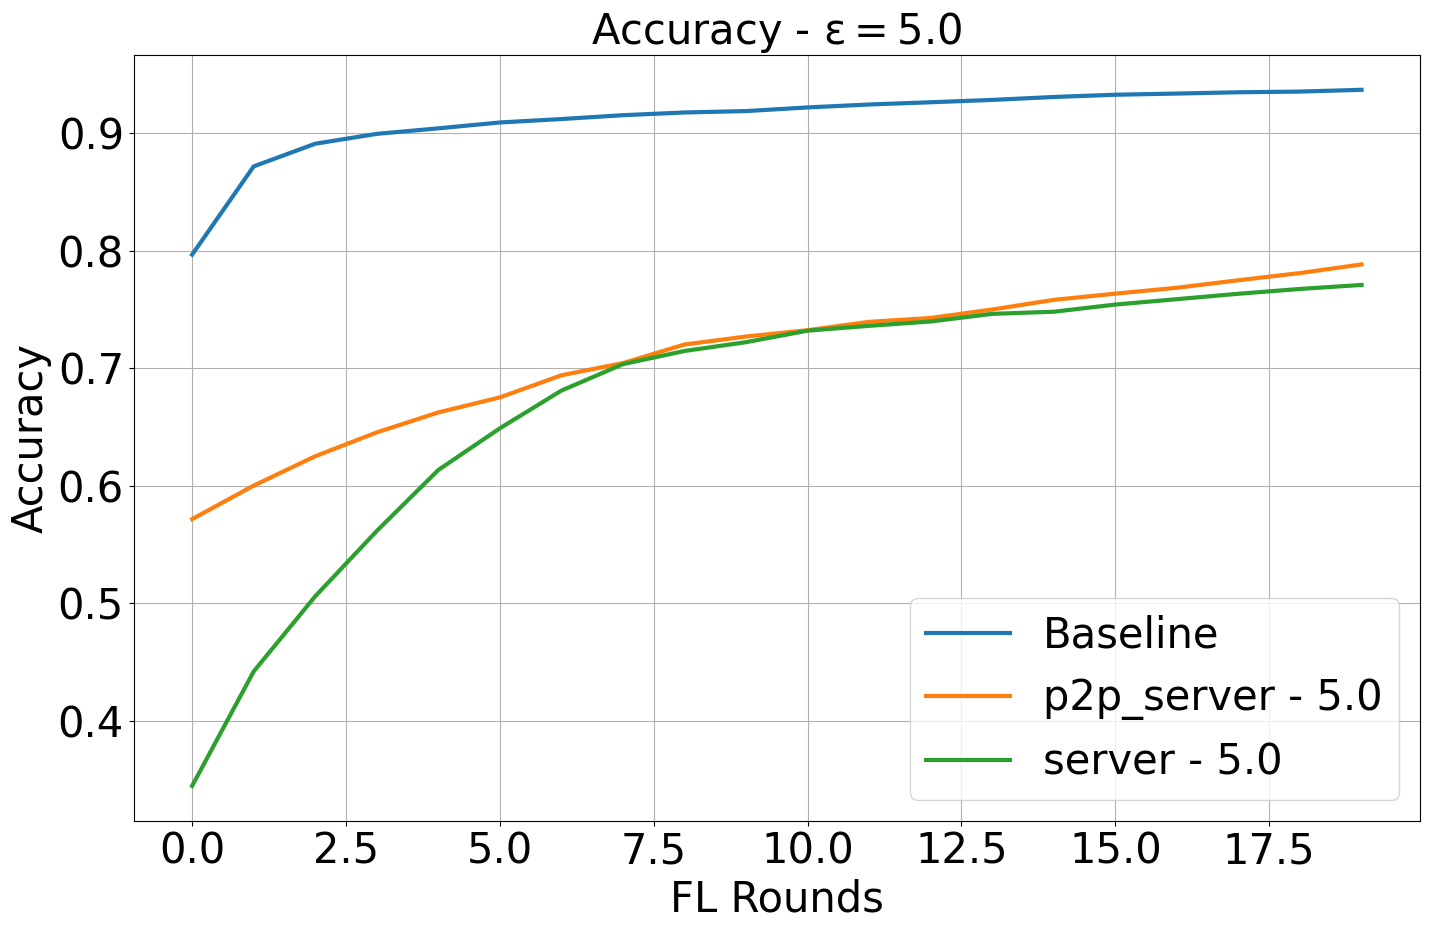

In [18]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.5", dataset_name="mnist")

# 60% Public

In [19]:
wandb_data = {
    "p2p_server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/mu7w5s0p"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/d5sj2w8p"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/fou3g3vt"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/k46sjt7g"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/xadlae4z"),
    },
    "server": {
        "1.0": get_data("/lucacorbucci/mnist_Sweeps/runs/1brdz8bt"),
        "2.0": get_data("/lucacorbucci/mnist_Sweeps/runs/858r17f8"),
        "3.0": get_data("/lucacorbucci/mnist_Sweeps/runs/0d4bt24m"),
        "4.0": get_data("/lucacorbucci/mnist_Sweeps/runs/i4nyph2o"),
        "5.0": get_data("/lucacorbucci/mnist_Sweeps/runs/7sxvu3fk"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

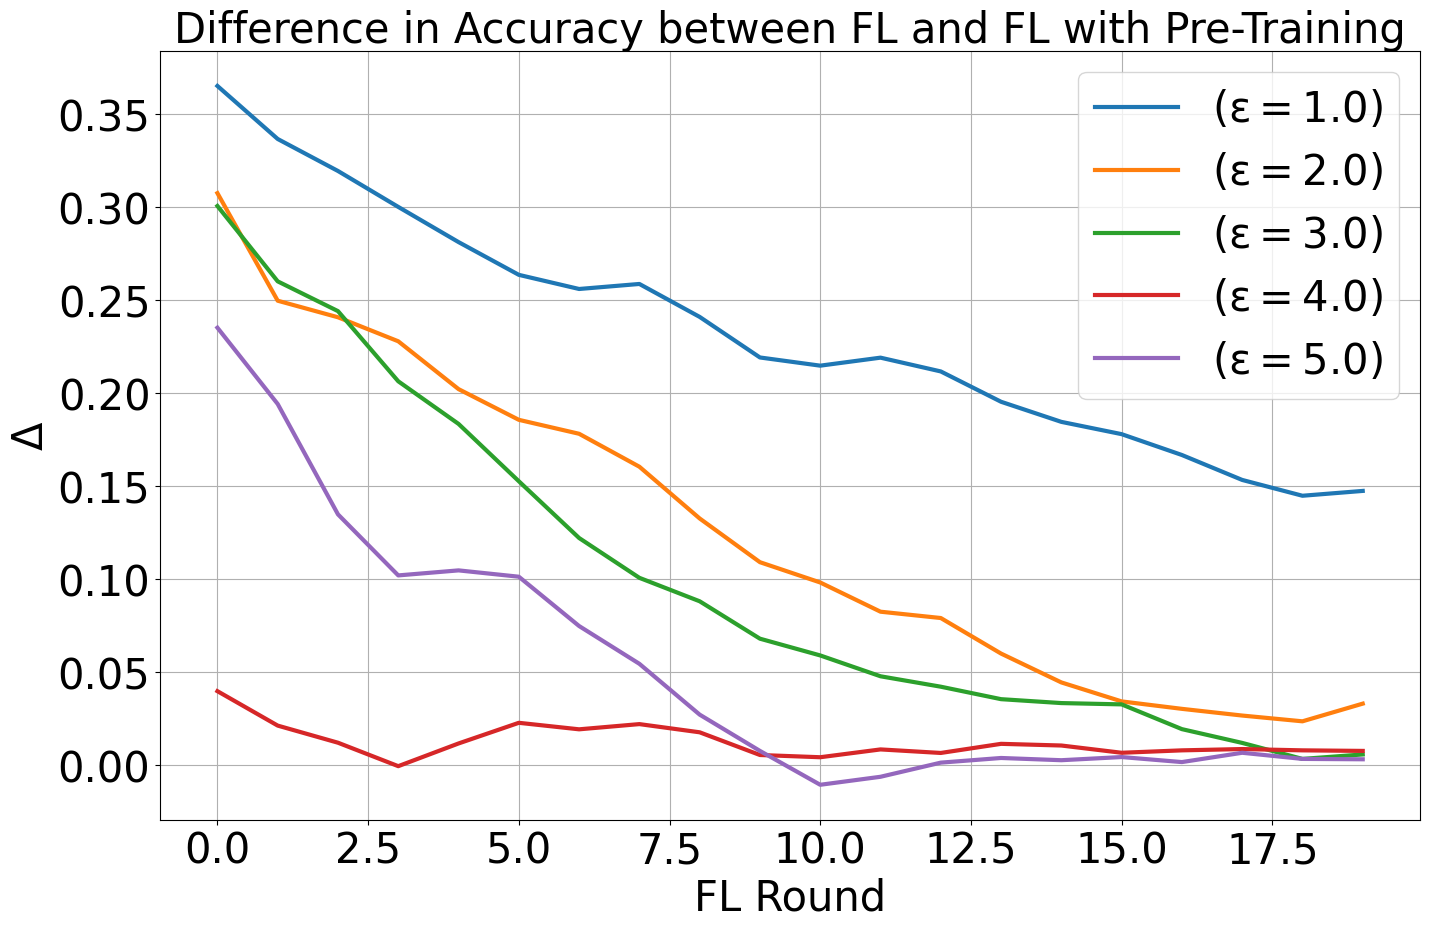

In [20]:
plot_differences(differences, dataset_name="mnist", size=0.6)

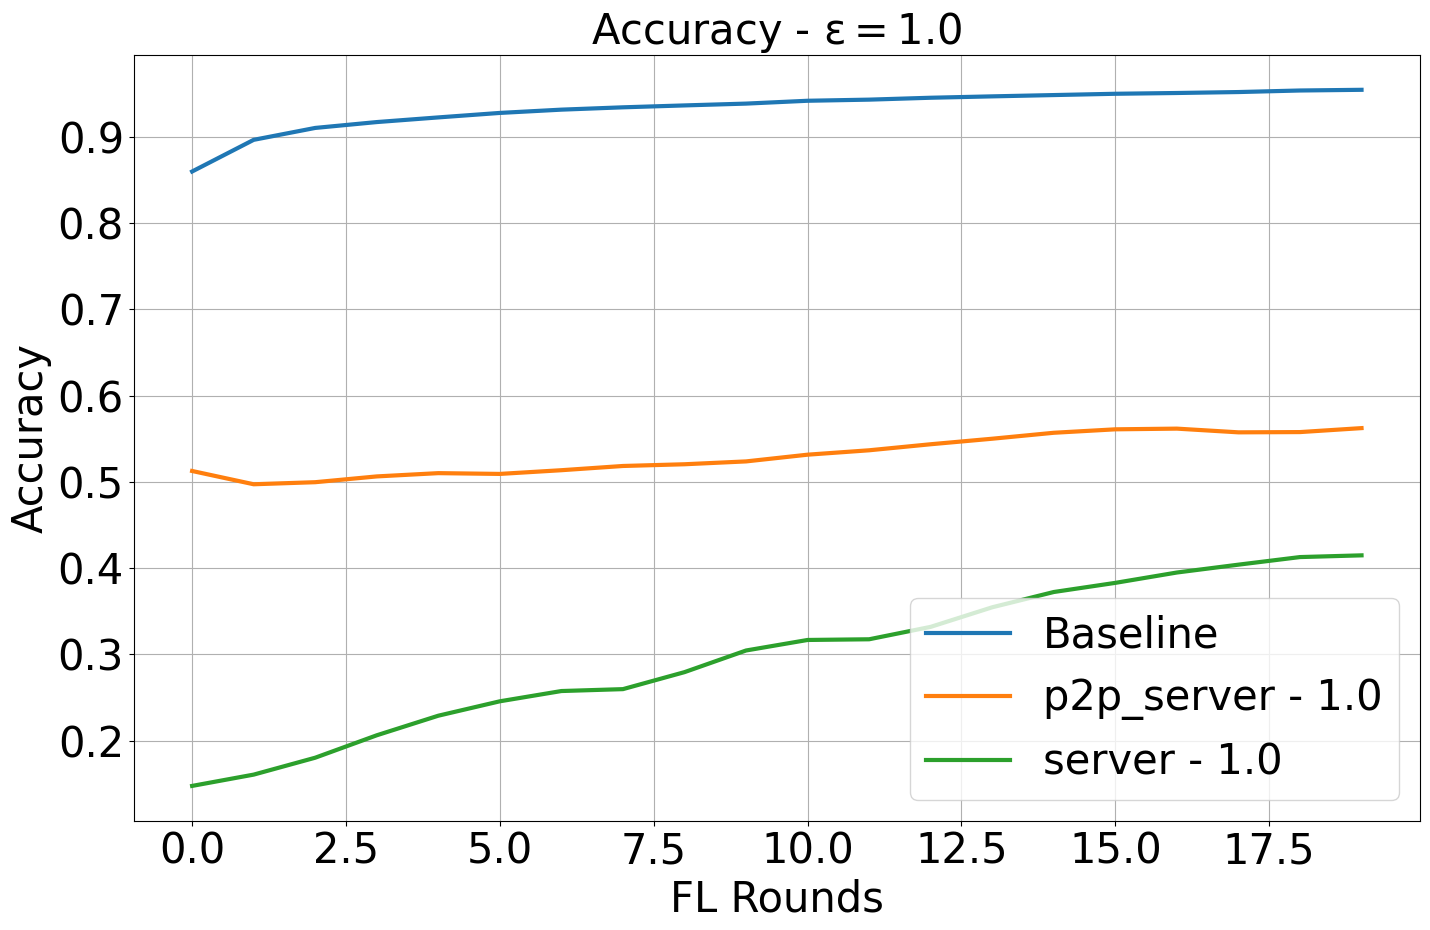

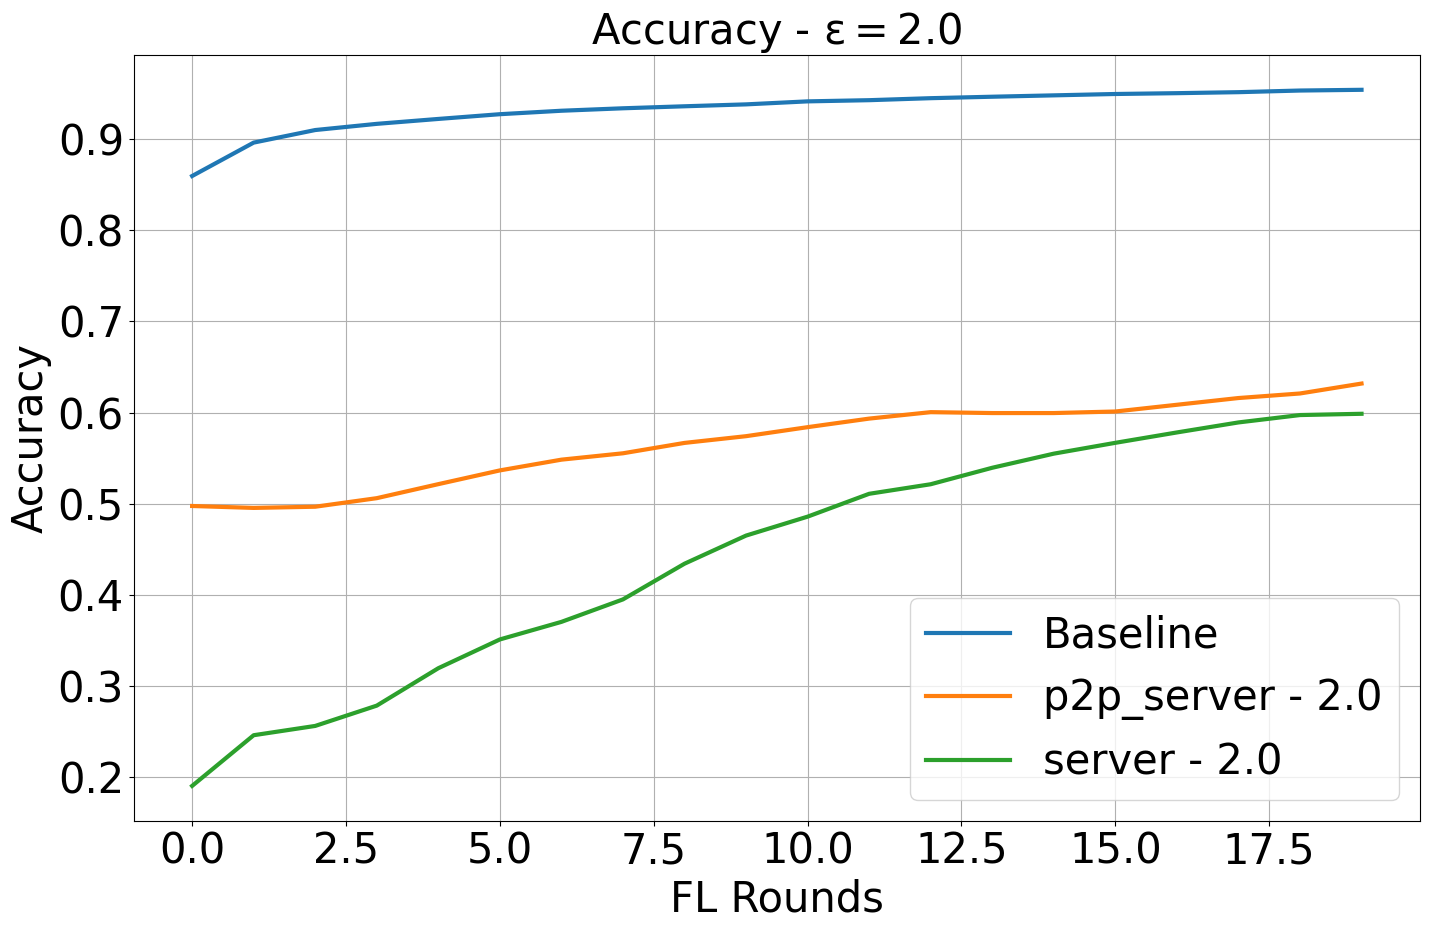

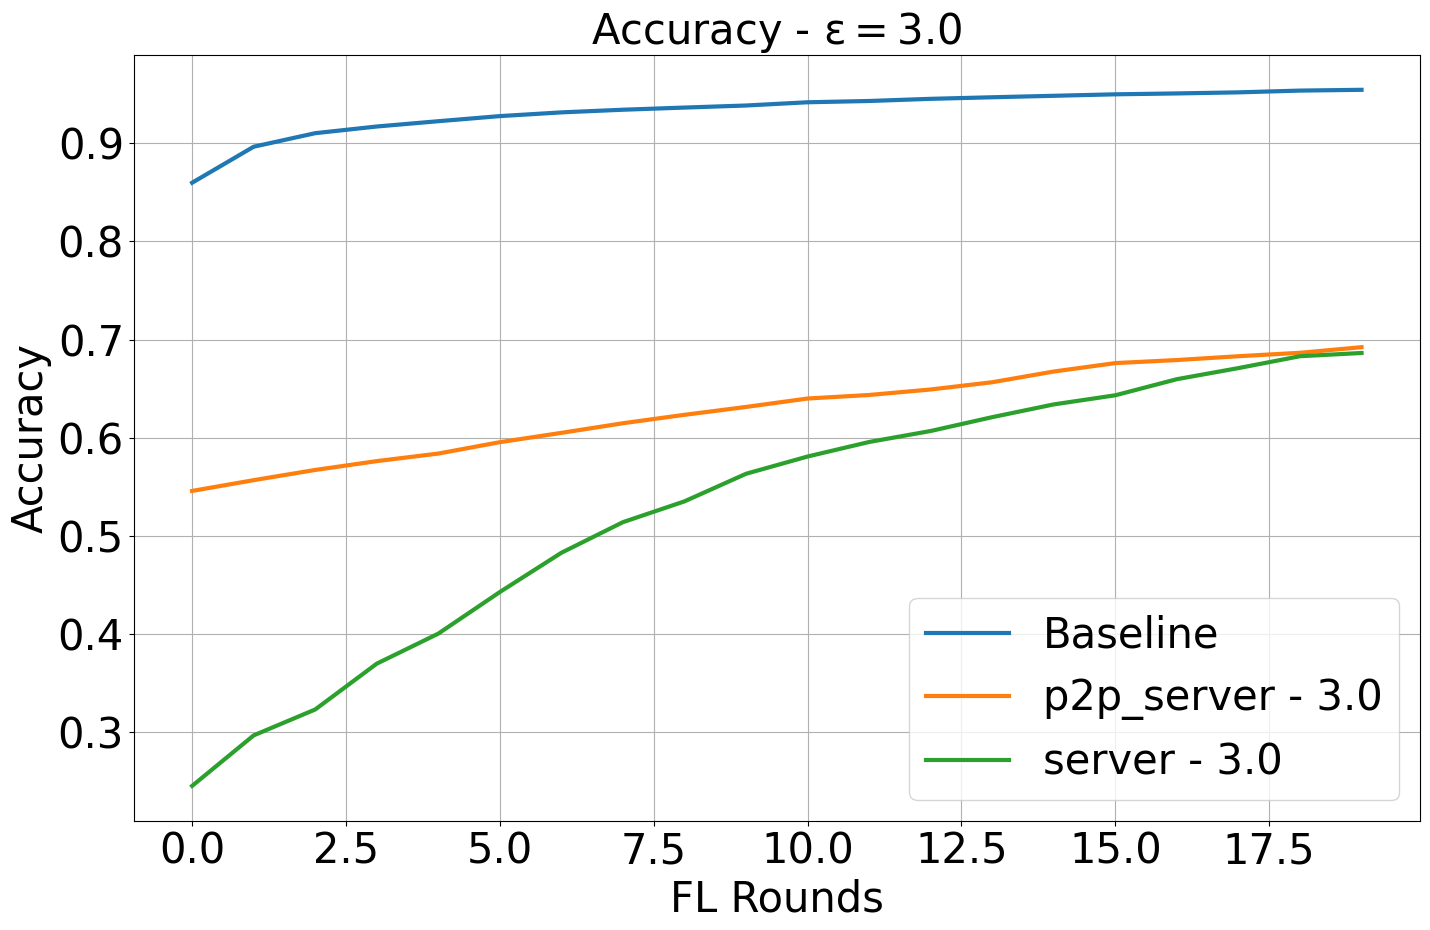

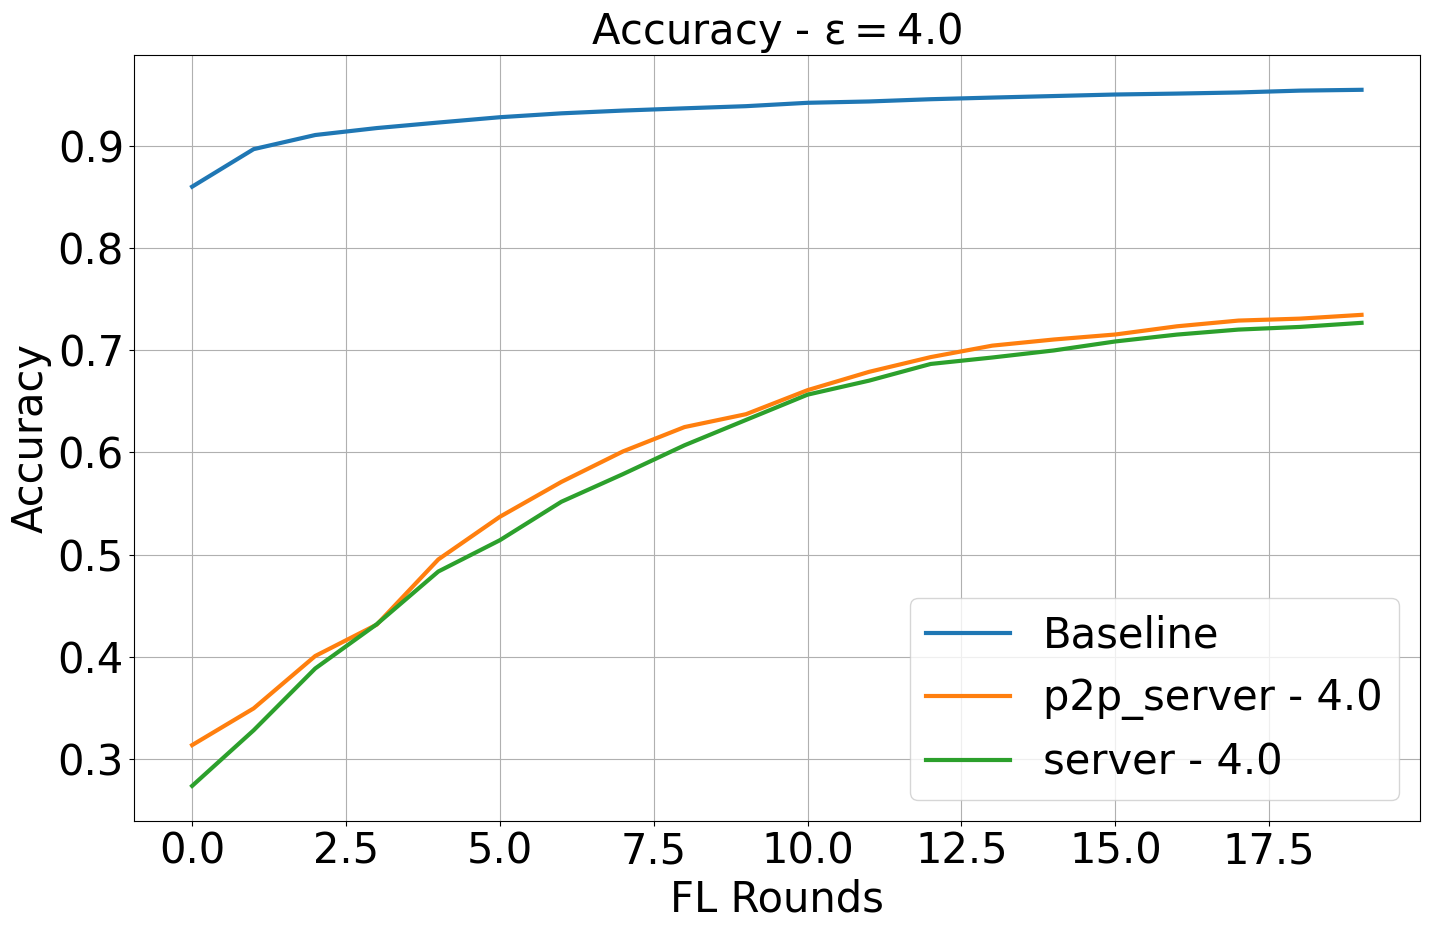

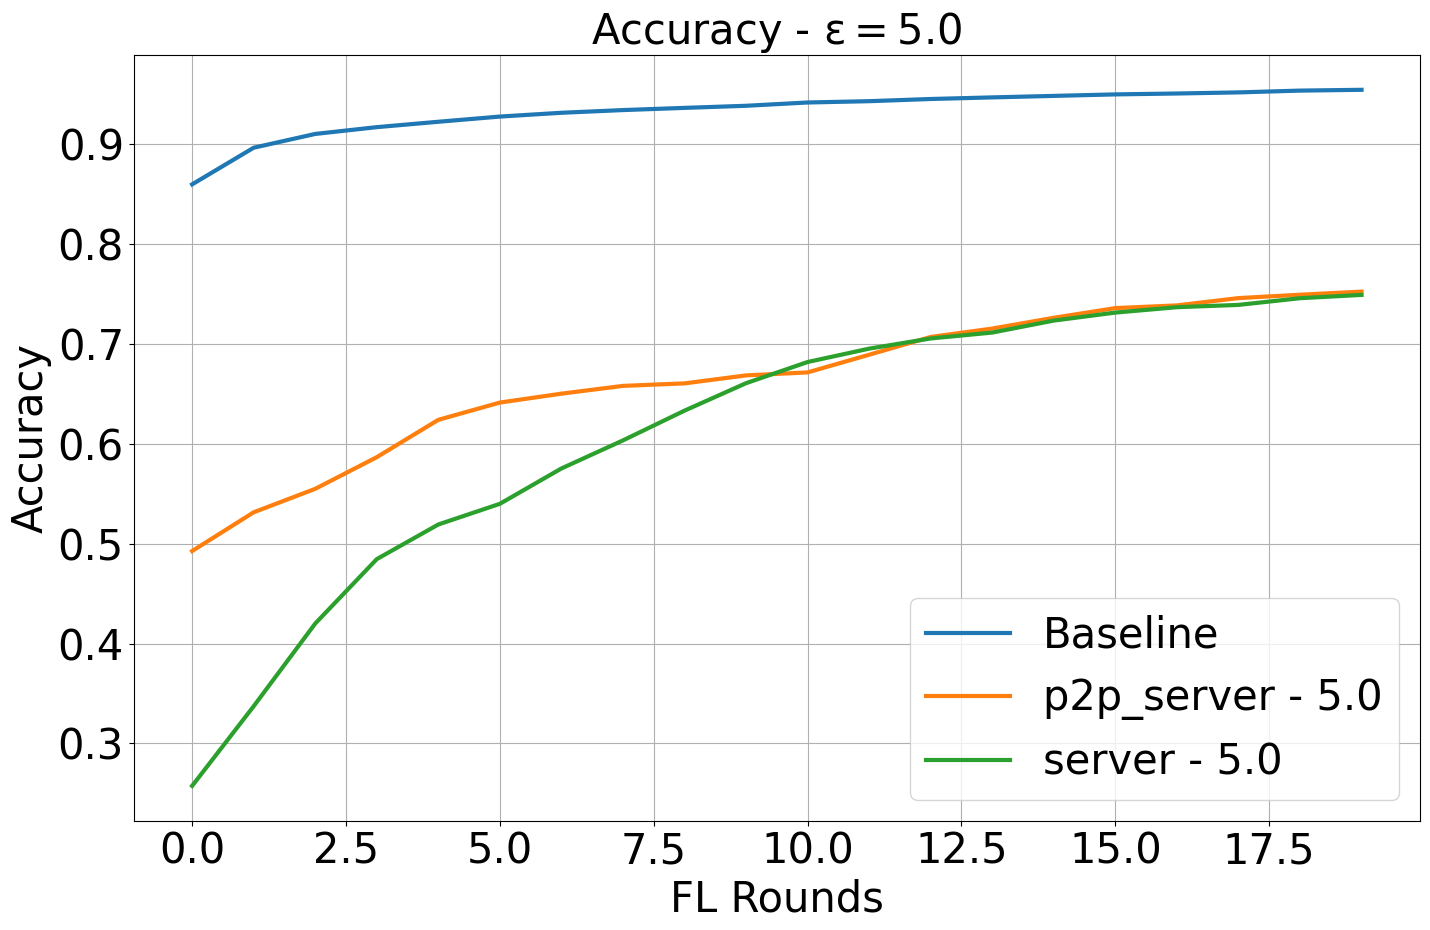

In [21]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.6", dataset_name="mnist")

# Dutch

In [22]:
baselines = {
    "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/u94k8z1z"),
    "0.3": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/e95tu6oc"),
    "0.4": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/64yyqimn"),
    "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/5j6s3cch"),
    "0.6": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/xre334u9"),
}
baselines_accuracy = {
    experiment_name: remove_nan(value, "Test Accuracy on the server")
    for experiment_name, value in baselines.items()
}

# 20% Public

In [23]:
wandb_data = {
    "p2p_server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/mpkn4ywz"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/hhocjgbz"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/awwey9ht"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/x9xhanw4"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/d7votfim"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/di5reg2p"),
    },
    "server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/luvg8e2q"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/em7prv29"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/ouigvgag"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/b1mw4mba"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/hm1lv9bl"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/4dtqne3s"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

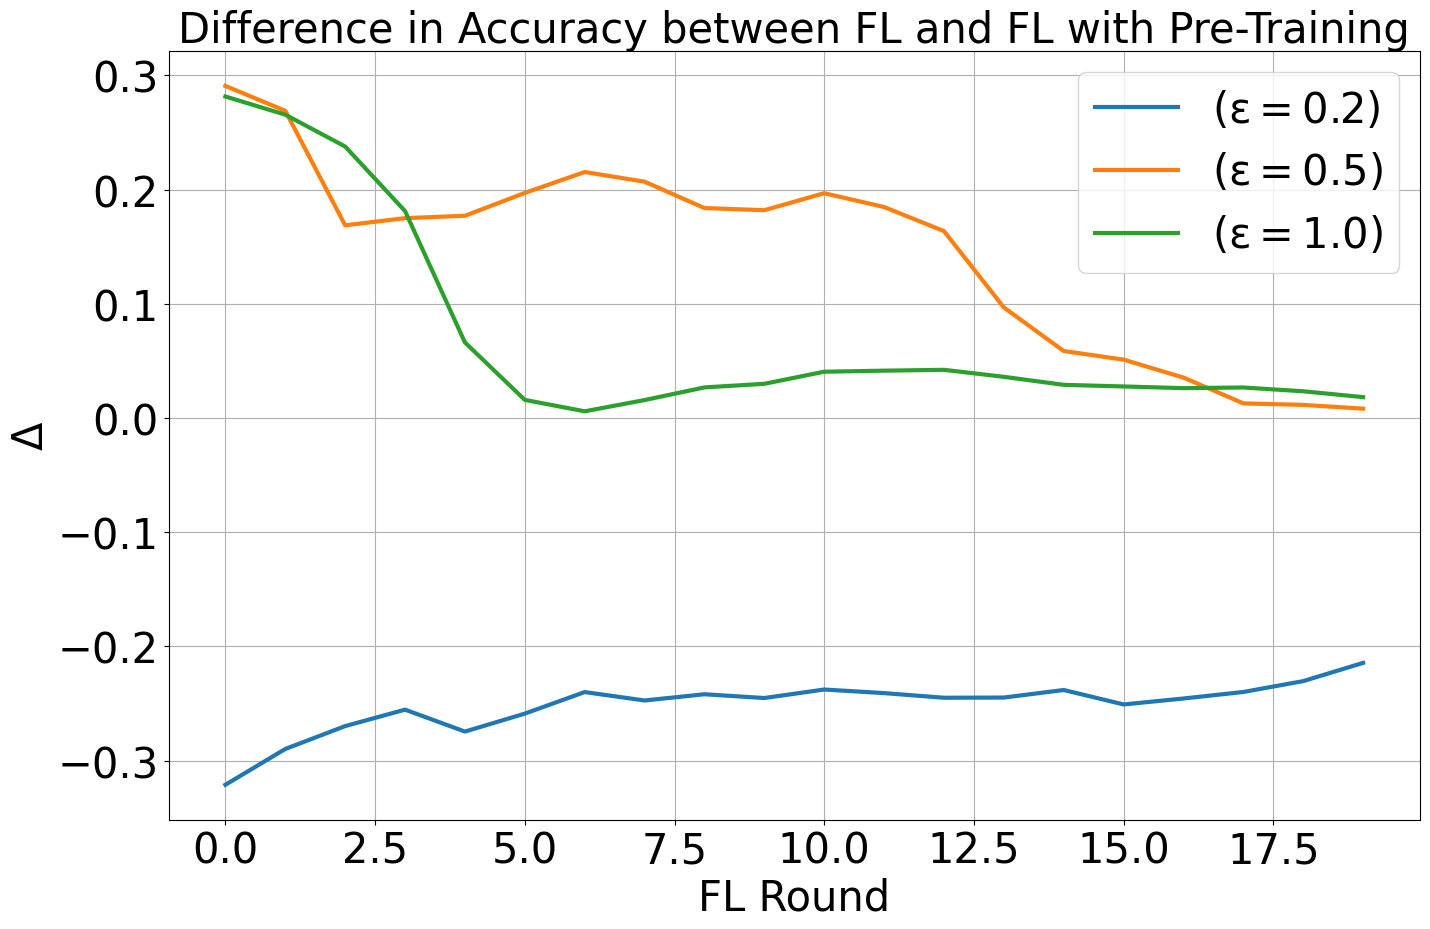

In [24]:
plot_differences(differences, dataset_name="dutch", size=0.2)

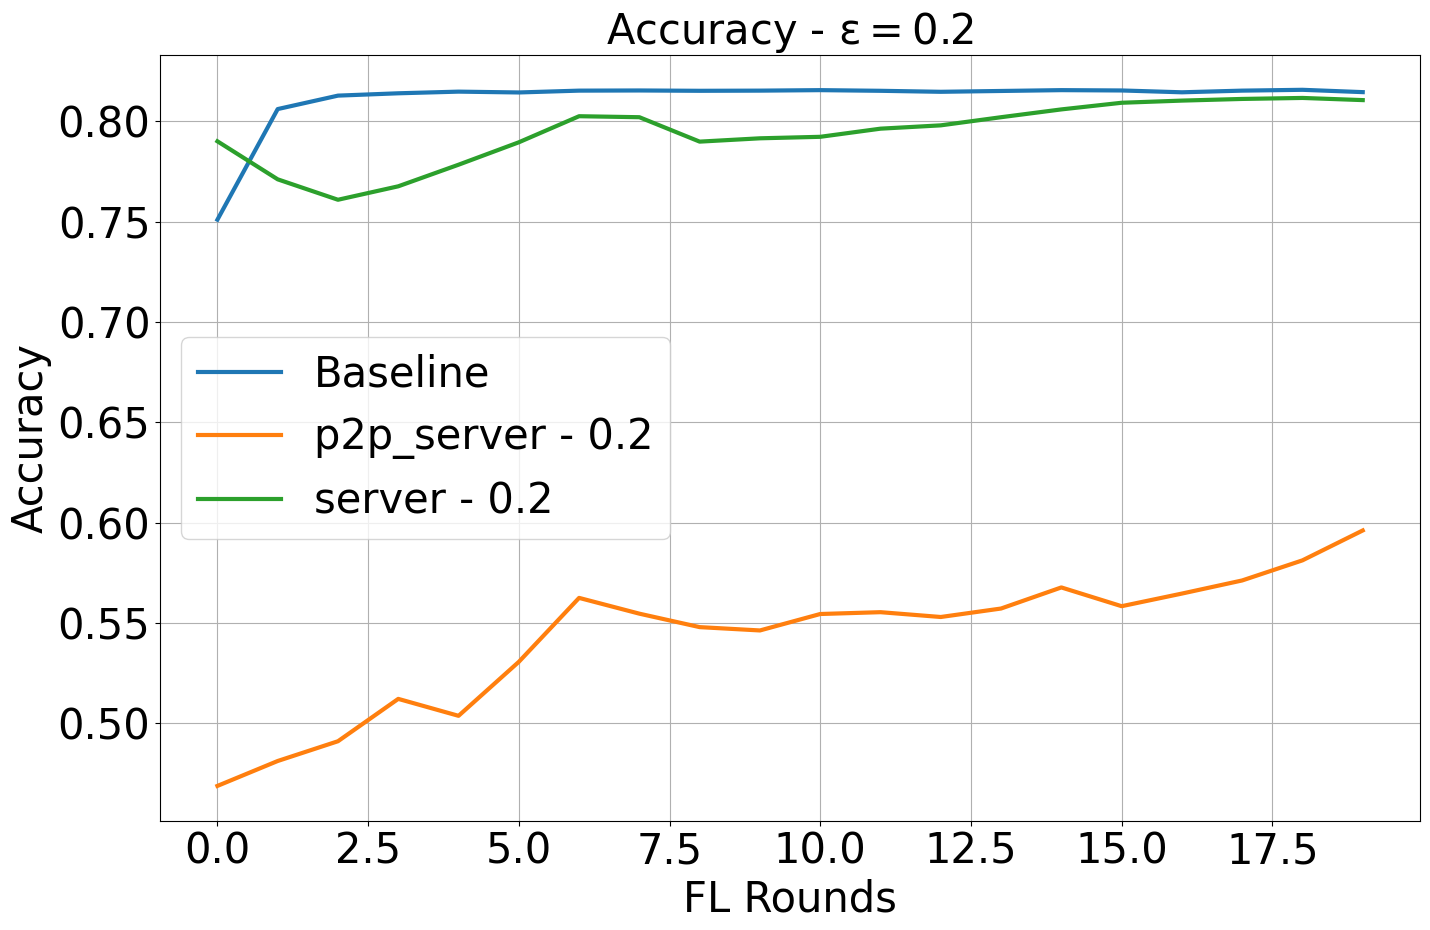

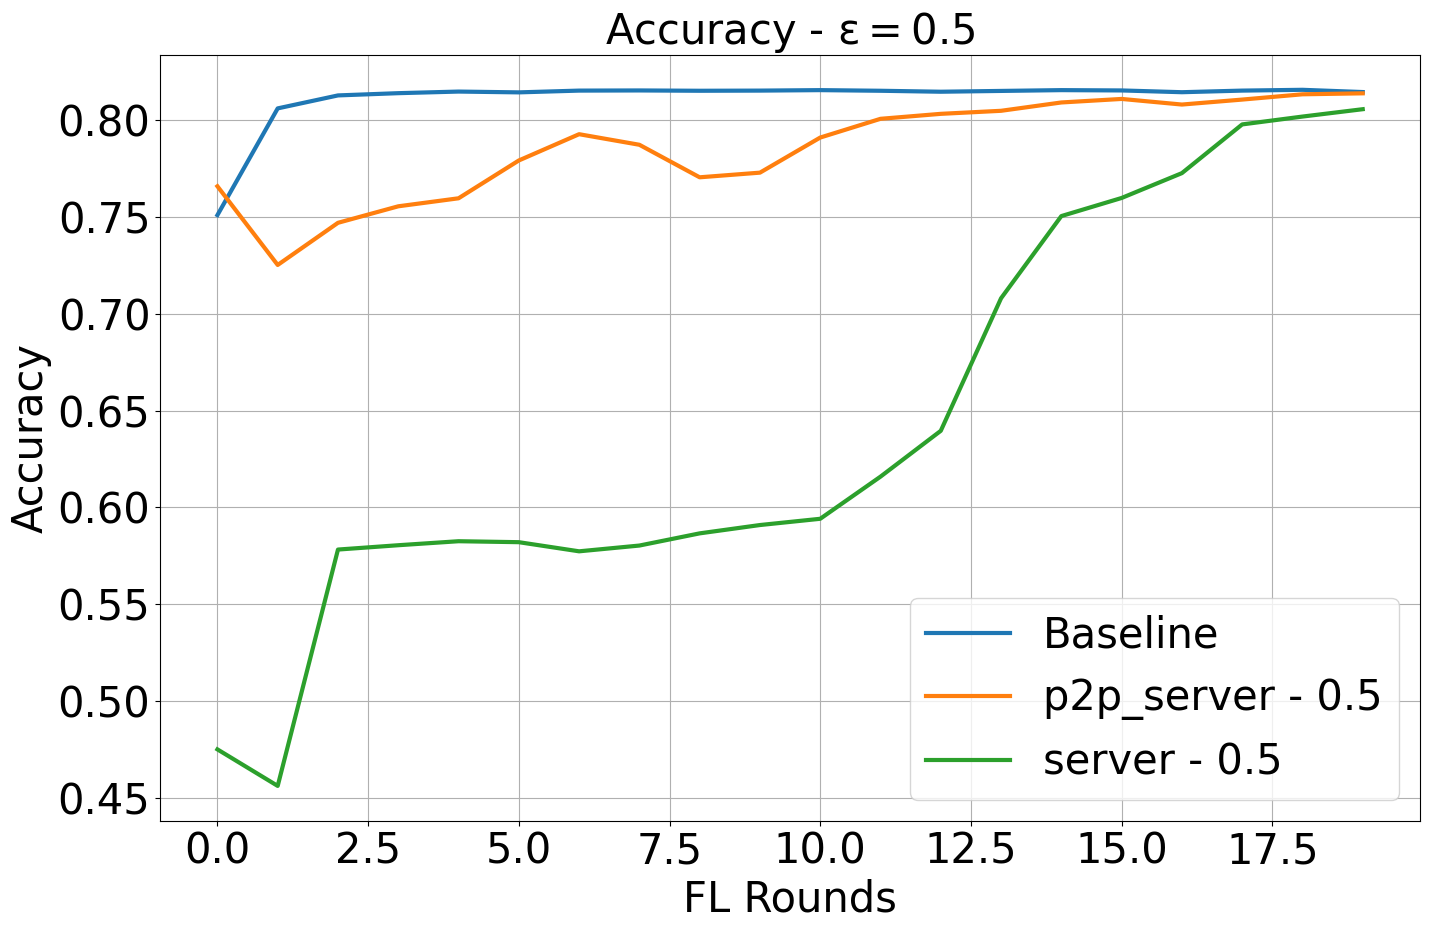

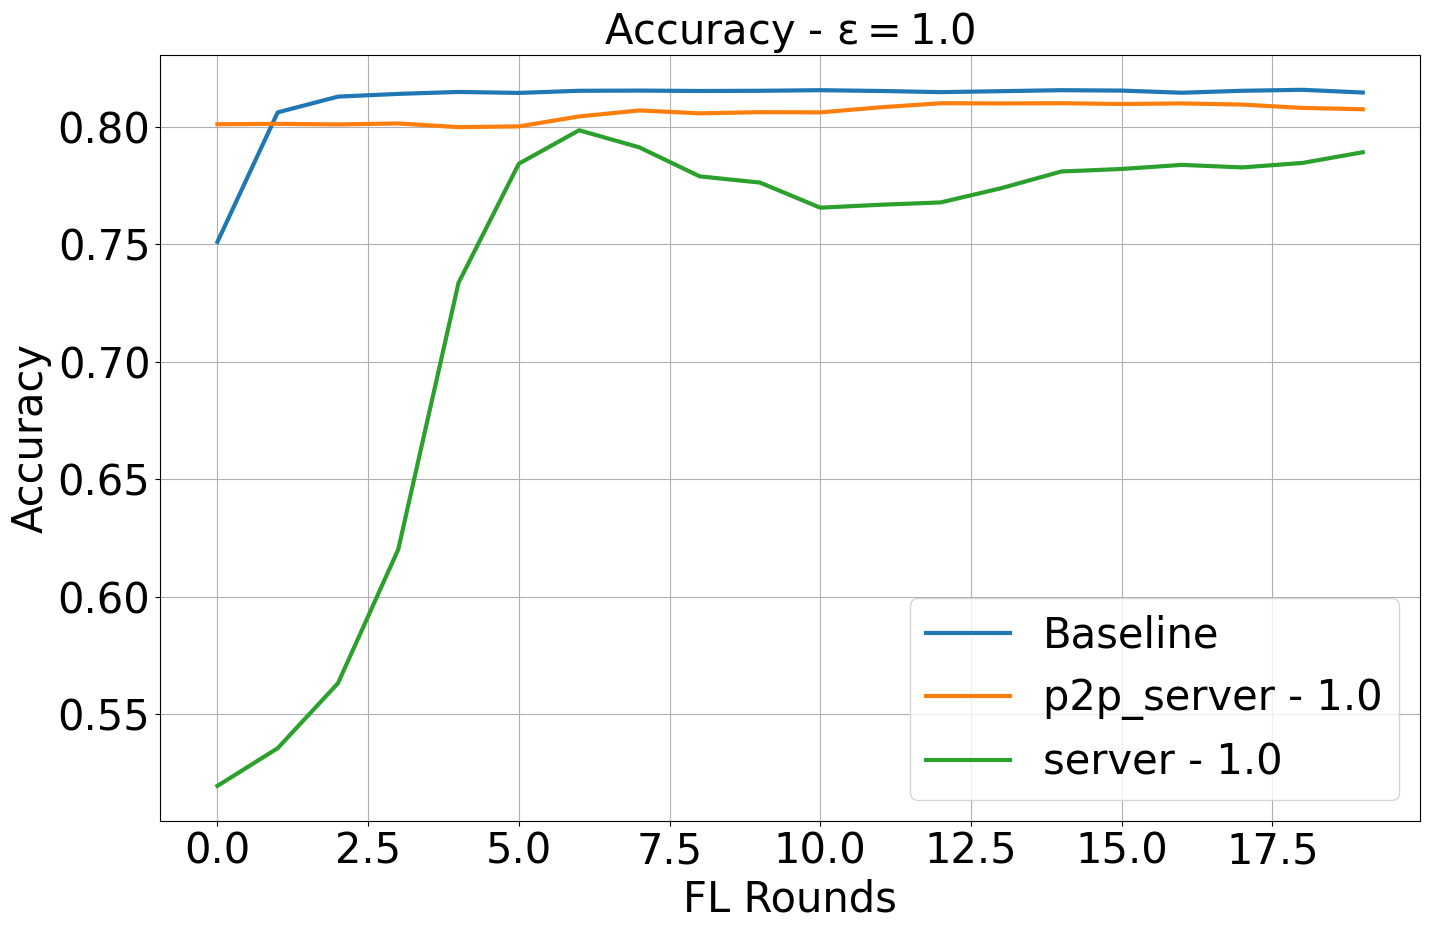

In [25]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.2", dataset_name="dutch")

# 30% Public

In [26]:
wandb_data = {
    "p2p_server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/f65rkews"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/3qsn6ed2"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/5cjmnupl"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/7czy8phs"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/77ypwxpy"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/81eum7y7"),
    },
    "server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/2gu5ltzd"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/xwi86d3v"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/zoivhvqv"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/c84ur335"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/jggc2e46"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/4qaer27o"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}
differences = compute_difference(test_accuracy, "p2p_server", "server")

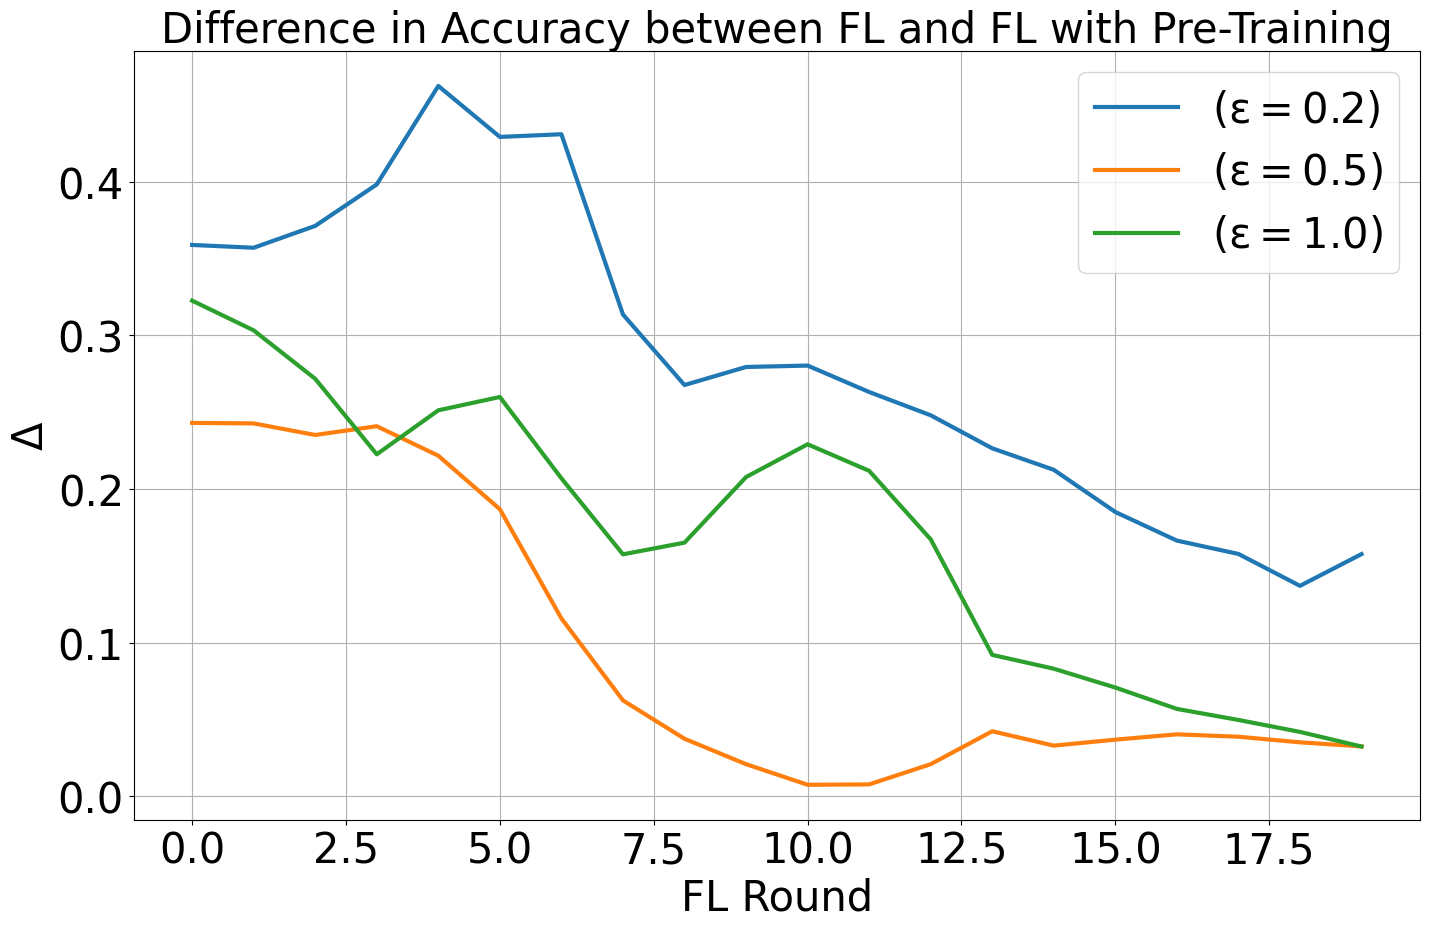

In [27]:
plot_differences(differences, dataset_name="dutch", size=0.3)

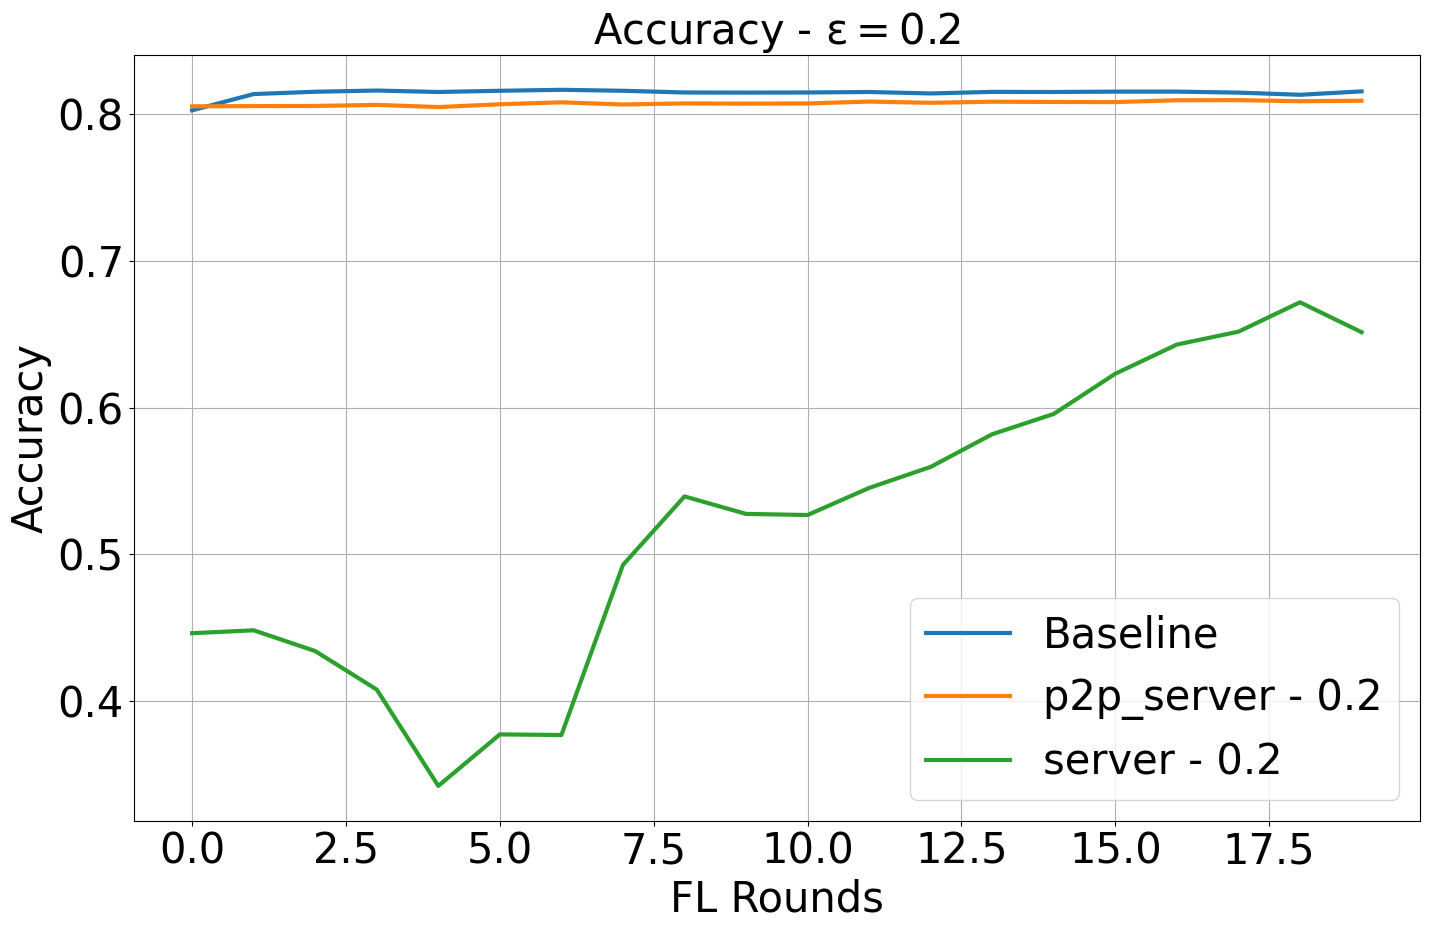

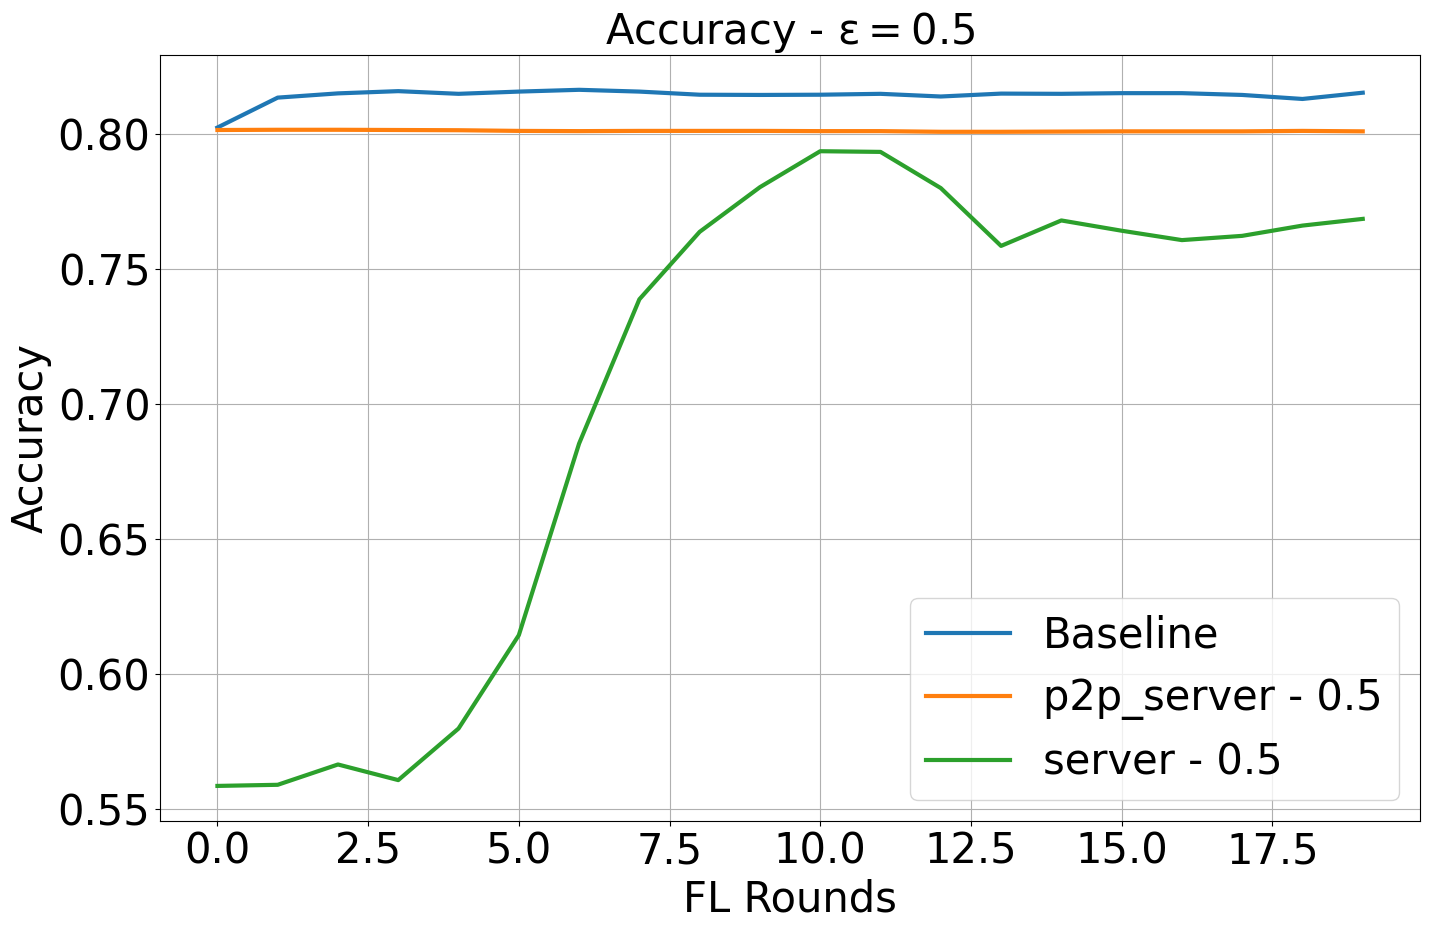

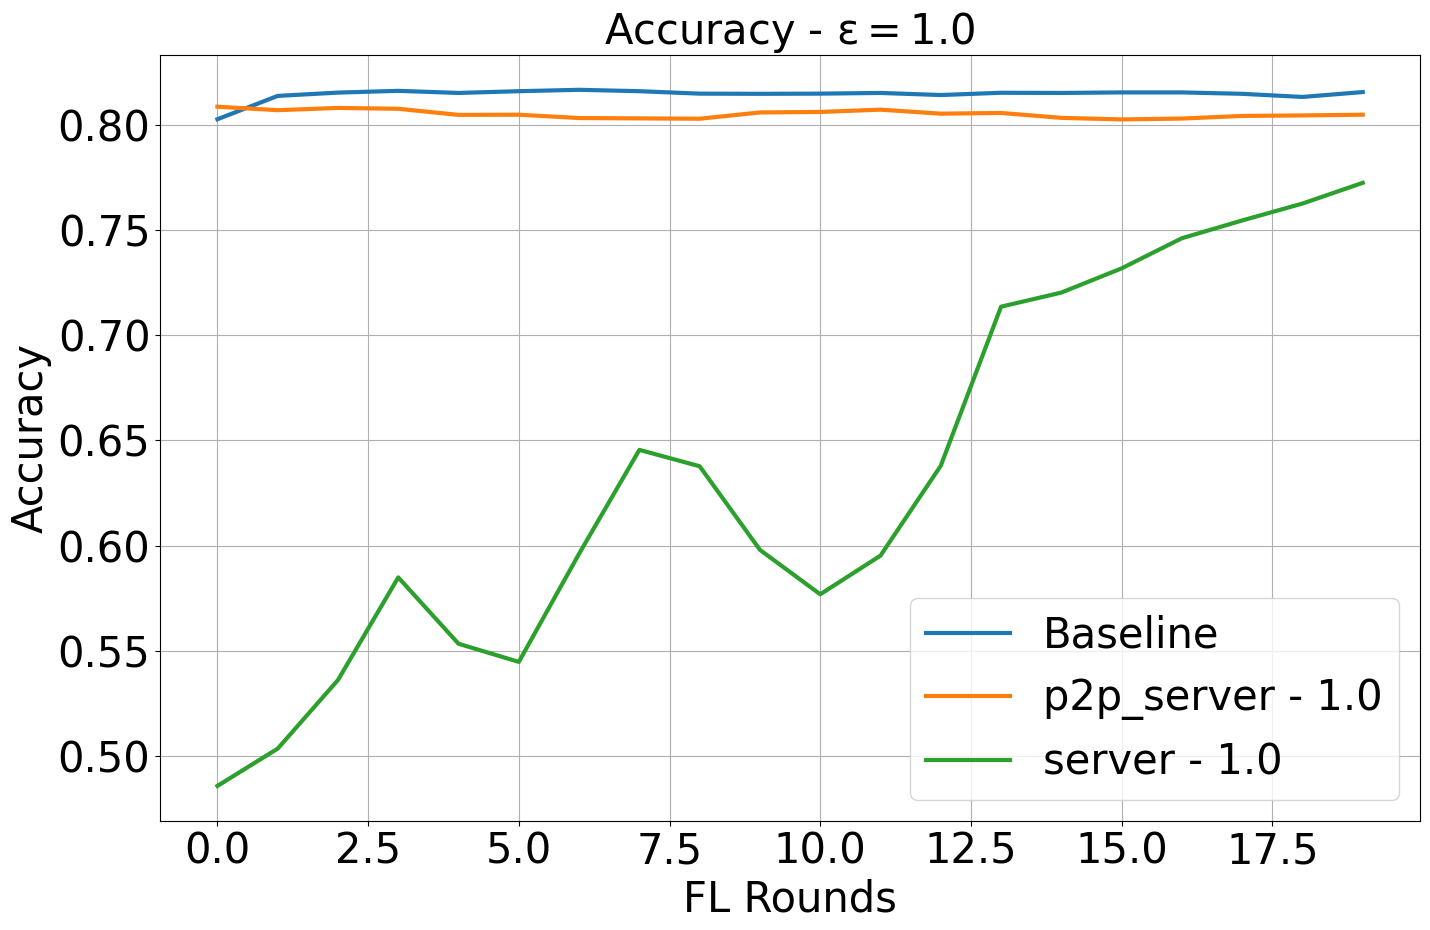

In [28]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.3", dataset_name="dutch")

# 40% Public

In [29]:
wandb_data = {
    "p2p_server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/8xdj66z5"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/z78d5w8p"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/7o9uxuvl"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/oe2hp4es"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/yvcwhtc0"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/g51dpxtr"),
    },
    "server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/67lxbpq5"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/5xo2b9wq"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/cv251io0"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/7v71jfdn"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/rzoknahh"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/98nqogv6"),
    },
}


test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

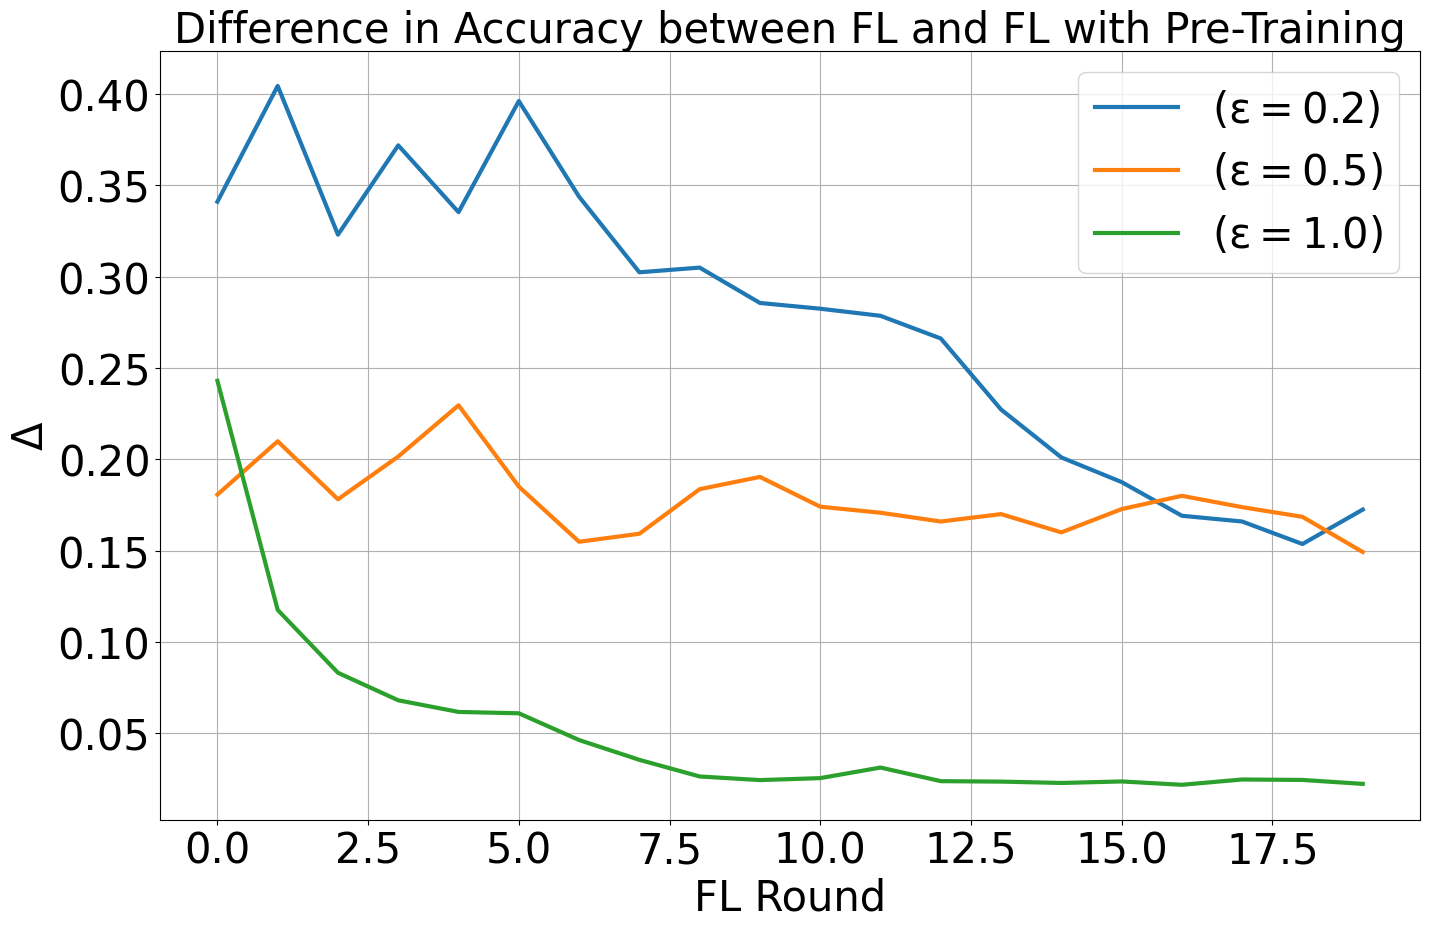

In [30]:
plot_differences(differences, dataset_name="dutch", size=0.4)

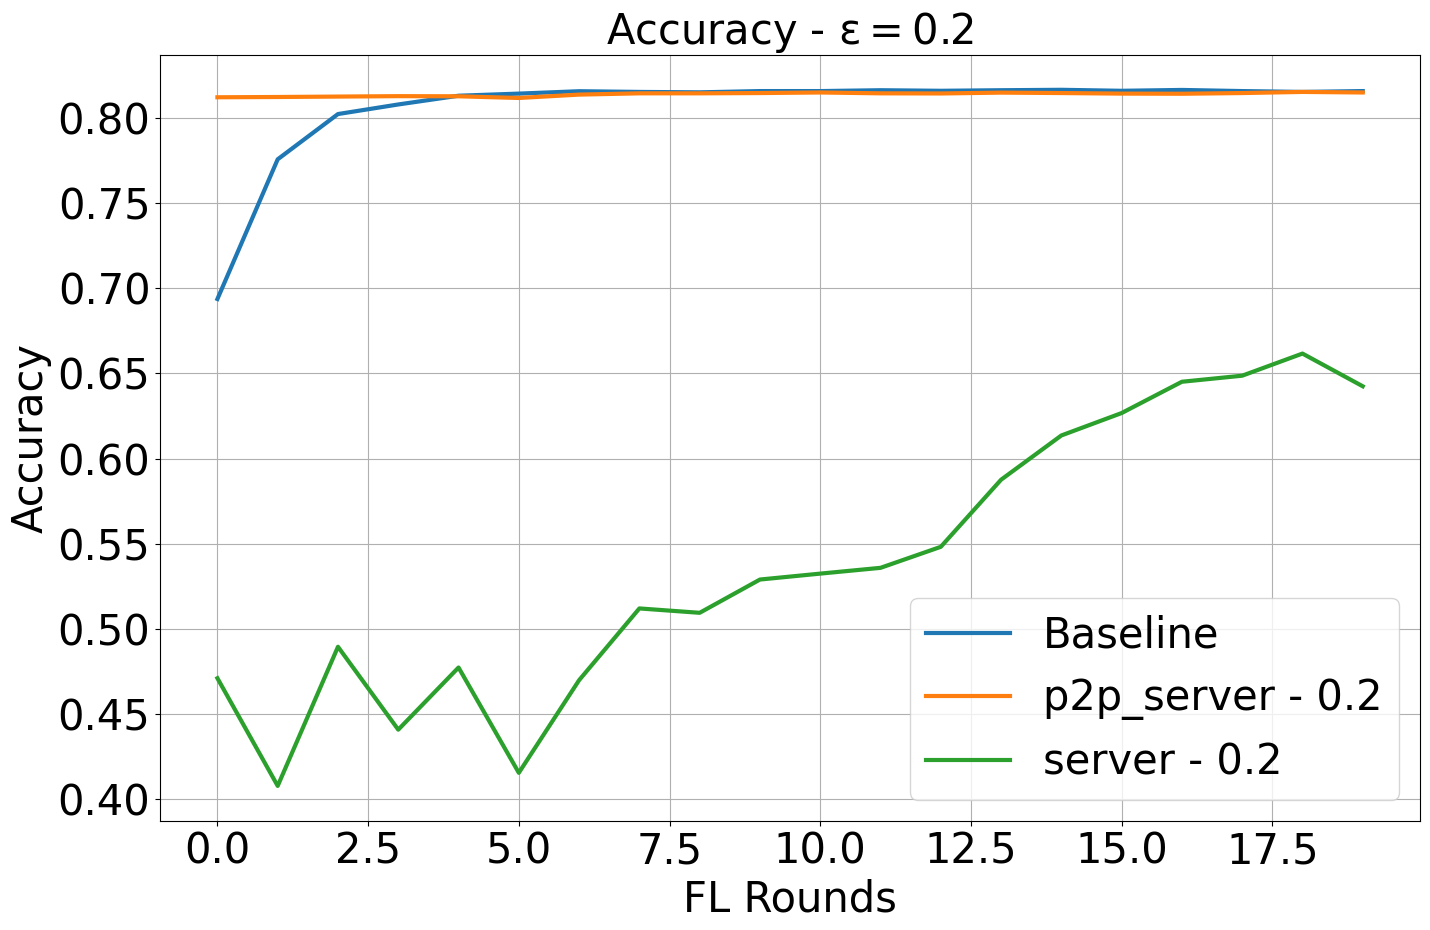

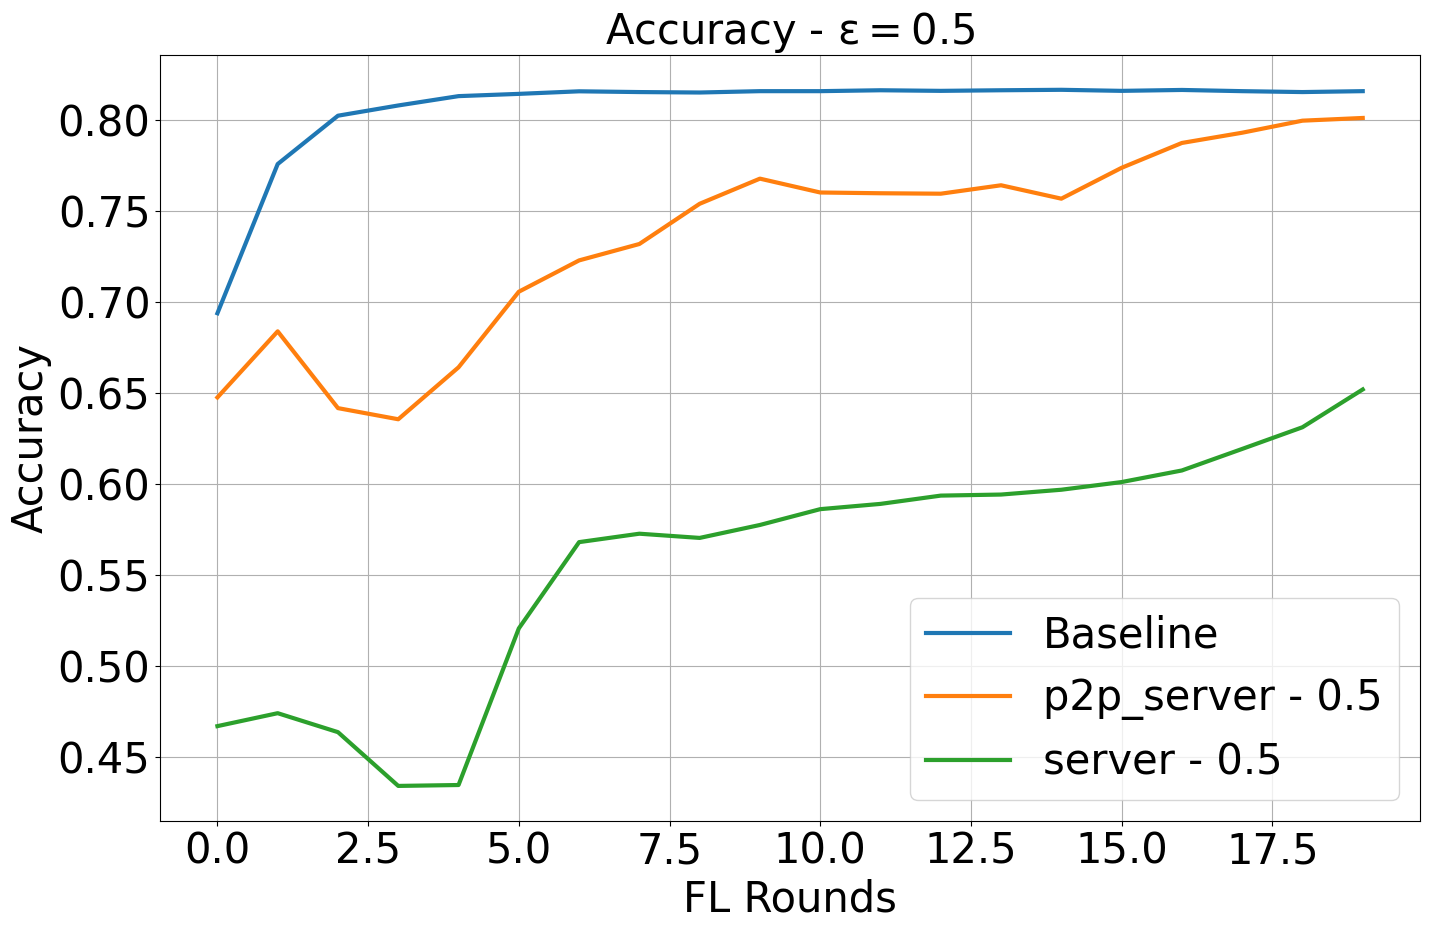

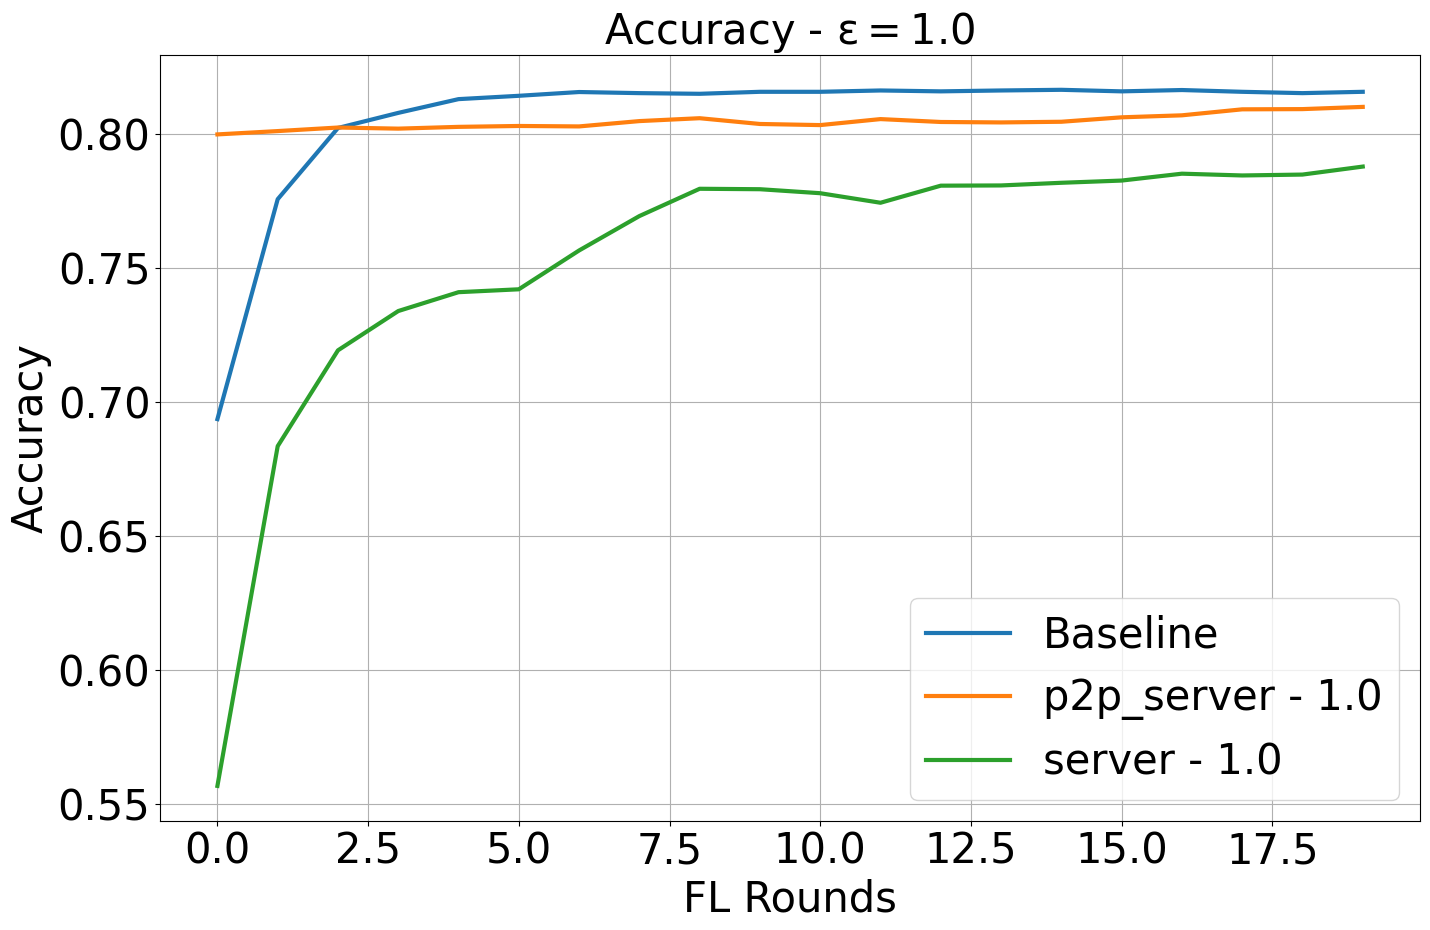

In [31]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.4", dataset_name="dutch")

# 50% Public

In [32]:
wandb_data = {
    "p2p_server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/6q6dc6jf"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/bddaqbqq"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/zdm5qf6m"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/8qi8o66v"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/exbae5zy"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/n6whg42k"),
    },
    "server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/2eepbjcx"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/sowxc9h8"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/sf0w9rg3"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/2q08lse2"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/j768puwk"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/wqtjlr11"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

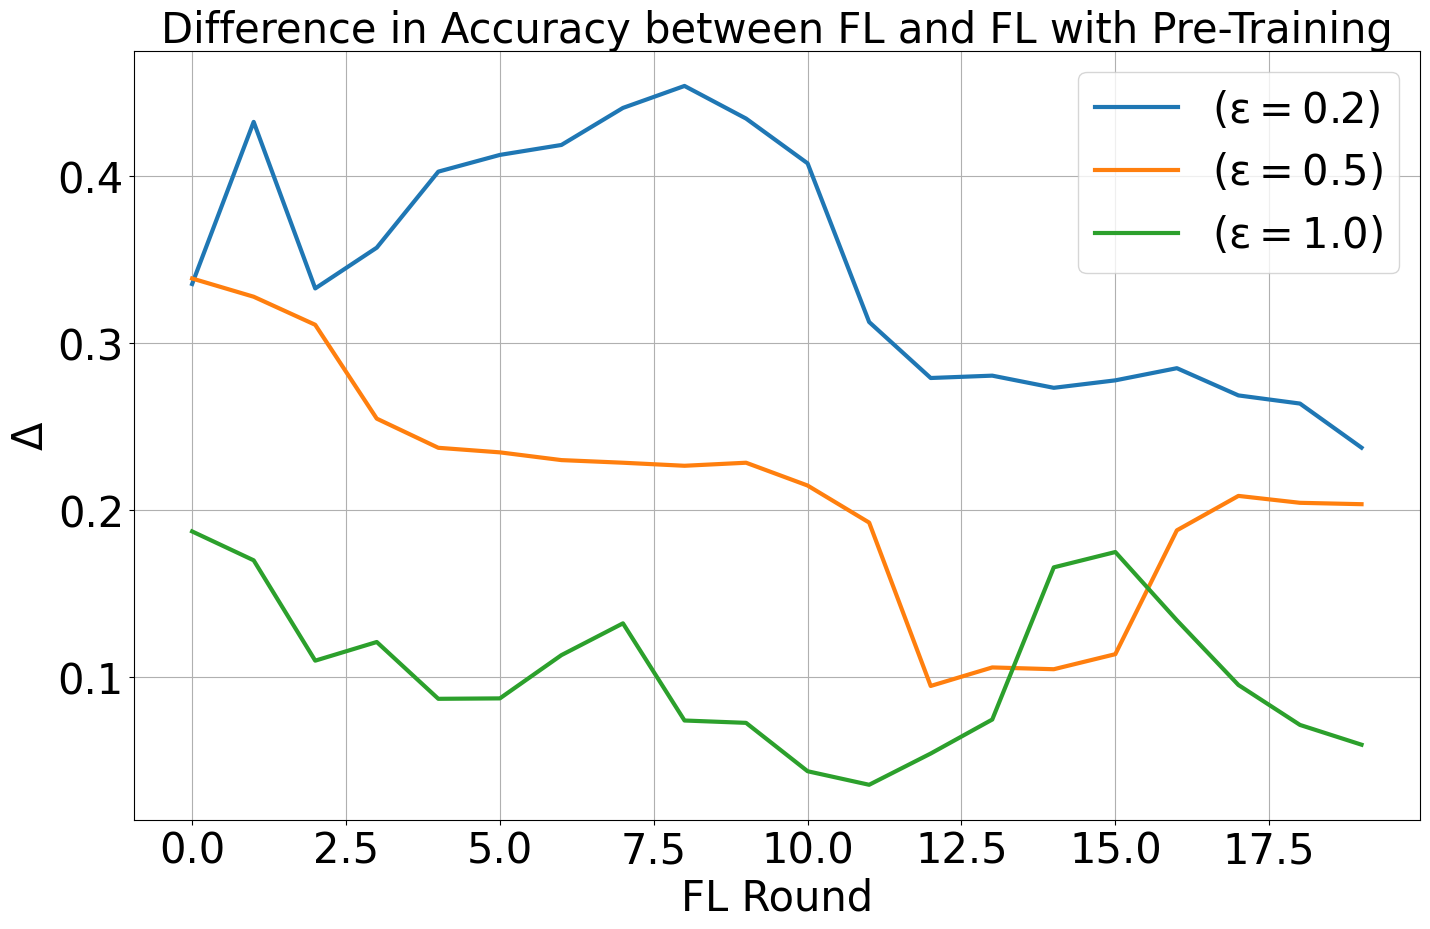

In [33]:
plot_differences(differences, dataset_name="dutch", size=0.5)

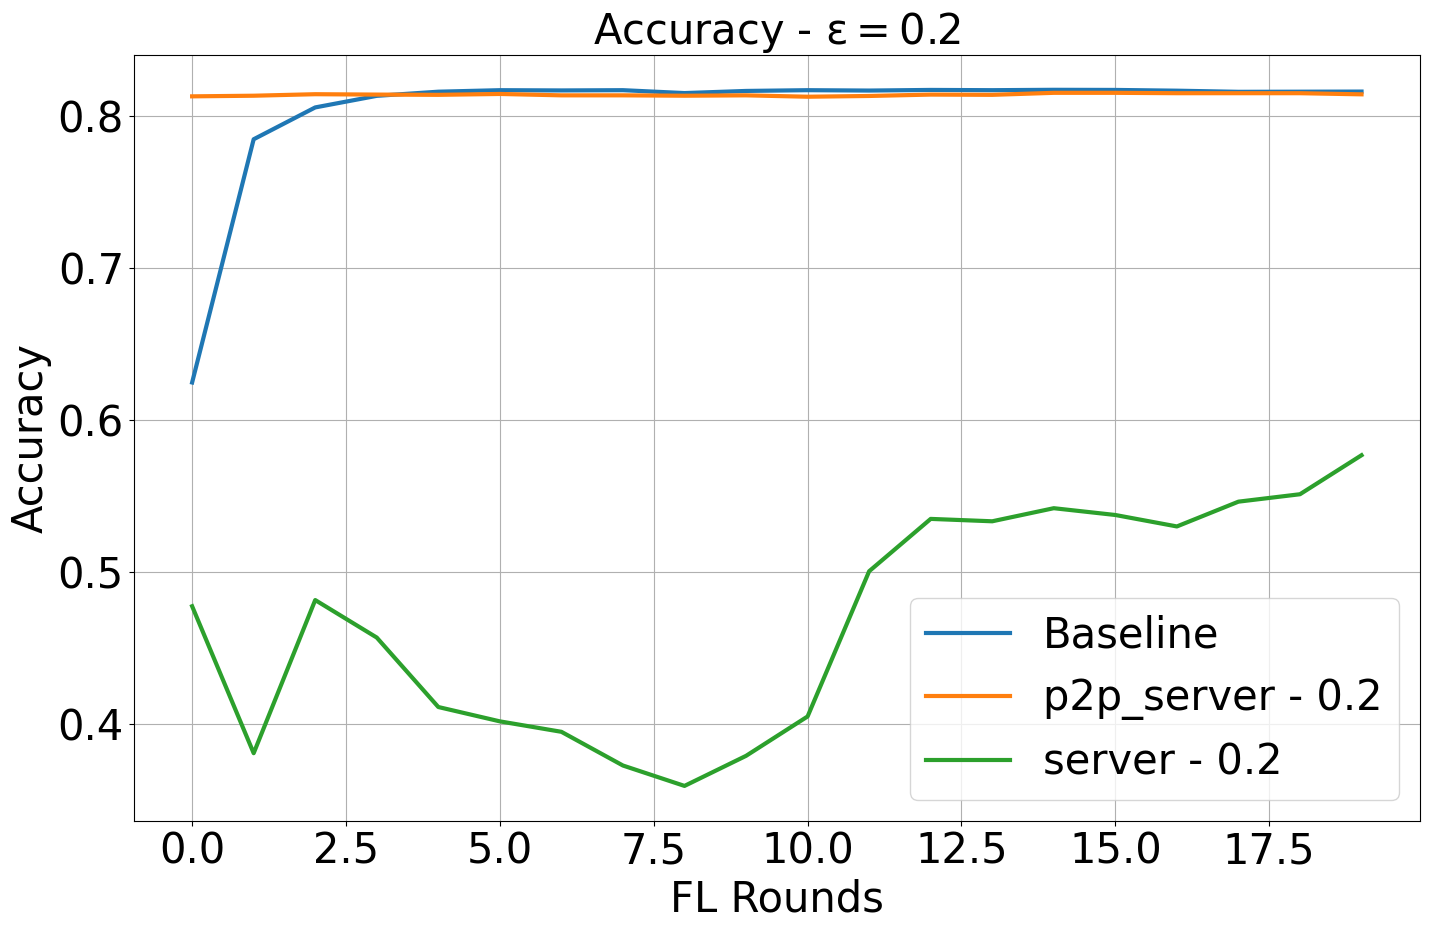

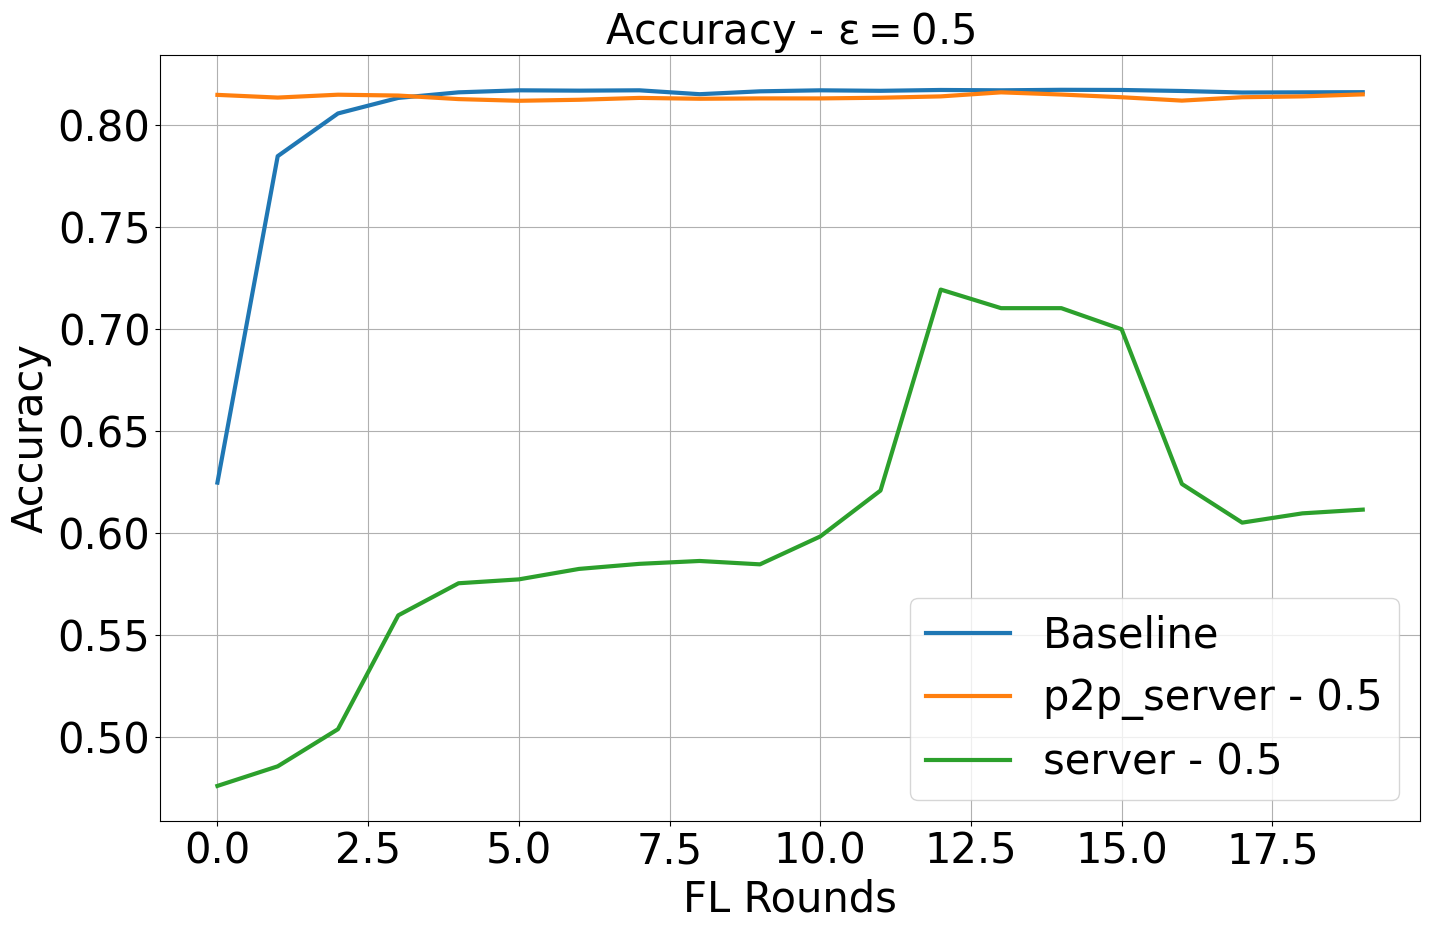

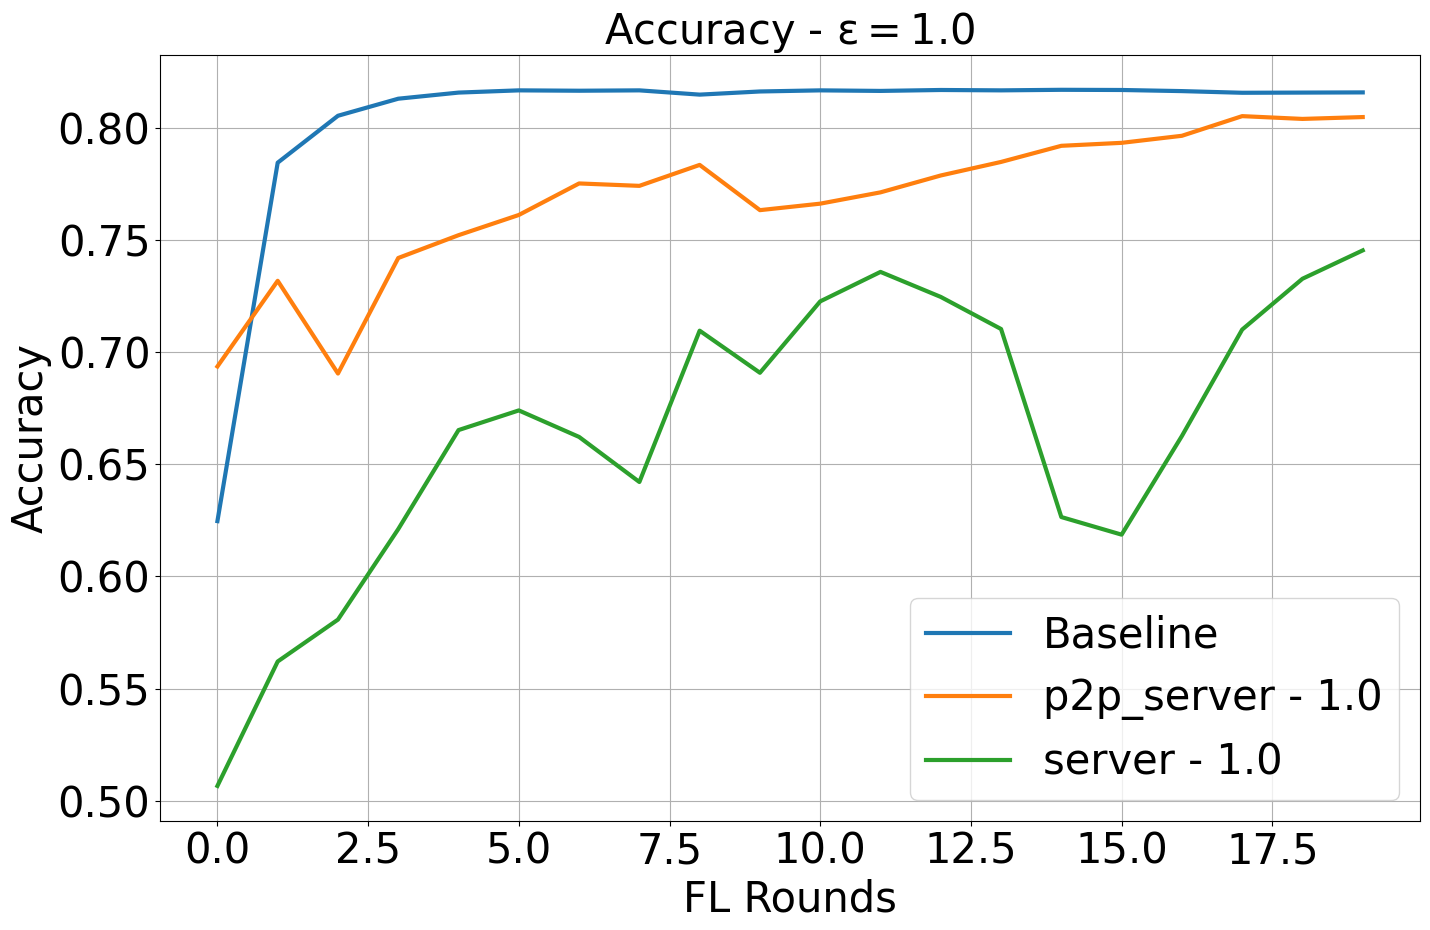

In [34]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.5", dataset_name="dutch")

# 60% Public

In [35]:
wandb_data = {
    "p2p_server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/r72rolr1"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/3s51b9n0"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/h8jrb7z6"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/ebzr8gyj"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/2lk5x5ut"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/q90cc4zz"),
    },
    "server": {
        "0.2": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/jglsjiy7"),
        "0.5": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/f1avgahv"),
        "1.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/wz96fq4u"),
        # "2.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/3wjbb78d"),
        # "3.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/njz2ardt"),
        # "4.0": get_data("/lucacorbucci/p2p_dutch_Sweeps/runs/t1eaxm46"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

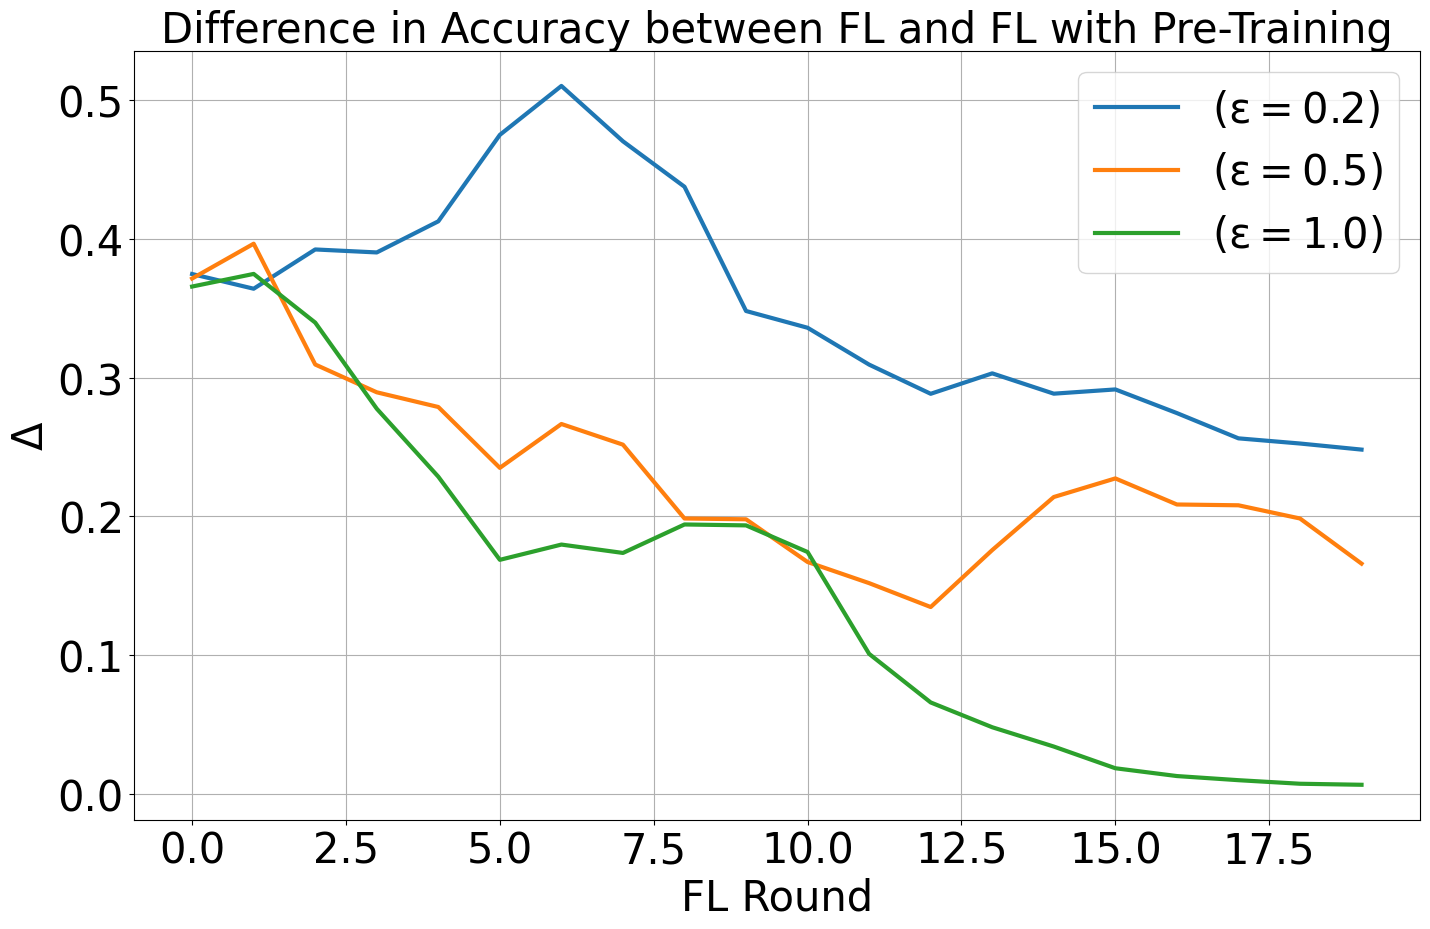

In [36]:
plot_differences(differences, dataset_name="dutch", size=0.6)

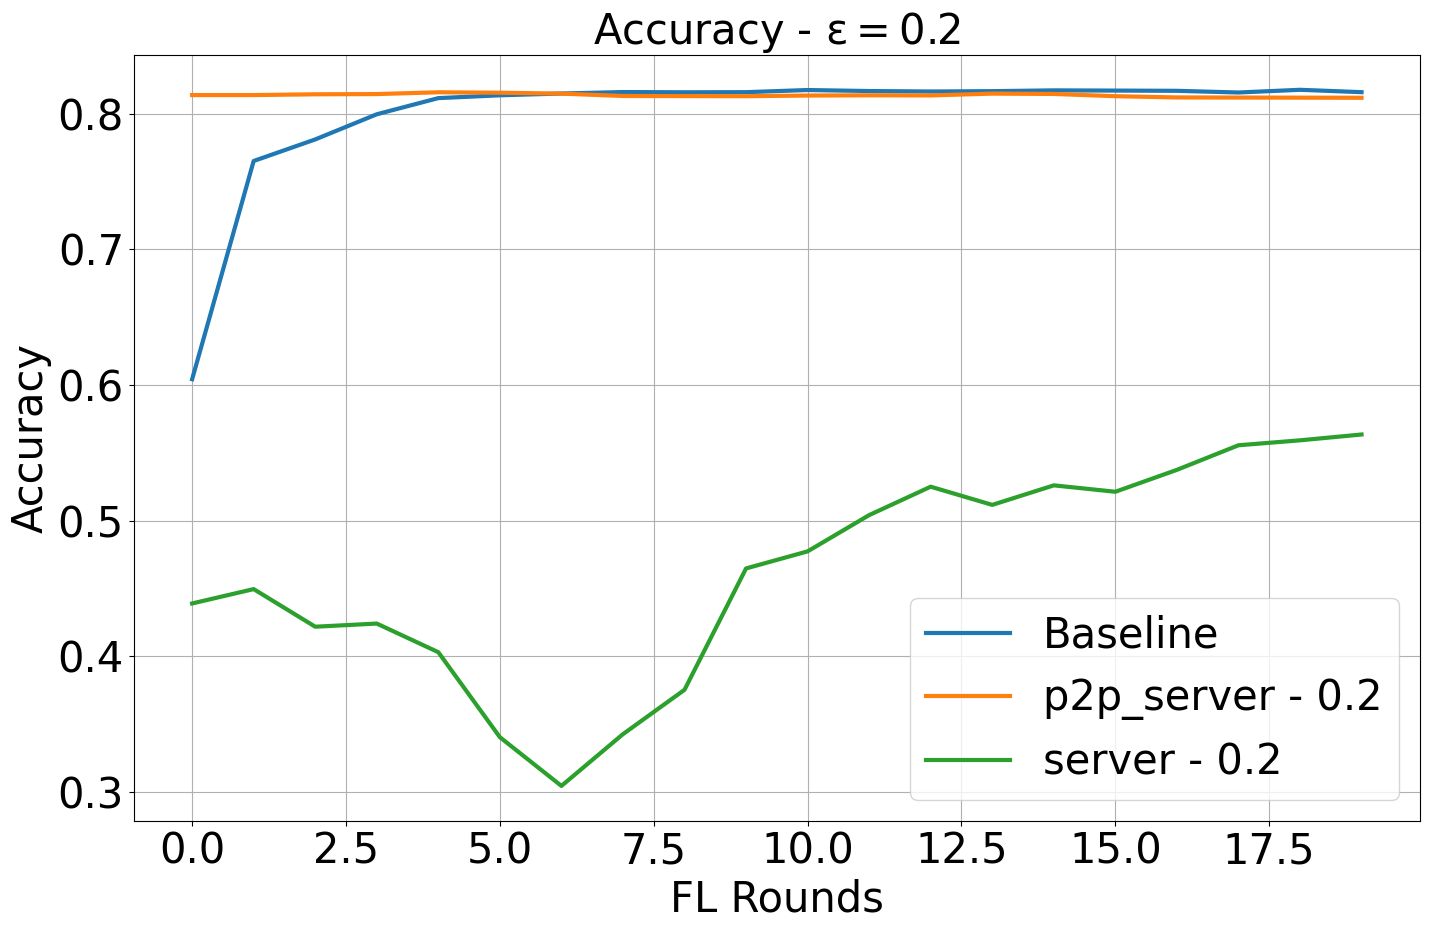

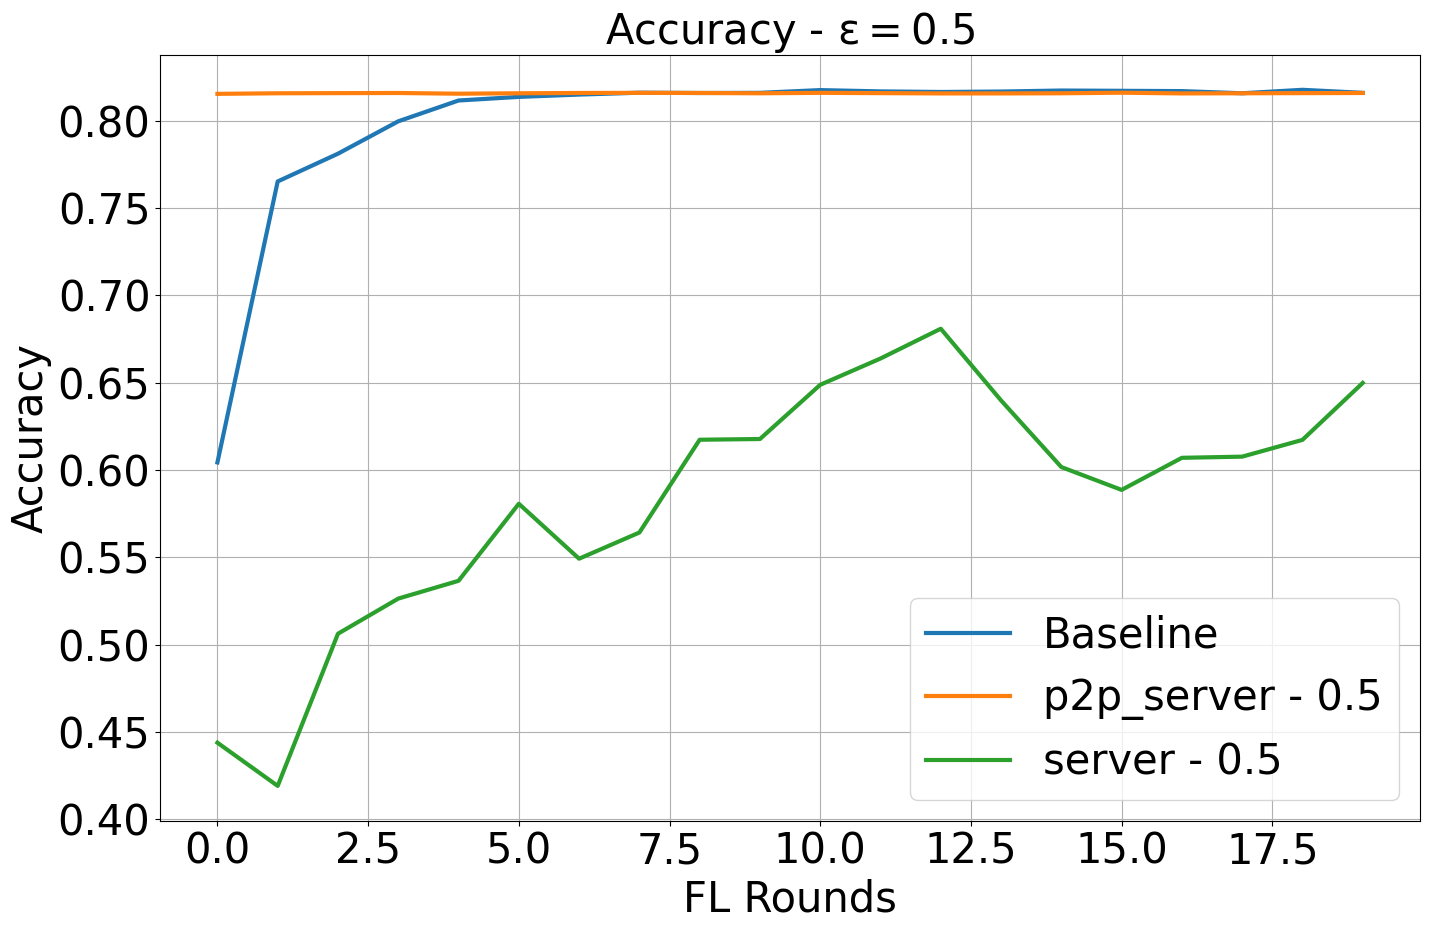

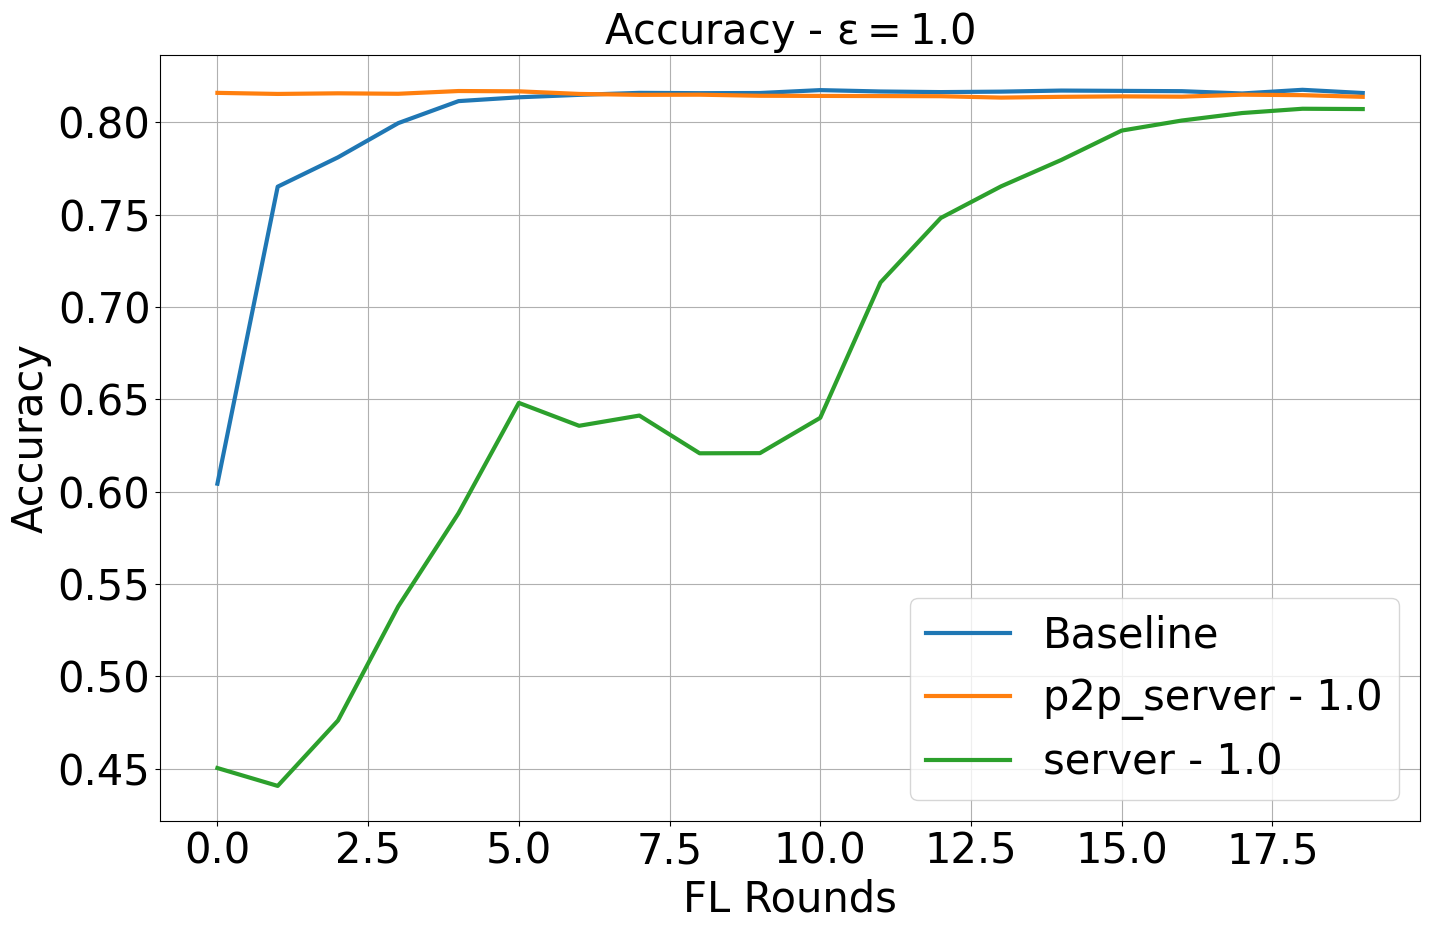

In [37]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.6", dataset_name="dutch")

# Income

In [38]:
baselines = {
    "0.2": get_data("/lucacorbucci/income_p2p/runs/cl6myags"),
    "0.3": get_data("/lucacorbucci/income_p2p/runs/tuafk5es"),
    "0.4": get_data("/lucacorbucci/income_p2p/runs/2rj2id7o"),
    # "0.5": get_data("/lucacorbucci/income_p2p/runs/mdujn6r6"),
}
baselines_accuracy = {
    experiment_name: remove_nan(value, "Test Accuracy on the server")
    for experiment_name, value in baselines.items()
}

# 20% Public

In [39]:
wandb_data = {
    "p2p_server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/9vwhjnlm"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/c6uj4t3c"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/wwbxt651"),
    },
    "server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/36apol2z"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/4hctjxy2"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/izlmlci9"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

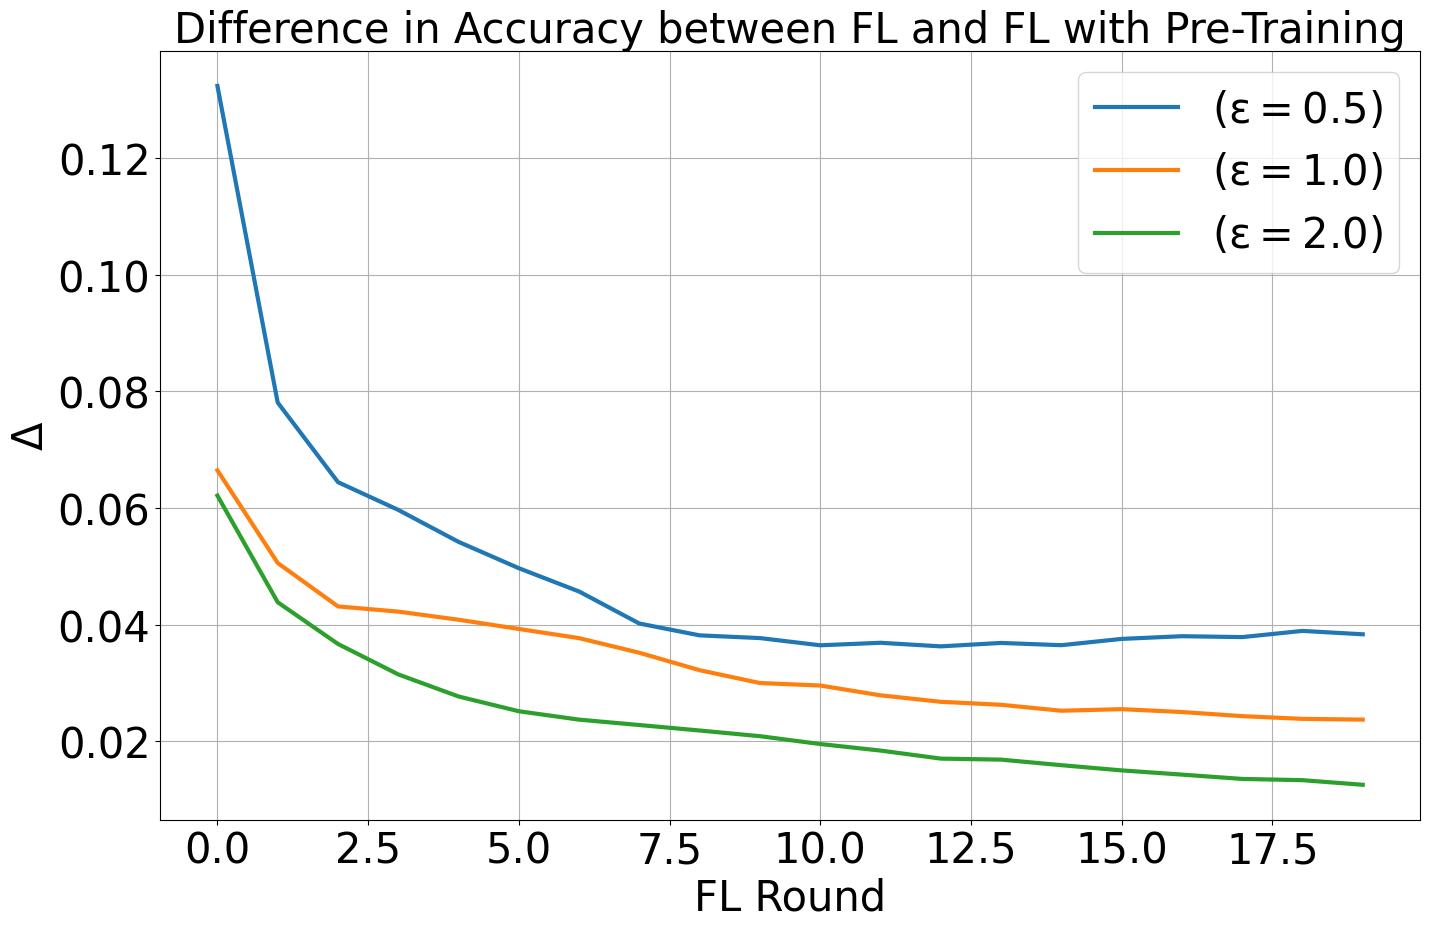

In [40]:
plot_differences(differences, dataset_name="income", size=0.2)

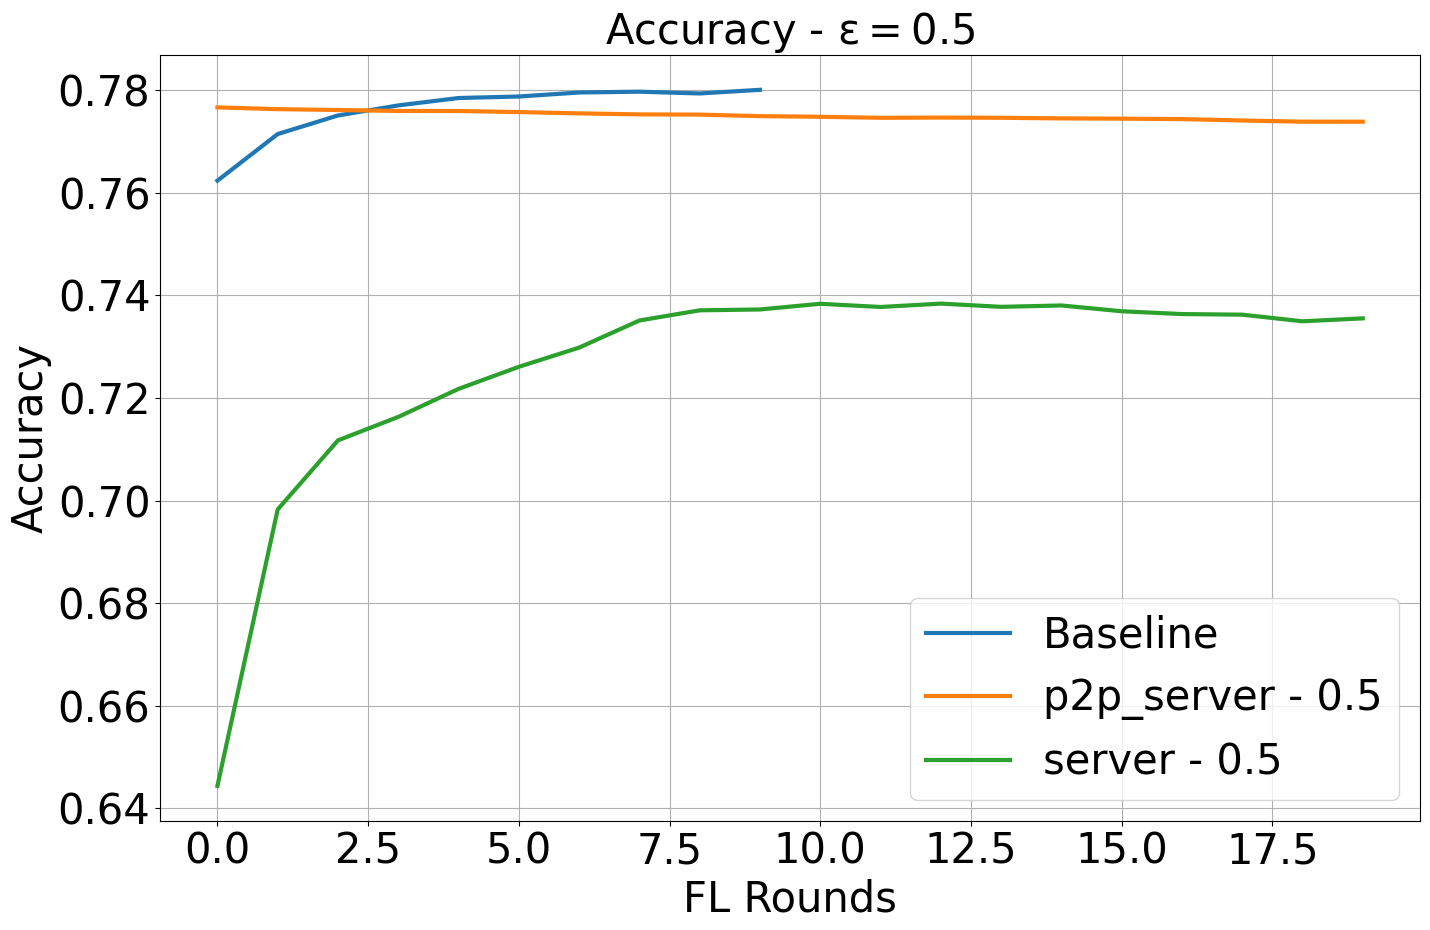

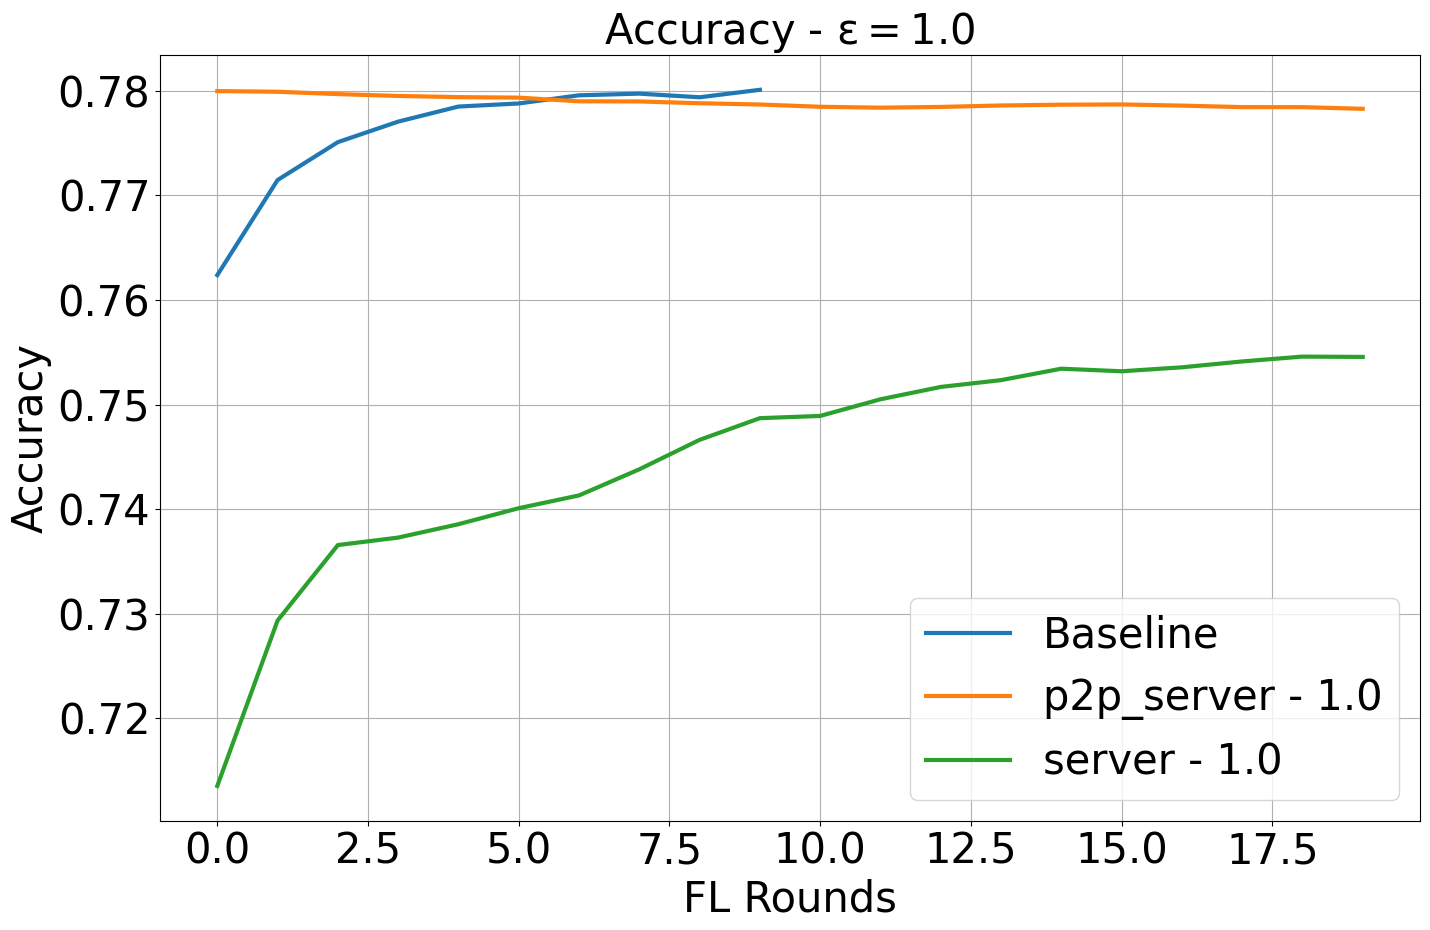

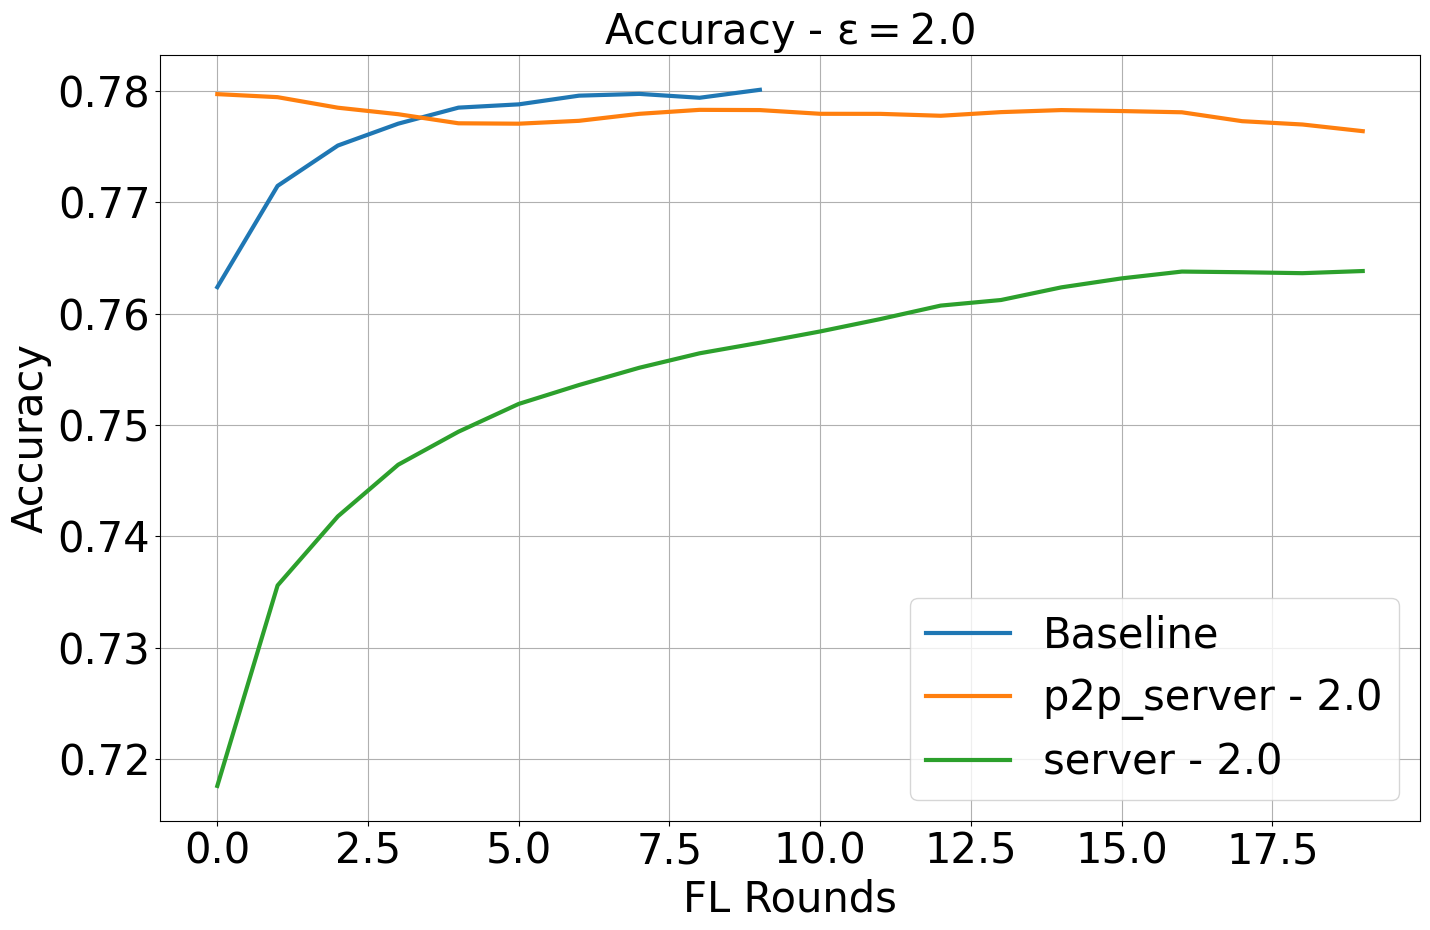

In [41]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.2", dataset_name="income")

# 30% Public

In [42]:
wandb_data = {
    "p2p_server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/xw9s6opd"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/nzps4qpr"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/4jny4tdw"),
    },
    "server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/geo86e6a"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/6gjxy6ny"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/1n6ae2ox"),
    },
}

test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}
differences = compute_difference(test_accuracy, "p2p_server", "server")

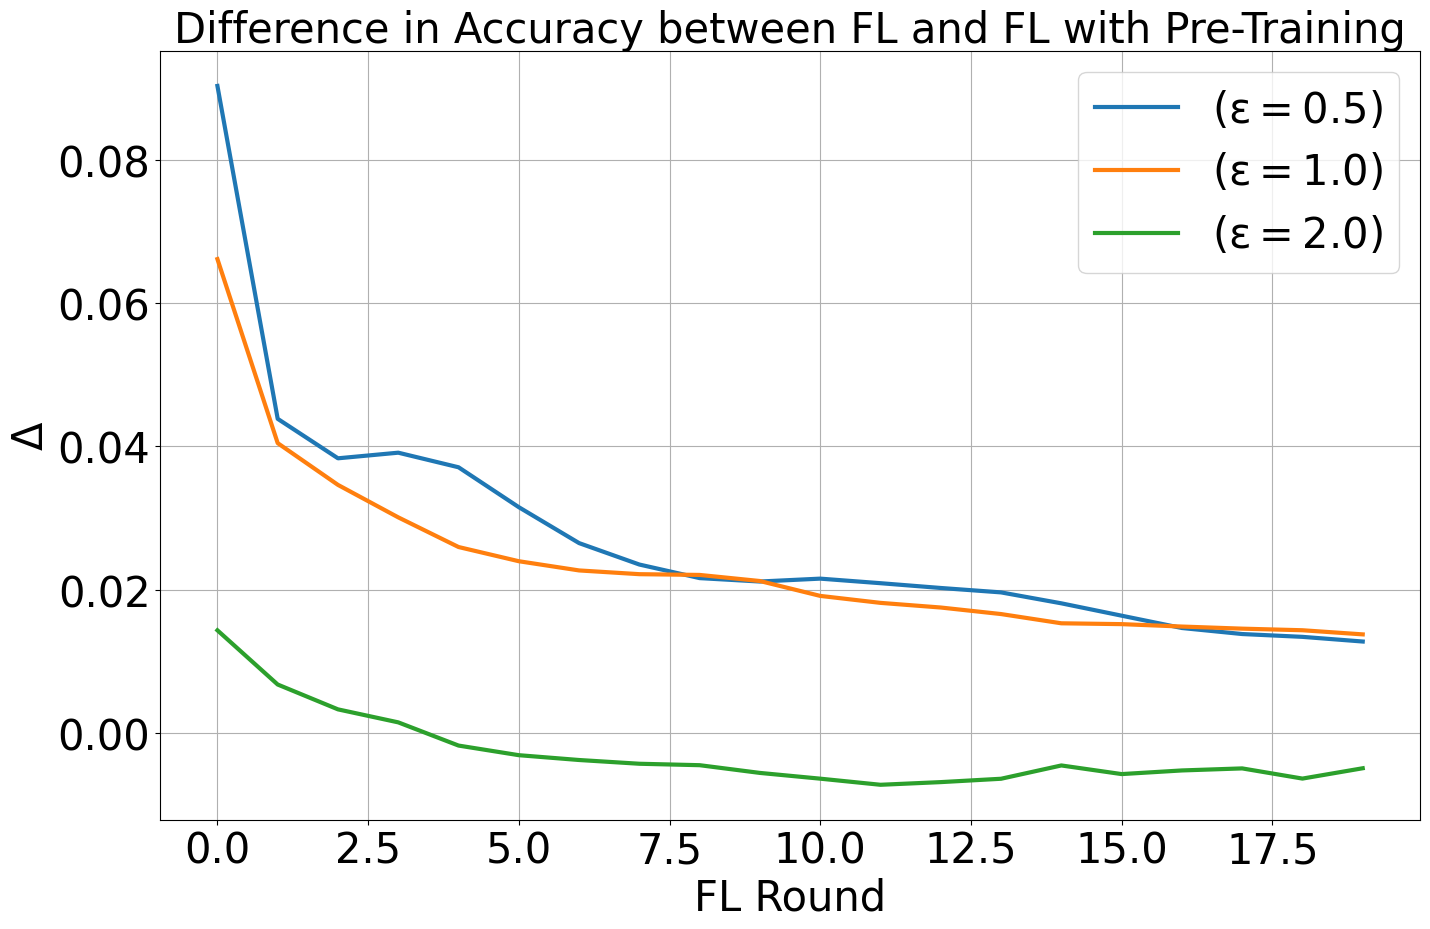

In [43]:
plot_differences(differences, dataset_name="income", size=0.3)

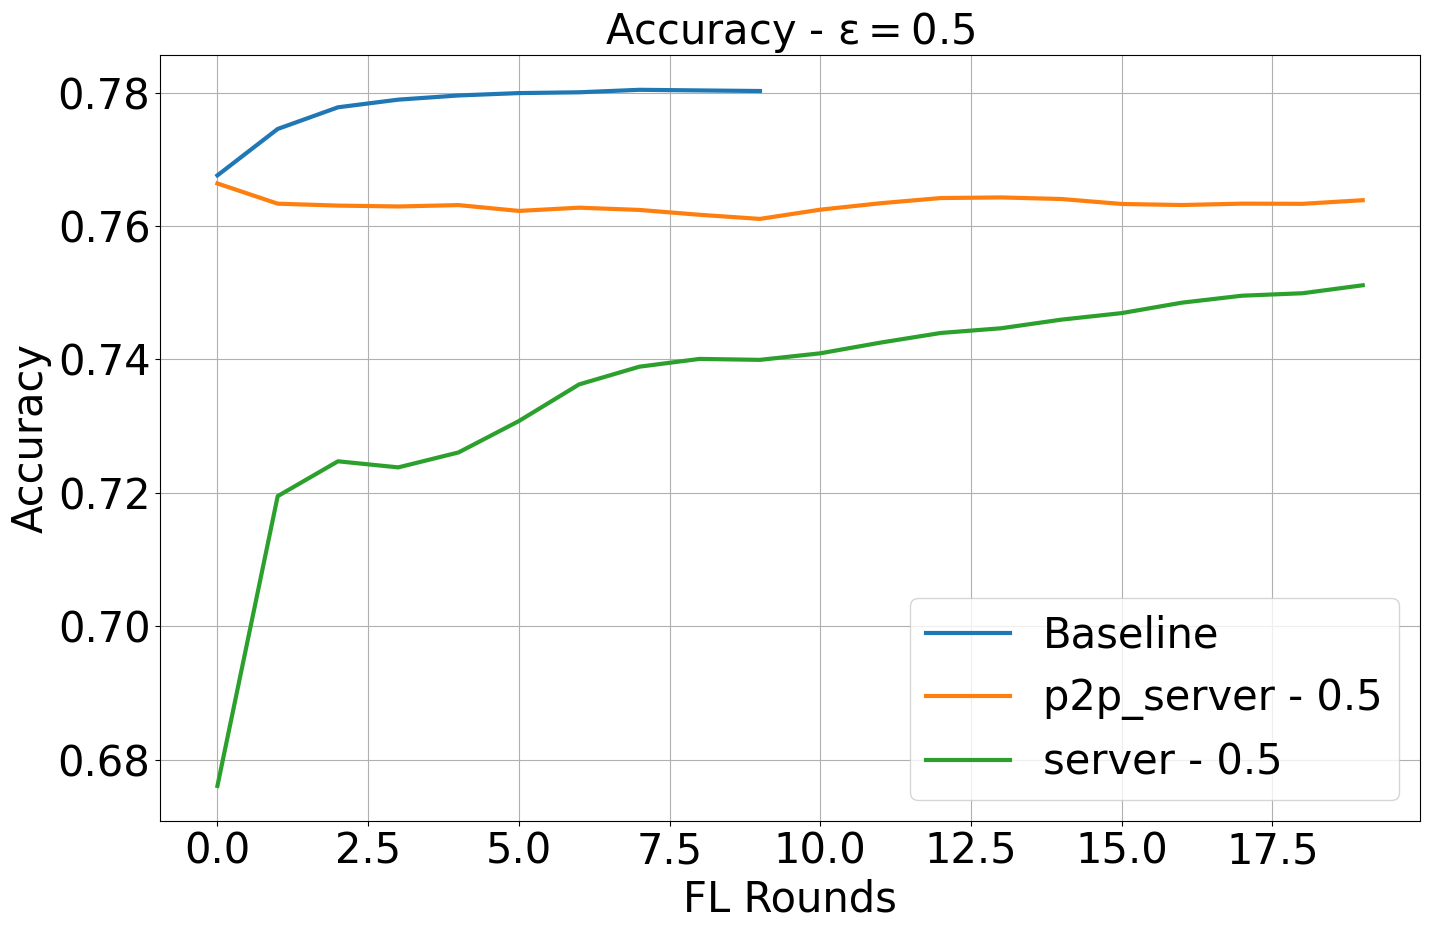

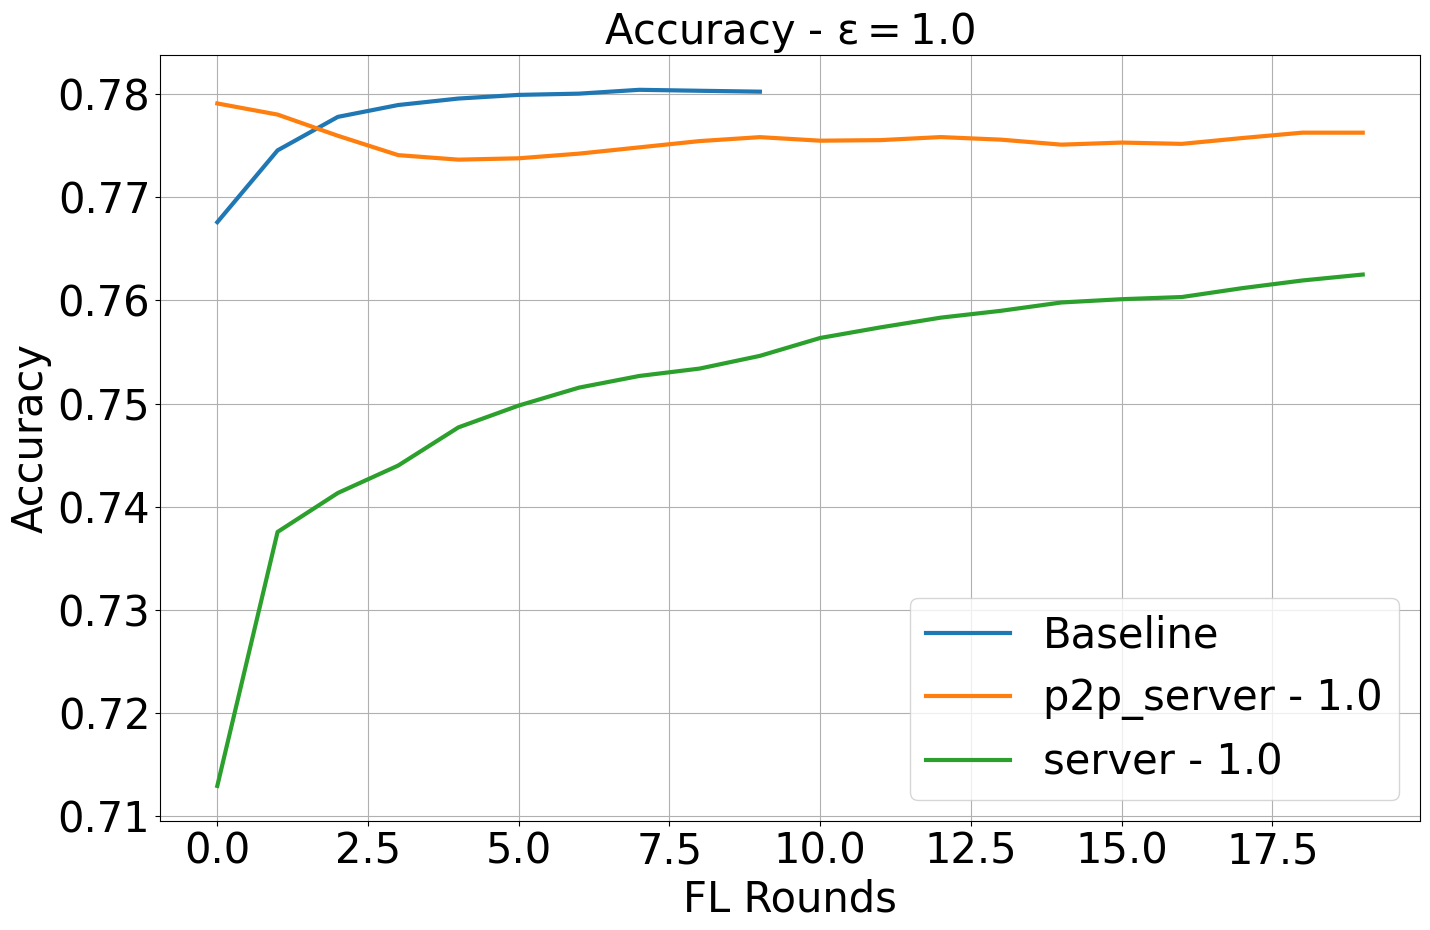

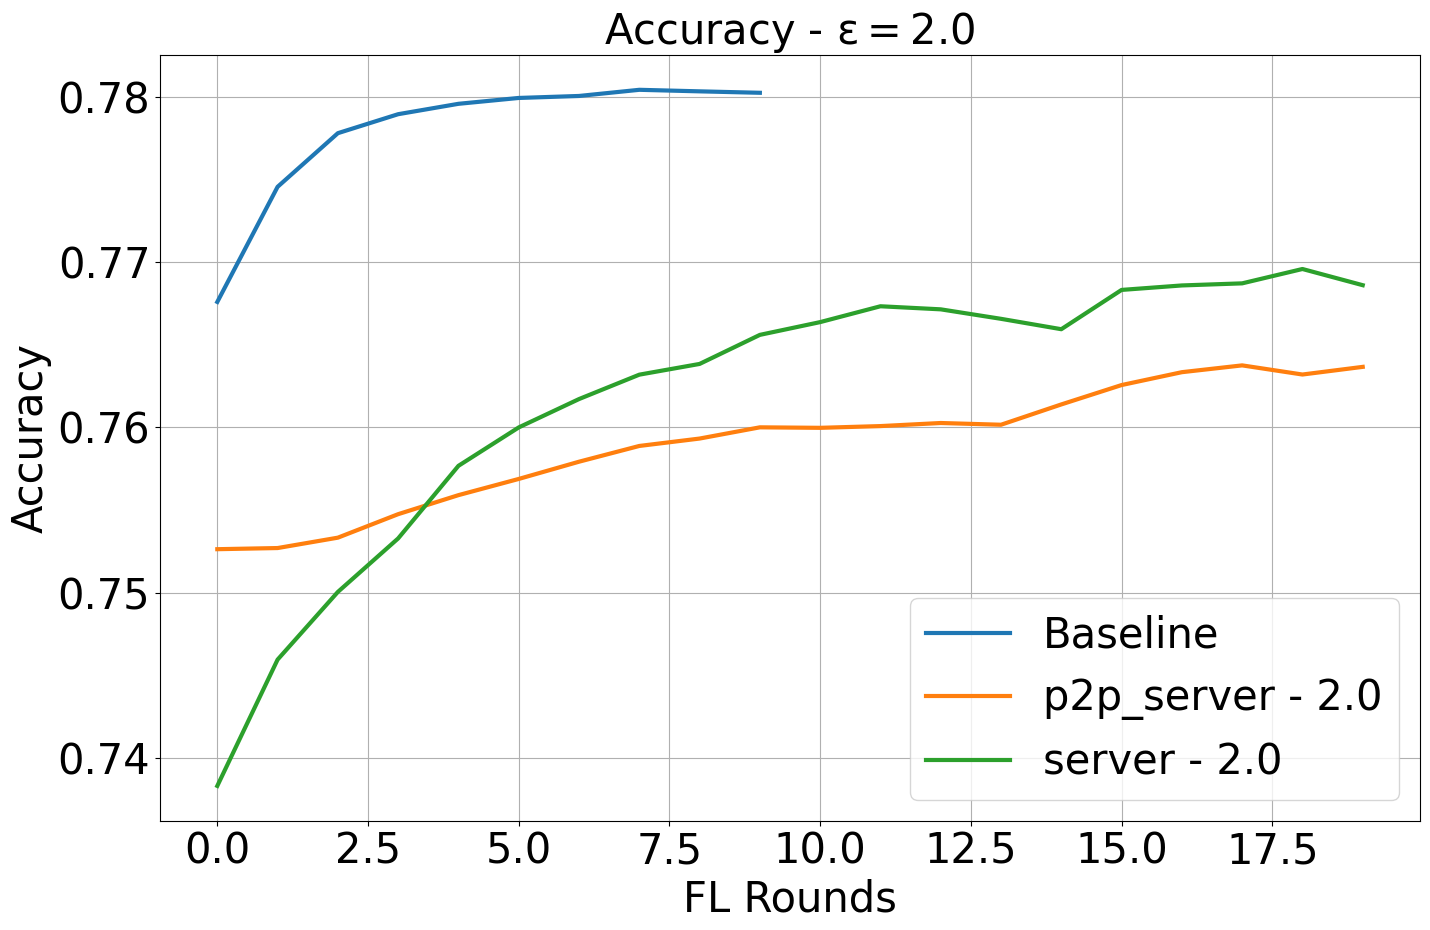

In [44]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.3", dataset_name="income")

# 40% Public

In [45]:
wandb_data = {
    "p2p_server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/d5w4abt1"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/nzdrjvyp"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/zk75rkgb"),
    },
    "server": {
        "0.5": get_data("/lucacorbucci/income_p2p/runs/1rciacde"),
        "1.0": get_data("/lucacorbucci/income_p2p/runs/8jyyhh6g"),
        "2.0": get_data("/lucacorbucci/income_p2p/runs/iatmkxlx"),
    },
}


test_accuracy = {
    experiment_name: {
        epsilon_name: remove_nan(data, "Test Accuracy on the server")
        for epsilon_name, data in value.items()
    }
    for experiment_name, value in wandb_data.items()
}

differences = compute_difference(test_accuracy, "p2p_server", "server")

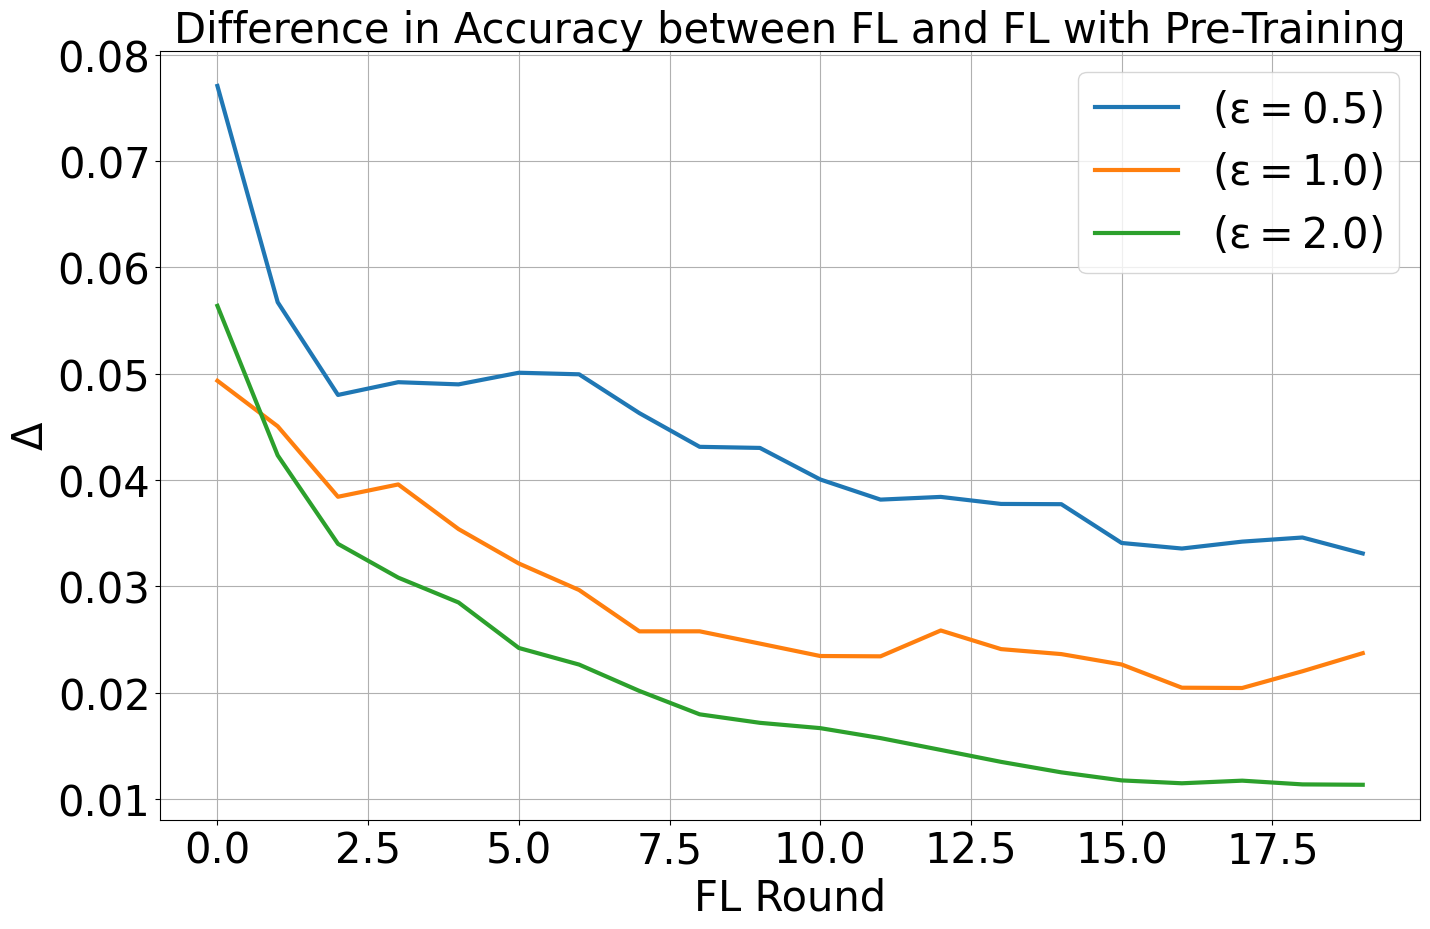

In [46]:
plot_differences(differences, dataset_name="income", size=0.4)

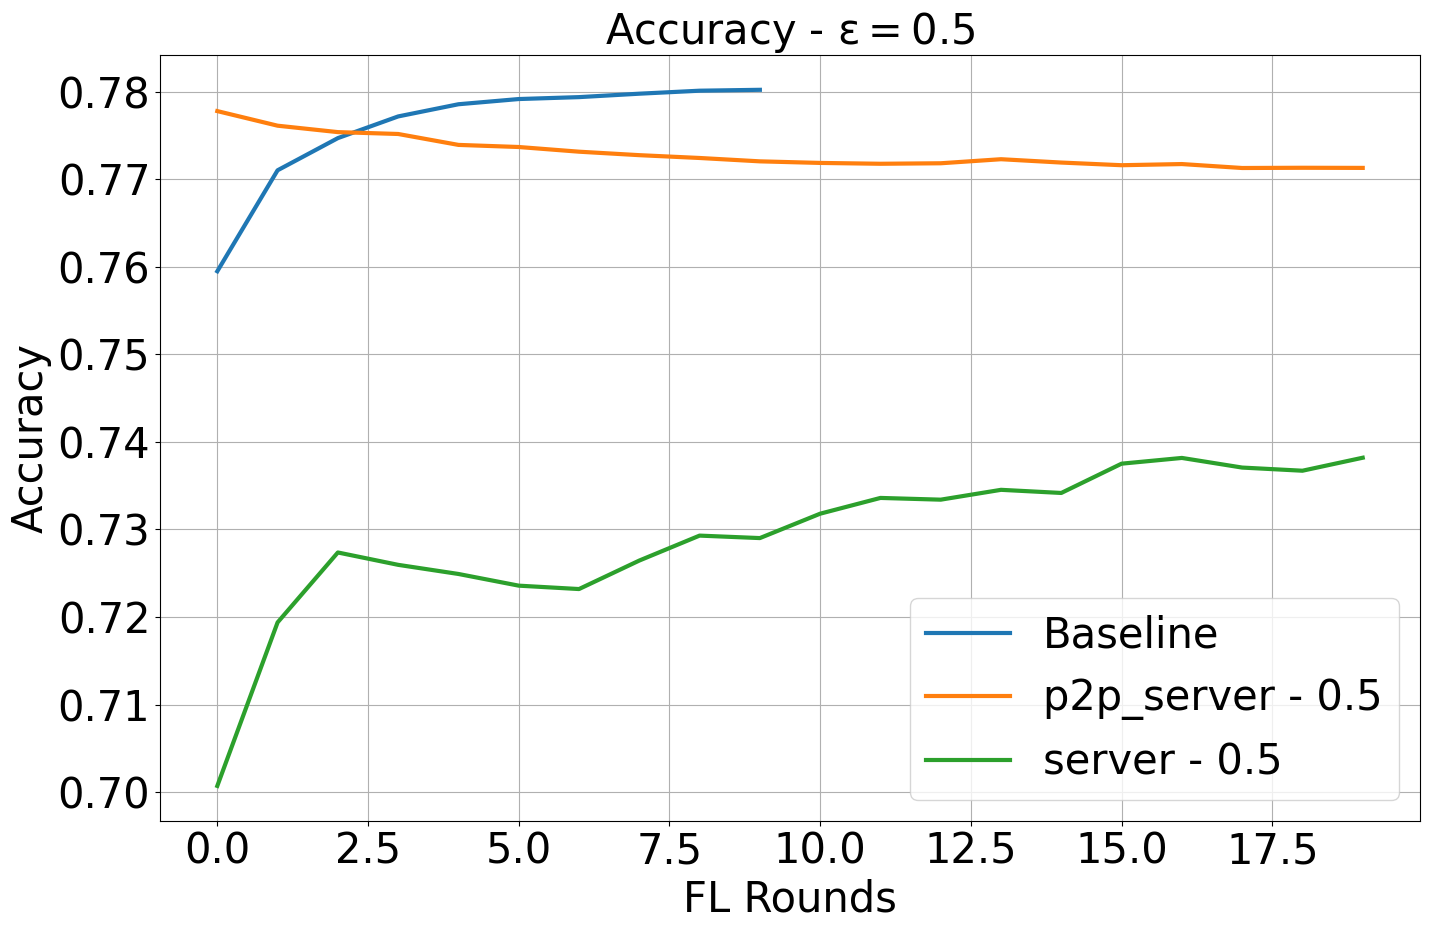

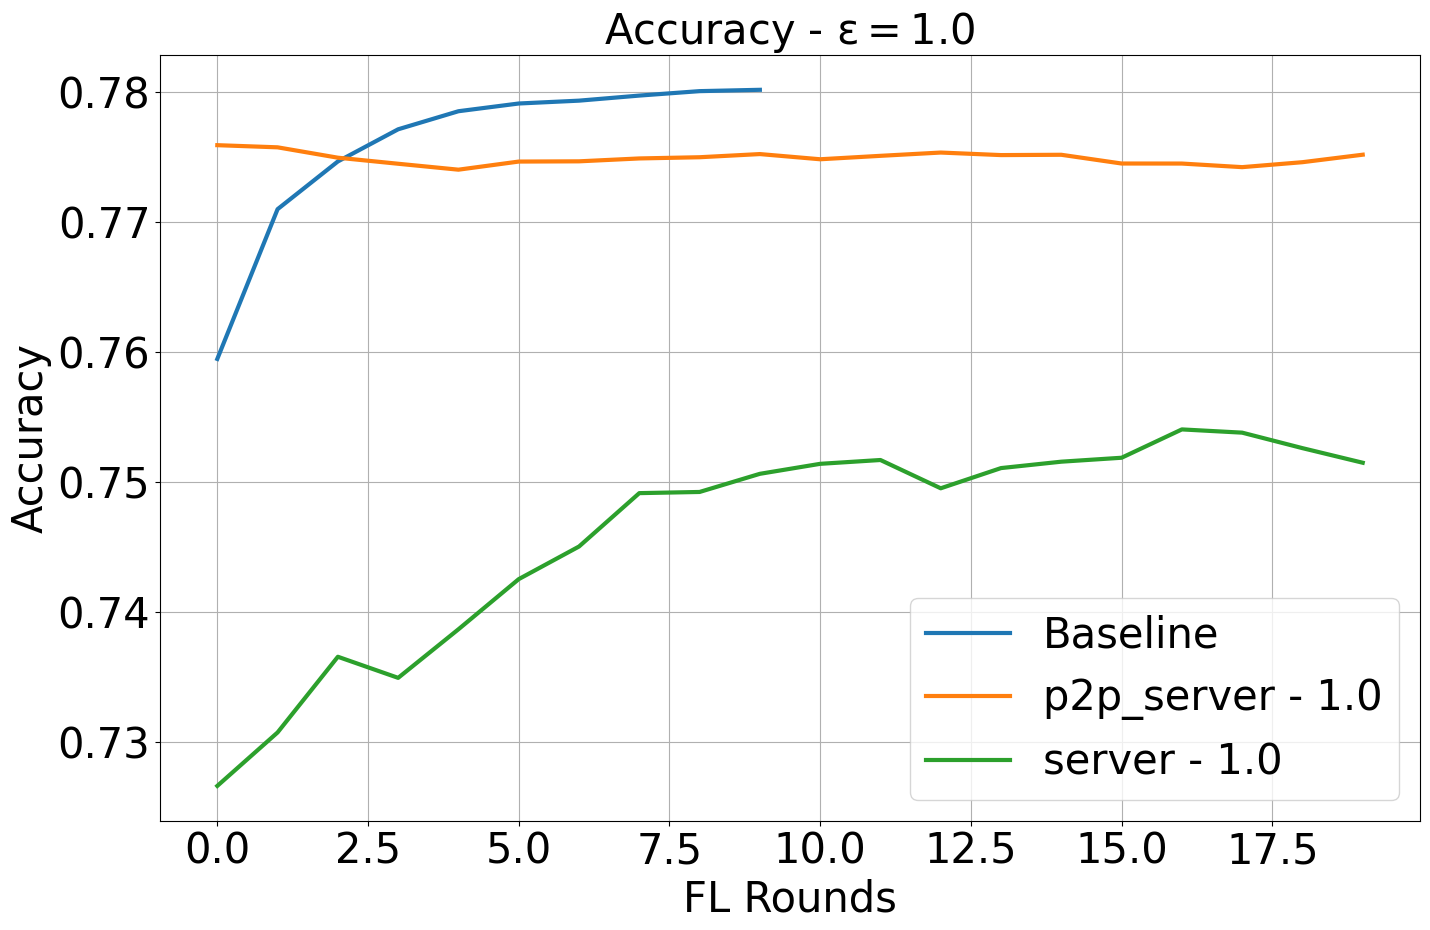

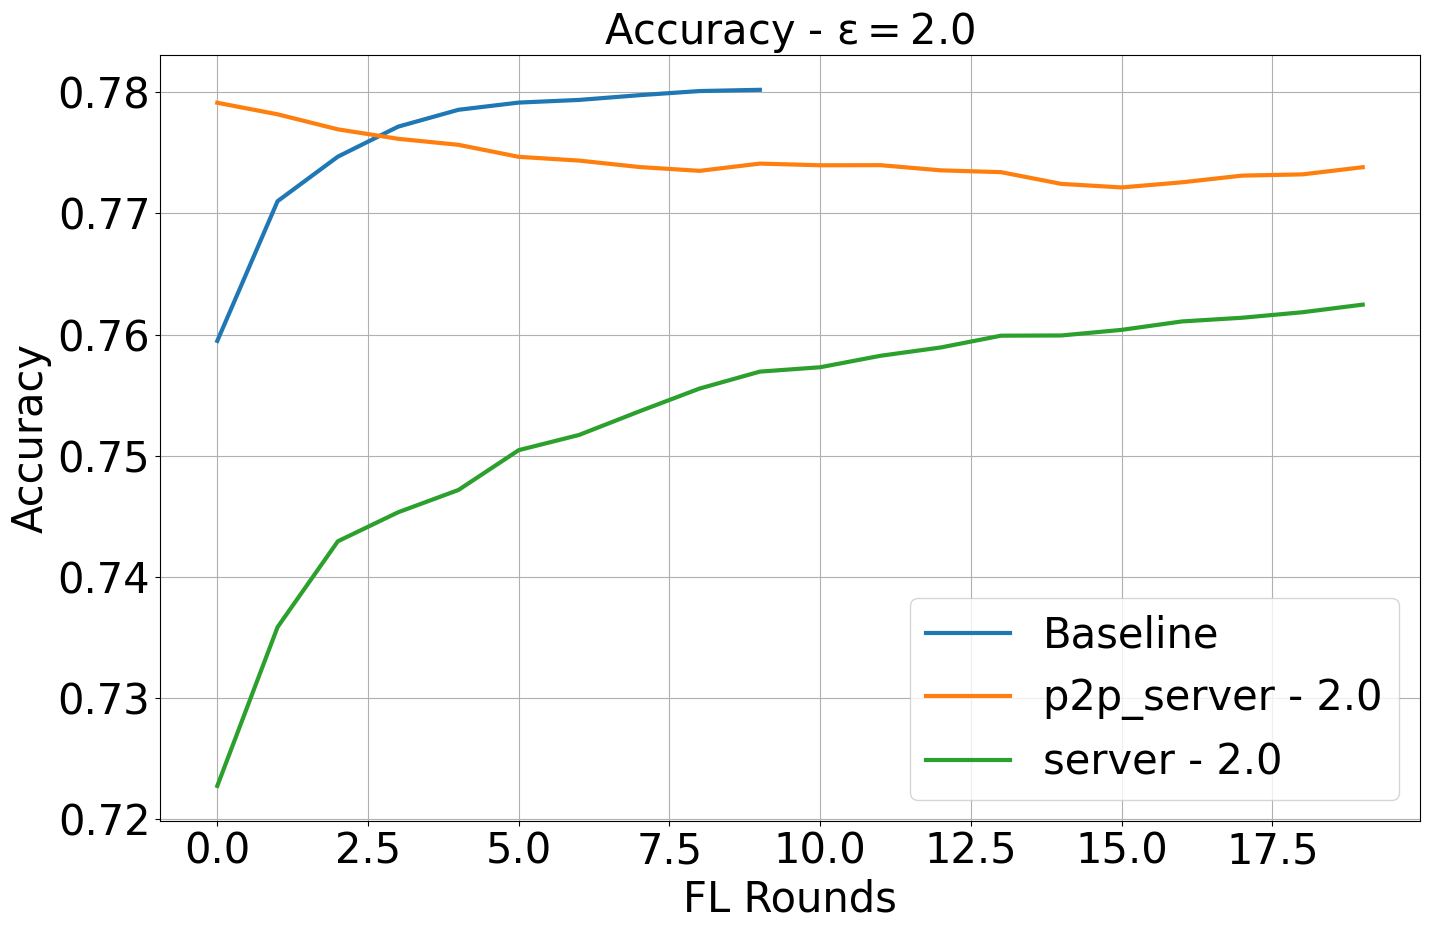

In [47]:
plot_accuracy(test_accuracy, baselines_accuracy, "0.4", dataset_name="income")